# Graphs Based on KNN

In [15]:
import os
import anndata as ad
import scipy as sp
import pickle
import pandas as pd
import igraph as ig
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import MinMaxScaler

In [16]:
"""
The data folder is structured as follows:

data
    |input
        |original
        |pb
        |pb_L
    |output
        |corr
        |gk
        |corr_L
        |graph_sum
        |extra
        |graph
        |plots
"""

data = os.path.abspath(os.path.join(os.getcwd(),"../data"))

input = os.path.join(data, "input")
output = os.path.join(data, "output")

original = os.path.join(input, "original")
pb = os.path.join(input, "pb")
pb_L = os.path.join(input, "pb_L")

corr = os.path.join(output, "corr")
gk = os.path.join(output, "gk")
corr_L = gk = os.path.join(output, "corr_L")
graph_sum = os.path.join(output, "graph_sum")
extra = os.path.join(output, "extra")
graph = os.path.join(output, "graph")
plots = os.path.join(output, "plots")
core_P = os.path.join(output, "core_P")

In [17]:
# Read Original Data
adt = ad.read_h5ad(os.path.join(original, "adt_pp.h5ad"))
bulkRNA = ad.read_h5ad(os.path.join(original, "bulkRNA_pp.h5ad"))
cytof = ad.read_h5ad (os.path.join(original, "cytof_pp.h5ad"))
facs = ad.read_h5ad(os.path.join(original, "facs_pp.h5ad"))
luminex = ad.read_h5ad(os.path.join(original, "luminex_pp.h5ad"))
scRNA = ad.read_h5ad(os.path.join(original, "scRNA_pp.h5ad"))

# Read Pseudobulks
with open(os.path.join(core_P, "citeRNA_pseudobulks_core.pickle"), "rb") as f:
    citeRNA_pseudobulks = pickle.load(f) # Float

with open(os.path.join(core_P, "adt_pseudobulks_core.pickle"), "rb") as f:
    adt_pseudobulks = pickle.load(f) # Float

with open(os.path.join(core_P, "cytof_pseudobulks_core.pickle"), "rb") as f:
    cytof_pseudobulks = pickle.load(f) # Float

with open(os.path.join(core_P, "bulkRNA_pseudobulks_core.pickle"), "rb") as f:
    bulkRNA_pseudobulks = pickle.load(f) # Float

luminex_pseudobulks = pd.read_csv(os.path.join(core_P, "luminex_pseudobulks_core.csv"), index_col = 0) # Float
facs_pseudobulks = pd.read_csv(os.path.join(core_P, "facs_pseudobulks_core.csv"), index_col = 0)


# Correlations
with open(os.path.join(corr_L,'citeRNA_disease_clusters_corr.pickle'), 'rb') as f:
    citeRNA_disease_clusters_corr = pickle.load(f)

with open(os.path.join(corr_L,'corr_p_citeRNA.pickle'), 'rb') as f:
    corr_p_citeRNA = pickle.load(f)

with open(os.path.join(corr_L,'adt_disease_clusters_corr.pickle'), 'rb') as f:
    adt_disease_clusters_corr = pickle.load(f)

with open(os.path.join(corr_L,'corr_p_adt.pickle'), 'rb') as f:
    corr_p_adt = pickle.load(f)

with open(os.path.join(corr_L, 'cytof_disease_clusters_corr.pickle'), 'rb') as f:
    cytof_disease_clusters_corr = pickle.load(f)

with open(os.path.join(corr_L, 'corr_p_cytof.pickle'), 'rb') as f:
    corr_p_cytof = pickle.load(f)

with open(os.path.join(corr_L, 'corr_p_d_cytof.pickle'), 'rb') as f:
    corr_p_d_cytof = pickle.load(f)

with open(os.path.join(corr_L, 'bulkRNA_disease_clusters_corr.pickle'), 'rb') as f:
    bulkRNA_disease_clusters_corr = pickle.load(f)

with open(os.path.join(corr_L, 'corr_p_bulkRNA.pickle'), 'rb') as f:
    corr_p_bulkRNA = pickle.load(f)

with open(os.path.join(corr_L, 'corr_p_luminex.pickle'), 'rb') as f:
    corr_p_luminex = pickle.load(f)

with open(os.path.join(corr_L, 'luminex_disease_clusters_corr.pickle'), 'rb') as f:
    luminex_disease_clusters_corr = pickle.load(f)

with open(os.path.join(corr_L, 'corr_p_facs.pickle'), 'rb') as f:
    corr_p_facs = pickle.load(f)

with open(os.path.join(corr_L, 'facs_disease_clusters_corr.pickle'), 'rb') as f:
    facs_disease_clusters_corr = pickle.load(f)

corr_d_luminex = pd.read_csv(os.path.join(corr_L, "corr_d_luminex.csv"), index_col = 0) 
corr_d_facs = pd.read_csv(os.path.join(corr_L, "corr_d_facs.csv"), index_col = 0)
corr_p_d_facs = pd.read_csv(os.path.join(corr_L, "corr_p_d_facs.csv"), index_col = 0)
corr_p_d_luminex = pd.read_csv(os.path.join(corr_L, "corr_p_d_luminex.csv"), index_col = 0)

/opt/anaconda3/envs/thesis/lib/python3.10/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/opt/anaconda3/envs/thesis/lib/python3.10/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/opt/anaconda3/envs/thesis/lib/python3.10/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/opt/anaconda3/envs/thesis/lib/python3.10/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/opt/anaconda3/envs/thesis/lib/python3.10/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation

In [18]:
# Read Shared Data 
with open(os.path.join(core_P, "patient_disease_map_core.pickle"), "rb") as f:
    patient_disease_map = pickle.load(f) # Float

with open(os.path.join(core_P, "patient_disease_map_core_reduced.pickle"), "rb") as f:
    patient_disease_map_reduced = pickle.load(f) # Float

with open(os.path.join(core_P, "disease_patient_map_core.pickle"), "rb") as f:
    disease_patient_map = pickle.load(f) # Float

with open(os.path.join(core_P, "disease_patient_map_core_reduced.pickle"), "rb") as f:
    disease_patient_map_reduced = pickle.load(f) # Float

with open(os.path.join(core_P, "id_to_name.pickle"), "rb") as f:
    id_to_name = pickle.load(f) # Float

with open(os.path.join(core_P, "name_to_id.pickle"), "rb") as f:
    name_to_id = pickle.load(f) # Float

with open(os.path.join(core_P, "id_to_pb.pickle"), "rb") as f:
    id_to_pb = pickle.load(f) # Float

## KNN

In [19]:
minmax_scale = MinMaxScaler(feature_range=(0, 1)) # For rescaling each feature to the [0,1] interval so that they are all comparable 

In [20]:
luminex_X = minmax_scale.fit_transform(np.array(luminex_pseudobulks))
facs_X = minmax_scale.fit_transform(np.array(facs_pseudobulks))
bulkRNA_X = {key:minmax_scale.fit_transform(np.array(bulkRNA_pseudobulks[key])) for key in bulkRNA_pseudobulks.keys()}
citeRNA_X = {key:minmax_scale.fit_transform(np.array(citeRNA_pseudobulks[key])) for key in citeRNA_pseudobulks.keys()}
adt_X = {key:minmax_scale.fit_transform(np.array(adt_pseudobulks[key])) for key in adt_pseudobulks.keys()}
cytof_X = {key:minmax_scale.fit_transform(np.array(cytof_pseudobulks[key])) for key in cytof_pseudobulks.keys()}


In [21]:
id_to_10NN ={}
id_to_5NN = {}

id_to_num_com_10NN = {}
id_to_num_com_5NN = {}

id_to_10pct_10KNN = {}
id_to_50pct_10KNN = {}
id_to_80pct_10KNN = {}
id_to_10pct_per_node_10KNN = {}
id_to_50pct_per_node_10KNN = {}

id_to_10pct_10KNN_num_com = {}
id_to_50pct_10KNN_num_com = {}
id_to_80pct_10KNN_num_com = {}

id_to_10pct_per_node_10KNN_num_com = {}
id_to_50pct_per_node_10KNN_num_com = {}

### K = 10

In [22]:
samples = []
p_diseases = []
p_disease_groups = []

edges = [] # Remove self-loops and maintain the order of patients
edges_80 = []
edges_10 = []
edges_50 = []

edges_50pct_pn = []
edges_10pct_pn = []

nbrs_10_luminex = NearestNeighbors(n_neighbors=10, algorithm='auto').fit(luminex_X)
distances, indices = nbrs_10_luminex.kneighbors(luminex_X)

# Threshold in the whole graph
non_zero_dst = np.array([d for d in distances.flatten() if d > 0])
fifty_pct = np.percentile(non_zero_dst, 50)
ten_pct = np.percentile(non_zero_dst, 10)
eighty_pct = np.percentile(non_zero_dst, 80)

for i, source in enumerate(indices):
    samples.append(luminex_pseudobulks.index[i])
    p_diseases.append(patient_disease_map[luminex_pseudobulks.index[i]])
    p_disease_groups.append(patient_disease_map_reduced[luminex_pseudobulks.index[i]])

    # Threshold in the neighborhood of each node
    non_zero_neighbor_dist = np.array([d for d in distances[i] if d > 0])
    ten_pct_per_node = np.percentile(non_zero_neighbor_dist, 10)
    fifty_pct_per_node = np.percentile(non_zero_neighbor_dist, 50)

    for pos, j in enumerate(source):
        if not (i == j):
            edges.append((i,j))
            if distances[i, pos] <= eighty_pct:
                edges_80.append((i,j))
            if distances[i, pos] <= ten_pct:
                edges_10.append((i,j))
            if distances[i, pos] <= fifty_pct:
                edges_50.append((i,j))
            if distances[i, pos] <= ten_pct_per_node:
                edges_10pct_pn.append((i,j))
            if distances[i, pos] <= fifty_pct_per_node:
                edges_50pct_pn.append((i,j))        

n_vertices = luminex_X.shape[0]
g_10_luminex = ig.Graph(n_vertices, edges)
graphs_luminex = {"normal":g_10_luminex,
                  "10 pct": ig.Graph(n_vertices, edges_10), "80 pct": ig.Graph(n_vertices, edges_80), "50 pct": ig.Graph(n_vertices, edges_50),
                  "10 pct pn": ig.Graph(n_vertices, edges_10pct_pn), "50 pct pn": ig.Graph(n_vertices, edges_50pct_pn) }

for name, g in graphs_luminex.items():
    g.vs["PID"] = samples
    g.vs["disease"] = p_diseases
    g.vs["disease_group"] = p_disease_groups
  

In [23]:
samples = []
p_diseases = []
p_disease_groups = []

edges = []
edges_80 = []
edges_10 = []
edges_50 = []

edges_50pct_pn = []
edges_10pct_pn = []

nbrs_10_facs = NearestNeighbors(n_neighbors=10, algorithm='auto').fit(facs_X)
distances, indices = nbrs_10_facs.kneighbors(facs_X)

non_zero_dst = np.array([d for d in distances.flatten() if d > 0])
fifty_pct = np.percentile(non_zero_dst, 50)
ten_pct = np.percentile(non_zero_dst, 10)
eighty_pct = np.percentile(non_zero_dst, 80)

for i, source in enumerate(indices):
    samples.append(facs_pseudobulks.index[i])
    p_diseases.append(patient_disease_map[facs_pseudobulks.index[i]])
    p_disease_groups.append(patient_disease_map_reduced[facs_pseudobulks.index[i]])

    # Threshold in the neighborhood of each node
    non_zero_neighbor_dist = np.array([d for d in distances[i] if d > 0])
    ten_pct_per_node = np.percentile(non_zero_neighbor_dist, 10)
    fifty_pct_per_node = np.percentile(non_zero_neighbor_dist, 50)

    for pos, j in enumerate(source):
        if not (i == j):
            edges.append((i,j))
            if distances[i, pos] <= eighty_pct:
                edges_80.append((i,j))
            if distances[i, pos] <= ten_pct:
                edges_10.append((i,j))
            if distances[i, pos] <= fifty_pct:
                edges_50.append((i,j))
            if distances[i, pos] <= ten_pct_per_node:
                edges_10pct_pn.append((i,j))
            if distances[i, pos] <= fifty_pct_per_node:
                edges_50pct_pn.append((i,j)) 
           

n_vertices = facs_X.shape[0]
g_10_facs = ig.Graph(n_vertices, edges)
graphs_facs = {"normal":g_10_facs,
                "10 pct": ig.Graph(n_vertices, edges_10), "80 pct": ig.Graph(n_vertices, edges_80), "50 pct": ig.Graph(n_vertices, edges_50),
                "10 pct pn": ig.Graph(n_vertices, edges_10pct_pn), "50 pct pn": ig.Graph(n_vertices, edges_50pct_pn)}

for name, g in graphs_facs.items():
    g.vs["PID"] = samples
    g.vs["disease"] = p_diseases
    g.vs["disease_group"] = p_disease_groups

In [24]:
g_10_bulkRNA = {}
graphs_bulkRNA = {}

for key in bulkRNA_X.keys():
    samples = []
    p_diseases = []
    p_disease_groups = []

    edges = []
    edges_80 = []
    edges_10 = []
    edges_50 = []

    edges_50pct_pn = []
    edges_10pct_pn = []

    nbrs_10_bulkRNA = NearestNeighbors(n_neighbors=10, algorithm='auto').fit(bulkRNA_X[key])
    distances, indices = nbrs_10_bulkRNA.kneighbors(bulkRNA_X[key])

    # Threshold in the whole graph
    non_zero_dst = np.array([d for d in distances.flatten() if d > 0])
    fifty_pct = np.percentile(non_zero_dst, 50)
    ten_pct = np.percentile(non_zero_dst, 10)
    eighty_pct = np.percentile(non_zero_dst, 80)

    for i, source in enumerate(indices):
        samples.append(bulkRNA_pseudobulks[key].index[i])
        p_diseases.append(patient_disease_map[bulkRNA_pseudobulks[key].index[i]])
        p_disease_groups.append(patient_disease_map_reduced[bulkRNA_pseudobulks[key].index[i]])

        # Threshold in the neighborhood of each node
        non_zero_neighbor_dist = np.array([d for d in distances[i] if d > 0])
        ten_pct_per_node = np.percentile(non_zero_neighbor_dist, 10)
        fifty_pct_per_node = np.percentile(non_zero_neighbor_dist, 50)

        for pos, j in enumerate(source):
            if not (i == j):
                edges.append((i,j))
                if distances[i, pos] <= eighty_pct:
                    edges_80.append((i,j))
                if distances[i, pos] <= ten_pct:
                    edges_10.append((i,j))
                if distances[i, pos] <= fifty_pct:
                    edges_50.append((i,j))
                if distances[i, pos] <= ten_pct_per_node:
                    edges_10pct_pn.append((i,j))
                if distances[i, pos] <= fifty_pct_per_node:
                    edges_50pct_pn.append((i,j)) 

    n_vertices = bulkRNA_X[key].shape[0]
    g_10_bulkRNA[key] = ig.Graph(n_vertices, edges)
    graphs_bulkRNA[key] = {"normal":g_10_bulkRNA[key],
                           "10 pct": ig.Graph(n_vertices, edges_10), "80 pct": ig.Graph(n_vertices, edges_80), "50 pct": ig.Graph(n_vertices, edges_50),
                           "10 pct pn": ig.Graph(n_vertices, edges_10pct_pn), "50 pct pn": ig.Graph(n_vertices, edges_50pct_pn)}

    for name, g in graphs_bulkRNA[key].items():
        g.vs["PID"] = samples
        g.vs["disease"] = p_diseases
        g.vs["disease_group"] = p_disease_groups
        

In [25]:
g_10_citeRNA = {}
graphs_citeRNA= {}

for key in citeRNA_X.keys():
    samples = []
    p_diseases = []
    p_disease_groups = []

    edges = []
    edges_80 = []
    edges_10 = []
    edges_50 = []

    edges_50pct_pn = []
    edges_10pct_pn = []

    nbrs_10_citeRNA = NearestNeighbors(n_neighbors=10, algorithm='auto').fit(citeRNA_X[key])
    distances, indices = nbrs_10_citeRNA.kneighbors(citeRNA_X[key])

    non_zero_dst = np.array([d for d in distances.flatten() if d > 0])
    fifty_pct = np.percentile(non_zero_dst, 50)
    ten_pct = np.percentile(non_zero_dst, 10)
    eighty_pct = np.percentile(non_zero_dst, 80)

    for i, source in enumerate(indices):
        samples.append(citeRNA_pseudobulks[key].index[i])
        p_diseases.append(patient_disease_map[citeRNA_pseudobulks[key].index[i]])
        p_disease_groups.append(patient_disease_map_reduced[citeRNA_pseudobulks[key].index[i]])
        
        # Threshold in the neighborhood of each node
        non_zero_neighbor_dist = np.array([d for d in distances[i] if d > 0])
        ten_pct_per_node = np.percentile(non_zero_neighbor_dist, 10)
        fifty_pct_per_node = np.percentile(non_zero_neighbor_dist, 50)

        for pos, j in enumerate(source):
            if not (i == j):
                edges.append((i,j))
                if distances[i, pos] <= eighty_pct:
                    edges_80.append((i,j))
                if distances[i, pos] <= ten_pct:
                    edges_10.append((i,j))
                if distances[i, pos] <= fifty_pct:
                    edges_50.append((i,j))
                if distances[i, pos] <= ten_pct_per_node:
                    edges_10pct_pn.append((i,j))
                if distances[i, pos] <= fifty_pct_per_node:
                    edges_50pct_pn.append((i,j))

    
    n_vertices = citeRNA_X[key].shape[0]
    g_10_citeRNA[key] = ig.Graph(n_vertices, edges)
    graphs_citeRNA[key] = {"normal":g_10_citeRNA[key],
                           "10 pct": ig.Graph(n_vertices, edges_10), "80 pct": ig.Graph(n_vertices, edges_80), "50 pct": ig.Graph(n_vertices, edges_50),
                           "10 pct pn": ig.Graph(n_vertices, edges_10pct_pn), "50 pct pn": ig.Graph(n_vertices, edges_50pct_pn)}


    for name, g in graphs_citeRNA[key].items():
        g.vs["PID"] = samples
        g.vs["disease"] = p_diseases
        g.vs["disease_group"] = p_disease_groups

In [26]:
g_10_adt = {}
graphs_adt = {}

for key in adt_X.keys():
    samples = []
    p_diseases = []
    p_disease_groups = []

    edges = []
    edges_80 = []
    edges_10 = []
    edges_50 = []

    edges_50pct_pn = []
    edges_10pct_pn = []
    
    nbrs_10_adt = NearestNeighbors(n_neighbors=10, algorithm='auto').fit(adt_X[key])
    distances, indices = nbrs_10_adt.kneighbors(adt_X[key])
    
    non_zero_dst = np.array([d for d in distances.flatten() if d > 0])
    fifty_pct = np.percentile(non_zero_dst, 50)
    ten_pct = np.percentile(non_zero_dst, 10)
    five_pct = np.percentile(non_zero_dst, 80)
    
    for i, source in enumerate(indices):
        samples.append(adt_pseudobulks[key].index[i])
        p_diseases.append(patient_disease_map[adt_pseudobulks[key].index[i]])
        p_disease_groups.append(patient_disease_map_reduced[adt_pseudobulks[key].index[i]])

        # Threshold in the neighborhood of each node
        non_zero_neighbor_dist = np.array([d for d in distances[i] if d > 0])
        ten_pct_per_node = np.percentile(non_zero_neighbor_dist, 10)
        fifty_pct_per_node = np.percentile(non_zero_neighbor_dist, 50)

        for pos, j in enumerate(source):
            if not (i == j):
                edges.append((i,j))
                if distances[i, pos] <= eighty_pct:
                    edges_80.append((i,j))
                if distances[i, pos] <= ten_pct:
                    edges_10.append((i,j))
                if distances[i, pos] <= fifty_pct:
                    edges_50.append((i,j))
                if distances[i, pos] <= ten_pct_per_node:
                    edges_10pct_pn.append((i,j))
                if distances[i, pos] <= fifty_pct_per_node:
                    edges_50pct_pn.append((i,j))
    
    n_vertices = adt_X[key].shape[0]
    g_10_adt[key] = ig.Graph(n_vertices, edges)
    graphs_adt[key] = {"normal":g_10_adt[key],
                        "10 pct": ig.Graph(n_vertices, edges_10), "80 pct": ig.Graph(n_vertices, edges_80), "50 pct": ig.Graph(n_vertices, edges_50),
                        "10 pct pn": ig.Graph(n_vertices, edges_10pct_pn), "50 pct pn": ig.Graph(n_vertices, edges_50pct_pn)}

    for name, g in graphs_adt[key].items():
        g.vs["PID"] = samples
        g.vs["disease"] = p_diseases
        g.vs["disease_group"] = p_disease_groups

In [27]:
g_10_cytof = {}
graphs_cytof = {}

for key in cytof_X.keys():
    samples = []
    p_diseases = []
    p_disease_groups = []

    edges = []
    edges_80 = []
    edges_10 = []
    edges_50 = []

    edges_50pct_pn = []
    edges_10pct_pn = []

    nbrs_10_cytof = NearestNeighbors(n_neighbors=10, algorithm='auto').fit(cytof_X[key])
    distances, indices = nbrs_10_cytof.kneighbors(cytof_X[key])
    
    non_zero_dst = np.array([d for d in distances.flatten() if d > 0])
    fifty_pct = np.percentile(non_zero_dst, 50)
    ten_pct = np.percentile(non_zero_dst, 10)
    eighty_pct = np.percentile(non_zero_dst, 80)

    for i, source in enumerate(indices):
        samples.append(cytof_pseudobulks[key].index[i])
        p_diseases.append(patient_disease_map[cytof_pseudobulks[key].index[i]])
        p_disease_groups.append(patient_disease_map_reduced[cytof_pseudobulks[key].index[i]])

        # Threshold in the neighborhood of each node
        non_zero_neighbor_dist = np.array([d for d in distances[i] if d > 0])
        ten_pct_per_node = np.percentile(non_zero_neighbor_dist, 10)
        fifty_pct_per_node = np.percentile(non_zero_neighbor_dist, 50)

        for pos,j in enumerate(source):
            if not (i == j):
                edges.append((i,j))
                if distances[i, pos] <= eighty_pct:
                    edges_80.append((i,j))
                if distances[i, pos] <= ten_pct:
                    edges_10.append((i,j))
                if distances[i, pos] <= fifty_pct:
                    edges_50.append((i,j))
                if distances[i, pos] <= ten_pct_per_node:
                    edges_10pct_pn.append((i,j))
                if distances[i, pos] <= fifty_pct_per_node:
                    edges_50pct_pn.append((i,j))
    
    n_vertices = cytof_X[key].shape[0]
    g_10_cytof[key] = ig.Graph(n_vertices, edges)
    graphs_cytof[key] = {"normal":g_10_cytof[key], 
                          "10 pct": ig.Graph(n_vertices, edges_10), "80 pct": ig.Graph(n_vertices, edges_80), "50 pct": ig.Graph(n_vertices, edges_50), 
                          "10 pct pn": ig.Graph(n_vertices, edges_10pct_pn), "50 pct pn": ig.Graph(n_vertices, edges_50pct_pn) }
 

    for name, g in graphs_cytof[key].items():
        g.vs["PID"] = samples
        g.vs["disease"] = p_diseases
        g.vs["disease_group"] = p_disease_groups
   

### K = 5

In [28]:
nbrs_5_luminex = NearestNeighbors(n_neighbors=5, algorithm='auto').fit(luminex_X)
samples = []
p_diseases = []
p_disease_groups = []

edges = [] # Remove self-loops and maintain the order of patients
distances, indices = nbrs_5_luminex.kneighbors(luminex_X)
for i, source in enumerate(indices):
    samples.append(luminex_pseudobulks.index[i])
    p_diseases.append(patient_disease_map[luminex_pseudobulks.index[i]])
    p_disease_groups.append(patient_disease_map_reduced[luminex_pseudobulks.index[i]])
    for j in source:
        if not (i == j):
            edges.append((i,j))

n_vertices = luminex_X.shape[0]
g_5_luminex = ig.Graph(n_vertices, edges)
g_5_luminex.vs["PID"] = samples
g_5_luminex.vs["disease"] = p_diseases
g_5_luminex.vs["disease_group"] = p_disease_groups

In [29]:
nbrs_5_facs = NearestNeighbors(n_neighbors=5, algorithm='auto').fit(facs_X)
samples = []
p_diseases = []
p_disease_groups = []

edges = []
distances, indices = nbrs_5_facs.kneighbors(facs_X)
for i, source in enumerate(indices):
    samples.append(facs_pseudobulks.index[i])
    p_diseases.append(patient_disease_map[facs_pseudobulks.index[i]])
    p_disease_groups.append(patient_disease_map_reduced[facs_pseudobulks.index[i]])
    for j in source:
        if not (i == j):
            edges.append((i,j))

n_vertices = facs_X.shape[0]
g_5_facs = ig.Graph(n_vertices, edges)
g_5_facs.vs["PID"] = samples
g_5_facs.vs["disease"] = p_diseases
g_5_facs.vs["disease_group"] = p_disease_groups

In [30]:
g_5_bulkRNA = {}

for key in bulkRNA_X.keys():
    nbrs_5_bulkRNA = NearestNeighbors(n_neighbors=5, algorithm='auto').fit(bulkRNA_X[key])
    edges = []
    samples = []
    p_diseases = []
    p_disease_groups = []
    
    distances, indices = nbrs_5_bulkRNA.kneighbors(bulkRNA_X[key])
    for i, source in enumerate(indices):
        samples.append(bulkRNA_pseudobulks[key].index[i])
        p_diseases.append(patient_disease_map[bulkRNA_pseudobulks[key].index[i]])
        p_disease_groups.append(patient_disease_map_reduced[bulkRNA_pseudobulks[key].index[i]])
        for j in source:
            if not (i == j):
                edges.append((i,j))
    
    n_vertices = bulkRNA_X[key].shape[0]
    g_5_bulkRNA[key] = ig.Graph(n_vertices, edges)
    g_5_bulkRNA[key].vs["PID"] = samples
    g_5_bulkRNA[key].vs["disease"] = p_diseases
    g_5_bulkRNA[key].vs["disease_group"] = p_disease_groups


In [31]:
g_5_citeRNA = {}

for key in citeRNA_X.keys():
    nbrs_5_citeRNA = NearestNeighbors(n_neighbors=5, algorithm='auto').fit(citeRNA_X[key])
    edges = []
    samples = []
    p_diseases = []
    p_disease_groups = []
    
    distances, indices = nbrs_5_citeRNA.kneighbors(citeRNA_X[key])
    for i, source in enumerate(indices):
        samples.append(citeRNA_pseudobulks[key].index[i])
        p_diseases.append(patient_disease_map[citeRNA_pseudobulks[key].index[i]])
        p_disease_groups.append(patient_disease_map_reduced[citeRNA_pseudobulks[key].index[i]])
        for j in source:
            if not (i == j):
                edges.append((i,j))
    
    n_vertices = citeRNA_X[key].shape[0]
    g_5_citeRNA[key] = ig.Graph(n_vertices, edges)
    g_5_citeRNA[key].vs["PID"] = samples
    g_5_citeRNA[key].vs["disease"] = p_diseases
    g_5_citeRNA[key].vs["disease_group"] = p_disease_groups


In [32]:
g_5_adt = {}

for key in adt_X.keys():
    nbrs_5_adt = NearestNeighbors(n_neighbors=5, algorithm='auto').fit(adt_X[key])
    edges = []
    samples = []
    p_diseases = []
    p_disease_groups = []
    
    distances, indices = nbrs_5_adt.kneighbors(adt_X[key])
    for i, source in enumerate(indices):
        samples.append(adt_pseudobulks[key].index[i])
        p_diseases.append(patient_disease_map[adt_pseudobulks[key].index[i]])
        p_disease_groups.append(patient_disease_map_reduced[adt_pseudobulks[key].index[i]])
        for j in source:
            if not (i == j):
                edges.append((i,j))
    
    n_vertices = adt_X[key].shape[0]
    g_5_adt[key] = ig.Graph(n_vertices, edges)
    g_5_adt[key].vs["PID"] = samples
    g_5_adt[key].vs["disease"] = p_diseases
    g_5_adt[key].vs["disease_group"] = p_disease_groups

In [33]:
g_5_cytof = {}

for key in cytof_X.keys():
    nbrs_5_cytof = NearestNeighbors(n_neighbors=5, algorithm='auto').fit(cytof_X[key])
    edges = []
    samples = []
    p_diseases = []
    p_disease_groups = []
    
    distances, indices = nbrs_5_cytof.kneighbors(cytof_X[key])
    for i, source in enumerate(indices):
        samples.append(cytof_pseudobulks[key].index[i])
        p_diseases.append(patient_disease_map[cytof_pseudobulks[key].index[i]])
        p_disease_groups.append(patient_disease_map_reduced[cytof_pseudobulks[key].index[i]])
        for j in source:
            if not (i == j):
                edges.append((i,j))
    
    n_vertices = cytof_X[key].shape[0]
    g_5_cytof[key] = ig.Graph(n_vertices, edges)
    g_5_cytof[key].vs["PID"] = samples
    g_5_cytof[key].vs["disease"] = p_diseases
    g_5_cytof[key].vs["disease_group"] = p_disease_groups

### K = 2

In [34]:
nbrs_2_luminex = NearestNeighbors(n_neighbors=2, algorithm='auto').fit(luminex_X)

edges = [] # Remove self-loops and maintain the order of patients
distances, indices = nbrs_2_luminex.kneighbors(luminex_X)
for i, source in enumerate(indices):
    for j in source:
        if not (i == j):
            edges.append((i,j))

n_vertices = luminex_X.shape[0]
g_2_luminex = ig.Graph(n_vertices, edges)

In [35]:
nbrs_2_facs = NearestNeighbors(n_neighbors=2, algorithm='auto').fit(facs_X)

edges = []
distances, indices = nbrs_2_facs.kneighbors(facs_X)
for i, source in enumerate(indices):
    for j in source:
        if not (i == j):
            edges.append((i,j))

n_vertices = facs_X.shape[0]
g_2_facs = ig.Graph(n_vertices, edges)

In [36]:
g_2_bulkRNA = {}

for key in bulkRNA_X.keys():
    nbrs_2_bulkRNA = NearestNeighbors(n_neighbors=2, algorithm='auto').fit(bulkRNA_X[key])
    edges = []
    distances, indices = nbrs_2_bulkRNA.kneighbors(bulkRNA_X[key])
    for i, source in enumerate(indices):
        for j in source:
            if not (i == j):
                edges.append((i,j))
    
    n_vertices = bulkRNA_X[key].shape[0]
    g_2_bulkRNA[key] = ig.Graph(n_vertices, edges)


In [37]:
g_2_citeRNA = {}

for key in citeRNA_X.keys():
    nbrs_2_citeRNA = NearestNeighbors(n_neighbors=2, algorithm='auto').fit(citeRNA_X[key])
    edges = []
    distances, indices = nbrs_2_citeRNA.kneighbors(citeRNA_X[key])
    for i, source in enumerate(indices):
        for j in source:
            if not (i == j):
                edges.append((i,j))
    
    n_vertices = citeRNA_X[key].shape[0]
    g_2_citeRNA[key] = ig.Graph(n_vertices, edges)

In [38]:
g_2_adt = {}

for key in adt_X.keys():
    nbrs_2_adt = NearestNeighbors(n_neighbors=2, algorithm='auto').fit(adt_X[key])
    edges = []
    distances, indices = nbrs_2_adt.kneighbors(adt_X[key])
    for i, source in enumerate(indices):
        for j in source:
            if not (i == j):
                edges.append((i,j))
    
    n_vertices = adt_X[key].shape[0]
    g_2_adt[key] = ig.Graph(n_vertices, edges)

In [39]:
g_2_cytof = {}

for key in cytof_X.keys():
    nbrs_2_cytof = NearestNeighbors(n_neighbors=2, algorithm='auto').fit(cytof_X[key])
    edges = []
    distances, indices = nbrs_2_cytof.kneighbors(cytof_X[key])
    for i, source in enumerate(indices):
        for j in source:
            if not (i == j):
                edges.append((i,j))
    
    n_vertices = cytof_X[key].shape[0]
    g_2_cytof[key] = ig.Graph(n_vertices, edges)

### All

In [40]:
adt_g = {"10":g_10_adt, "5": g_5_adt, "2": g_2_adt }
cytof_g = {"10":g_10_cytof, "5": g_5_cytof, "2": g_2_cytof }
citeRNA_g = {"10":g_10_citeRNA, "5": g_5_citeRNA, "2": g_2_citeRNA }
bulkRNA_g = {"10":g_10_bulkRNA, "5": g_5_bulkRNA, "2": g_2_bulkRNA }
luminex_g = {"10":g_10_luminex, "5": g_5_luminex, "2": g_2_luminex }
facs_g = {"10":g_10_facs, "5": g_5_facs, "2": g_2_facs }

## Communities with KNNs
Computes and visualizes communities for 10-NN and 2-NN

In [41]:
def community_comp(g):
    communities = g.community_edge_betweenness(directed = False)
    communities = communities.as_clustering()

    num_communities = len(communities)
    palette = ig.RainbowPalette(n=num_communities)
    for i, community in enumerate(communities):
        g.vs["community"] = community
        g.vs[community]["community_color"] = i
        community_edges = g.es.select(_within=community)
        community_edges["color"] = i

    return communities, palette

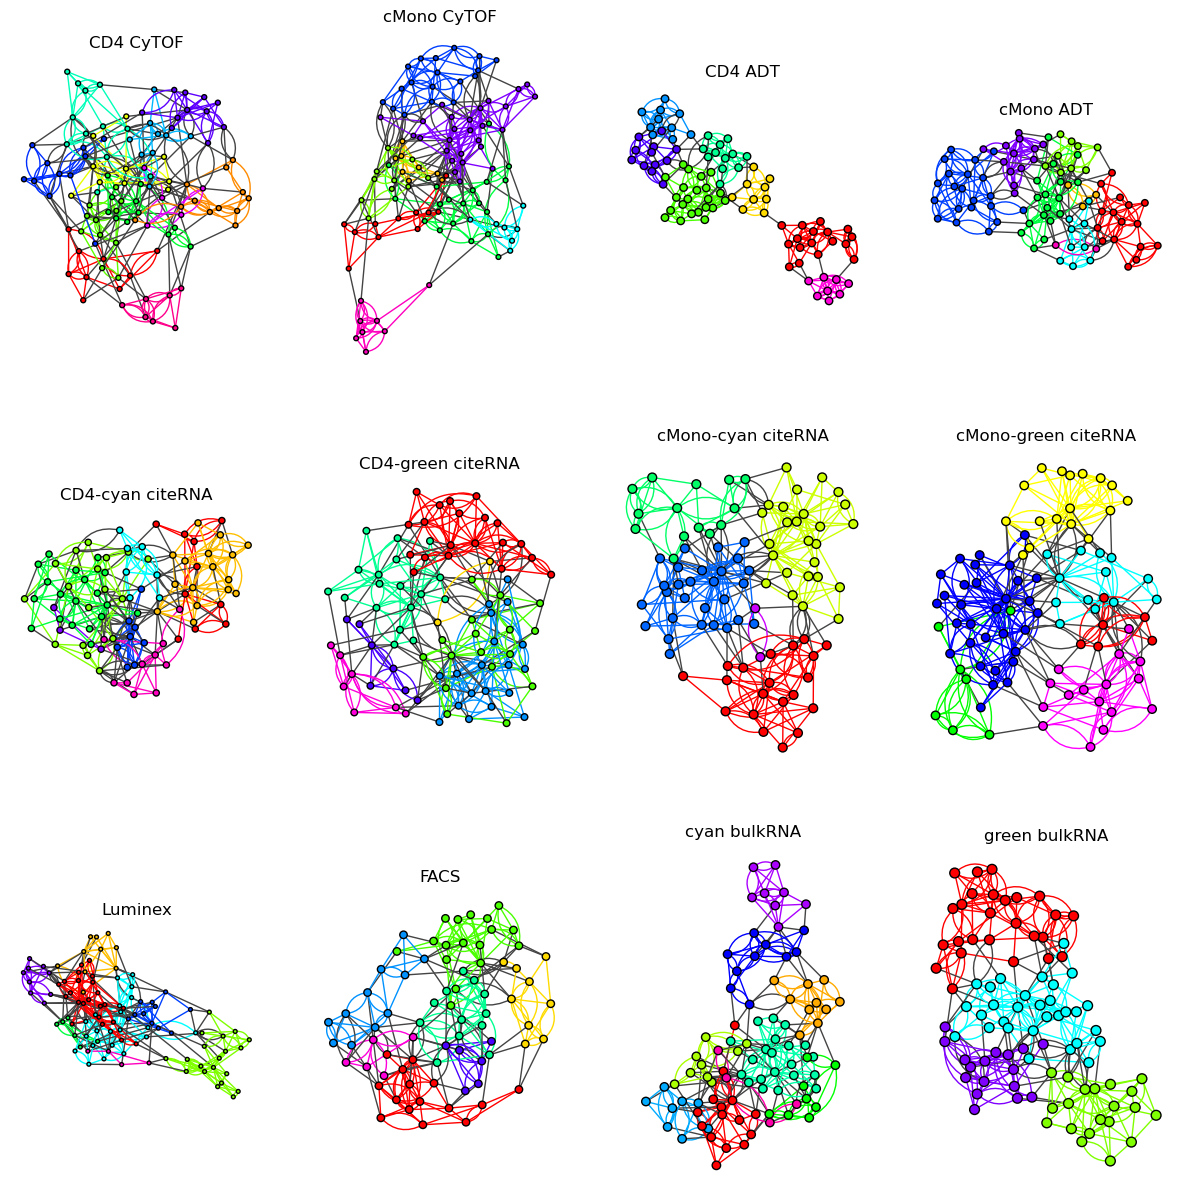

In [42]:
fig, ax = plt.subplots(3,4,figsize=(15,15))

c, palette = community_comp(g_5_cytof["CD4"])
ig.plot(
    c,
    palette=palette,
    edge_width=1,
    target=ax[0,0],
    vertex_size=0.3,
)
ax[0,0].set_title("CD4 CyTOF")
id_to_num_com_5NN[name_to_id["cytof_CD4"]] = len(palette)

c, palette = community_comp(g_5_cytof["cMono"])
ig.plot(
    c,
    palette=palette,
    edge_width=1,
    target=ax[0,1],
    vertex_size=0.3,
)
ax[0,1].set_title("cMono CyTOF")
id_to_num_com_5NN[name_to_id["cytof_cMono"]] = len(palette)

c, palette = community_comp(g_5_adt["CD4"])
ig.plot(
    c,
    palette=palette,
    edge_width=1,
    target=ax[0,2],
    vertex_size=0.3,
)
ax[0,2].set_title("CD4 ADT")
id_to_num_com_5NN[name_to_id["adt_CD4"]] = len(palette)


c, palette = community_comp(g_5_adt["cMono"])
ig.plot(
    c,
    palette=palette,
    edge_width=1,
    target=ax[0,3],
    vertex_size=0.3,
)
ax[0,3].set_title("cMono ADT")
id_to_num_com_5NN[name_to_id["adt_cMono"]] = len(palette)

c, palette = community_comp(g_5_citeRNA["CD4-cyan"])
ig.plot(
    c,
    palette=palette,
    edge_width=1,
    target=ax[1,0],
    vertex_size=0.3,
)
ax[1,0].set_title("CD4-cyan citeRNA")
id_to_num_com_5NN[name_to_id["citeRNA_CD4-cyan"]] = len(palette)


c, palette = community_comp(g_5_citeRNA["CD4-green"])
ig.plot(
    c,
    palette=palette,
    edge_width=1,
    target=ax[1,1],
    vertex_size=0.3,
)
ax[1,1].set_title("CD4-green citeRNA")
id_to_num_com_5NN[name_to_id["citeRNA_CD4-green"]] = len(palette)

c, palette = community_comp(g_5_citeRNA["cMono-cyan"])
ig.plot(
    c,
    palette=palette,
    edge_width=1,
    target=ax[1,2],
    vertex_size=0.3,
)
ax[1,2].set_title("cMono-cyan citeRNA")
id_to_num_com_5NN[name_to_id["citeRNA_cMono-cyan"]] = len(palette)


c, palette = community_comp(g_5_citeRNA["cMono-green"])
ig.plot(
    c,
    palette=palette,
    edge_width=1,
    target=ax[1,3],
    vertex_size=0.3,
)
ax[1,3].set_title("cMono-green citeRNA")
id_to_num_com_5NN[name_to_id["citeRNA_cMono-green"]] = len(palette)

c, palette = community_comp(g_5_luminex)
ig.plot(
    c,
    palette=palette,
    edge_width=1,
    target=ax[2,0],
    vertex_size=0.3,
)
ax[2,0].set_title("Luminex")
id_to_num_com_5NN[name_to_id["luminex"]] = len(palette)


c, palette = community_comp(g_5_facs)
ig.plot(
    c,
    palette=palette,
    edge_width=1,
    target=ax[2,1],
    vertex_size=0.3,
)
ax[2,1].set_title("FACS")
id_to_num_com_5NN[name_to_id["facs"]] = len(palette)

c, palette = community_comp(g_5_bulkRNA["cyan"])
ig.plot(
    c,
    palette=palette,
    edge_width=1,
    target=ax[2,2],
    vertex_size=0.3,
)
ax[2,2].set_title("cyan bulkRNA")
id_to_num_com_5NN[name_to_id["bulkRNA_cyan"]] = len(palette)


c, palette = community_comp(g_5_bulkRNA["green"])
ig.plot(
    c,
    palette=palette,
    edge_width=1,
    target=ax[2,3],
    vertex_size=0.3,
)
ax[2,3].set_title("green bulkRNA")
id_to_num_com_5NN[name_to_id["bulkRNA_green"]] = len(palette)

plt.show()

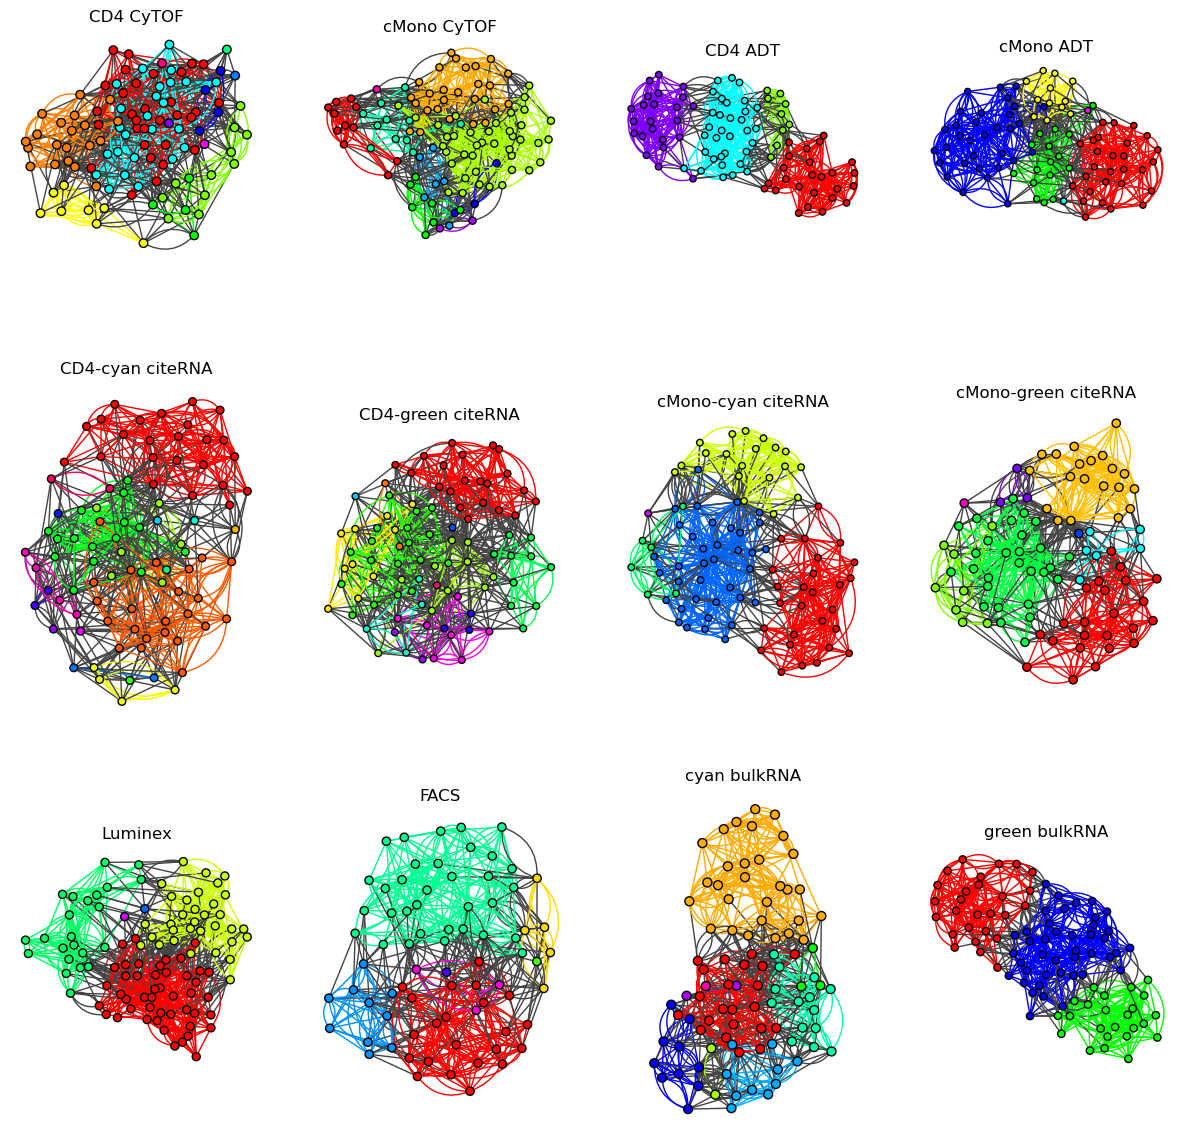

In [43]:
fig, ax = plt.subplots(3,4,figsize=(15,15))

c, palette = community_comp(g_10_cytof["CD4"])
ig.plot(
    c,
    palette=palette,
    edge_width=1,
    target=ax[0,0],
    vertex_size=0.3,
)
ax[0,0].set_title("CD4 CyTOF")
id_to_num_com_10NN[name_to_id["cytof_CD4"]] = len(palette)


c, palette = community_comp(g_10_cytof["cMono"])
ig.plot(
    c,
    palette=palette,
    edge_width=1,
    target=ax[0,1],
    vertex_size=0.3,
)
ax[0,1].set_title("cMono CyTOF")
id_to_num_com_10NN[name_to_id["cytof_cMono"]] = len(palette)

c, palette = community_comp(g_10_adt["CD4"])
ig.plot(
    c,
    palette=palette,
    edge_width=1,
    target=ax[0,2],
    vertex_size=0.3,
)
ax[0,2].set_title("CD4 ADT")
id_to_num_com_10NN[name_to_id["adt_CD4"]] = len(palette)


c, palette = community_comp(g_10_adt["cMono"])
ig.plot(
    c,
    palette=palette,
    edge_width=1,
    target=ax[0,3],
    vertex_size=0.3,
)
ax[0,3].set_title("cMono ADT")
id_to_num_com_10NN[name_to_id["adt_cMono"]] = len(palette)

c, palette= community_comp(g_10_citeRNA["CD4-cyan"])
ig.plot(
    c,
    palette=palette,
    edge_width=1,
    target=ax[1,0],
    vertex_size=0.3,
)
ax[1,0].set_title("CD4-cyan citeRNA")
id_to_num_com_10NN[name_to_id["citeRNA_CD4-cyan"]] = len(palette)


c, palette = community_comp(g_10_citeRNA["CD4-green"])
ig.plot(
    c,
    palette=palette,
    edge_width=1,
    target=ax[1,1],
    vertex_size=0.3,
)
ax[1,1].set_title("CD4-green citeRNA")
id_to_num_com_10NN[name_to_id["citeRNA_CD4-green"]] = len(palette)

c, palette = community_comp(g_10_citeRNA["cMono-cyan"])
ig.plot(
    c,
    palette=palette,
    edge_width=1,
    target=ax[1,2],
    vertex_size=0.3,
)
ax[1,2].set_title("cMono-cyan citeRNA")
id_to_num_com_10NN[name_to_id["citeRNA_cMono-cyan"]] = len(palette)


c, palette = community_comp(g_10_citeRNA["cMono-green"])
ig.plot(
    c,
    palette=palette,
    edge_width=1,
    target=ax[1,3],
    vertex_size=0.3,
)
ax[1,3].set_title("cMono-green citeRNA")
id_to_num_com_10NN[name_to_id["citeRNA_cMono-green"]] = len(palette)

c, palette = community_comp(g_10_luminex)
ig.plot(
    c,
    palette=palette,
    edge_width=1,
    target=ax[2,0],
    vertex_size=0.3,
)
ax[2,0].set_title("Luminex")
id_to_num_com_10NN[name_to_id["luminex"]] = len(palette)


c, palette = community_comp(g_10_facs)
ig.plot(
    c,
    palette=palette,
    edge_width=1,
    target=ax[2,1],
    vertex_size=0.3,
)
ax[2,1].set_title("FACS")
id_to_num_com_10NN[name_to_id["facs"]] = len(palette)

c, palette = community_comp(g_10_bulkRNA["cyan"])
ig.plot(
    c,
    palette=palette,
    edge_width=1,
    target=ax[2,2],
    vertex_size=0.3,
)
ax[2,2].set_title("cyan bulkRNA")
id_to_num_com_10NN[name_to_id["bulkRNA_cyan"]] = len(palette)


c, palette = community_comp(g_10_bulkRNA["green"])
ig.plot(
    c,
    palette=palette,
    edge_width=1,
    target=ax[2,3],
    vertex_size=0.3,
)
ax[2,3].set_title("green bulkRNA")
id_to_num_com_10NN[name_to_id["bulkRNA_green"]] = len(palette)

plt.show()


In [44]:
# To ensure all communities are computed and saved as a vertex attribute
modules = {"cytof": g_10_cytof, "adt": g_10_adt, "bulkRNA": g_10_bulkRNA, "citeRNA": g_10_citeRNA}
for module_name, module in modules.items():
    for name, v in module.items():
        _, palette = community_comp(v)
        id_to_num_com_10NN[name_to_id[module_name + "_" + name]] = len(palette)

In [45]:
# To ensure all communities are computed and saved as a vertex attribute
modules = {"cytof": g_5_cytof, "adt": g_5_adt, "bulkRNA": g_5_bulkRNA, "citeRNA": g_5_citeRNA}
for module_name, module in modules.items():
    for name, v in module.items():
        _, palette = community_comp(v)
        id_to_num_com_5NN[name_to_id[module_name + "_" + name]] = len(palette)

In [46]:
keys = ["80 pct", "10 pct", "50 pct", "10 pct pn", "50 pct pn"]
modules = {"cytof": graphs_cytof, "adt": graphs_adt, "bulkRNA": graphs_bulkRNA, "citeRNA": graphs_citeRNA}
for module_name, module in modules.items():
    for name, graphs in module.items():
        for key in keys:
            graph = graphs[key]
            _, palette = community_comp(graph)
            if key == "80 pct":
                id_to_80pct_10KNN[name_to_id[module_name + "_" + name]] = graph
                id_to_80pct_10KNN_num_com[name_to_id[module_name + "_" + name]] = len(palette)
            elif key == "50 pct":
                id_to_50pct_10KNN[name_to_id[module_name + "_" + name]] = graph
                id_to_50pct_10KNN_num_com[name_to_id[module_name + "_" + name]] = len(palette)
            elif key == "10 pct":
                id_to_10pct_10KNN[name_to_id[module_name + "_" + name]] = graph
                id_to_10pct_10KNN_num_com[name_to_id[module_name + "_" + name]]= len(palette)
            elif key == "10 pct pn":
                id_to_10pct_per_node_10KNN[name_to_id[module_name + "_" + name]] = graph
                id_to_10pct_per_node_10KNN_num_com[name_to_id[module_name + "_" + name]] = len(palette)
            elif key == "50 pct pn":
                id_to_50pct_per_node_10KNN[name_to_id[module_name + "_" + name]] = graph
                id_to_50pct_per_node_10KNN_num_com[name_to_id[module_name + "_" + name]] = len(palette)

            

In [47]:
# To ensure all communities are computed and saved as a vertex attribute
keys = ["80 pct", "10 pct", "50 pct", "10 pct pn", "50 pct pn"]
modules = {"luminex": graphs_luminex, "facs": graphs_facs}
for module_name, module in modules.items():
    for key in keys:
        graph = module[key]
        _, palette = community_comp(graph)
        if key == "80 pct":
            id_to_80pct_10KNN[name_to_id[module_name]] = graph
            id_to_80pct_10KNN_num_com[name_to_id[module_name]] = len(palette)
        elif key == "50 pct":
            id_to_50pct_10KNN[name_to_id[module_name]] = graph
            id_to_50pct_10KNN_num_com[name_to_id[module_name]] = len(palette)
        elif key == "10 pct":
            id_to_10pct_10KNN[name_to_id[module_name]] = graph
            id_to_10pct_10KNN_num_com[name_to_id[module_name]]= len(palette)
        elif key == "10 pct pn":
            id_to_10pct_per_node_10KNN[name_to_id[module_name]] = graph
            id_to_10pct_per_node_10KNN_num_com[name_to_id[module_name]] = len(palette)
        elif key == "50 pct pn":
            id_to_50pct_per_node_10KNN[name_to_id[module_name]] = graph
            id_to_50pct_per_node_10KNN_num_com[name_to_id[module_name]] = len(palette)

In [48]:
id_to_50pct_per_node_10KNN

{'G352': <igraph.Graph at 0x7f781614e140>,
 'G353': <igraph.Graph at 0x7f781614dc40>,
 'G354': <igraph.Graph at 0x7f781614d740>,
 'G355': <igraph.Graph at 0x7f781614cf40>,
 'G356': <igraph.Graph at 0x7f781614cb40>,
 'G357': <igraph.Graph at 0x7f781614c340>,
 'G358': <igraph.Graph at 0x7f796399bd40>,
 'G359': <igraph.Graph at 0x7f796399b840>,
 'G360': <igraph.Graph at 0x7f796399b040>,
 'G361': <igraph.Graph at 0x7f796399aa40>,
 'G362': <igraph.Graph at 0x7f796399a640>,
 'G363': <igraph.Graph at 0x7f796007b640>,
 'G335': <igraph.Graph at 0x7f7963999140>,
 'G336': <igraph.Graph at 0x7f7963998840>,
 'G337': <igraph.Graph at 0x7f7963998240>,
 'G338': <igraph.Graph at 0x7f796398fd40>,
 'G339': <igraph.Graph at 0x7f796398f740>,
 'G340': <igraph.Graph at 0x7f796398f140>,
 'G341': <igraph.Graph at 0x7f796396f240>,
 'G342': <igraph.Graph at 0x7f732b977540>,
 'G343': <igraph.Graph at 0x7f732b977b40>,
 'G344': <igraph.Graph at 0x7f79413b0240>,
 'G345': <igraph.Graph at 0x7f79413b0840>,
 'G346': <i

<Axes: >

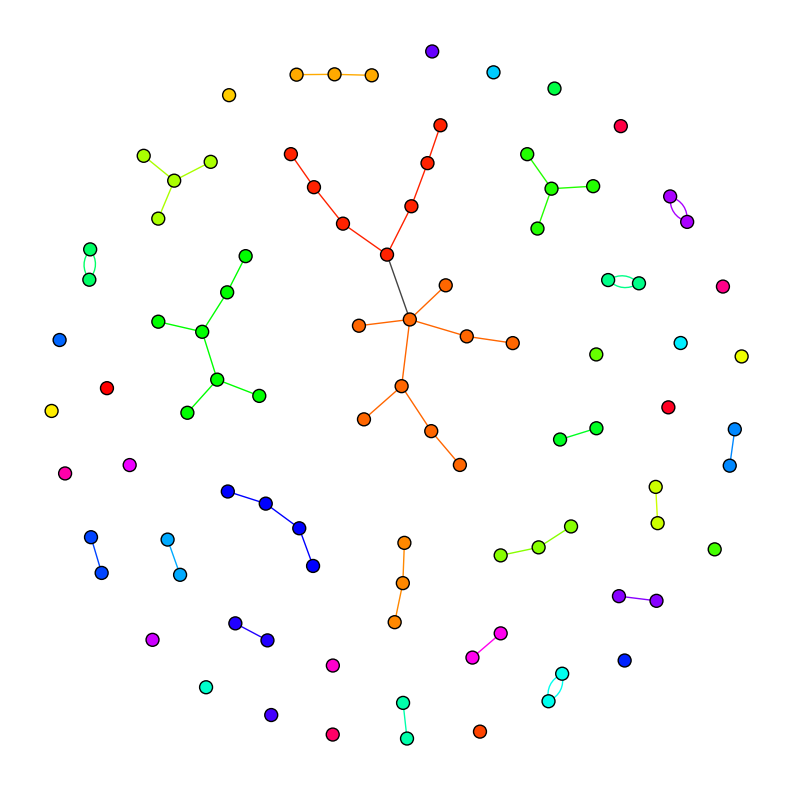

In [49]:
c, palette = community_comp(graphs_bulkRNA["green"]["10 pct pn"])
fig, ax = plt.subplots(figsize=(10,10))

ig.plot(
    c,
    palette=palette,
    edge_width=1,
    target=ax,
    vertex_size=0.3,
)

## Diseas Communities with KNNs
Computes and visualizes graphs based on diseaes

In [50]:
colors = ["#8f1616", # wine red
          "#3e4ae0", # blue
          "#b4b8f8", # lavender
          "#fe0100", # red
          "#f90f98", # hot pink
          "#8fce00", # light green
          "#ec8416", # orange
          ]

disease_color_map = {}
for i, disease in enumerate(set(patient_disease_map.values())): # Every disease is assigned a color
    disease_color_map[str(disease)] = colors[i]
disease_color_map["extra"] = "#000000" # black
disease_color_map

{'COVID_MILD': '#8f1616',
 'COVID_CONV': '#3e4ae0',
 'COVID_SEV': '#b4b8f8',
 'COVID_CRIT': '#fe0100',
 'HV': '#f90f98',
 'COVID_HCW': '#8fce00',
 'Sepsis': '#ec8416',
 'extra': '#000000'}

In [51]:
def disease_comp(g):
    disease_colors_v = [] # Vertex colors
    disease_colors_e = [0] * g.ecount() # Edge colors
    for i, disease in enumerate(g.vs["disease"]):
        disease_colors_v.append(disease_color_map[disease]) # map disease to its color, save in order of nodes in a lits
        edges = g.vs[i].incident() # for node i, get all its edges
        for e in edges: 
            e_id = g.get_eid(e.source, e.target) # obtain the edge number using its source and target. 
            if g.vs["disease"][e.target] == g.vs["disease"][e.source]: # the information that the edge connects two patients with the same disease
                disease_colors_e[e_id] = disease_color_map[disease] # store the edge color in the correct position 

    return disease_colors_v, disease_colors_e

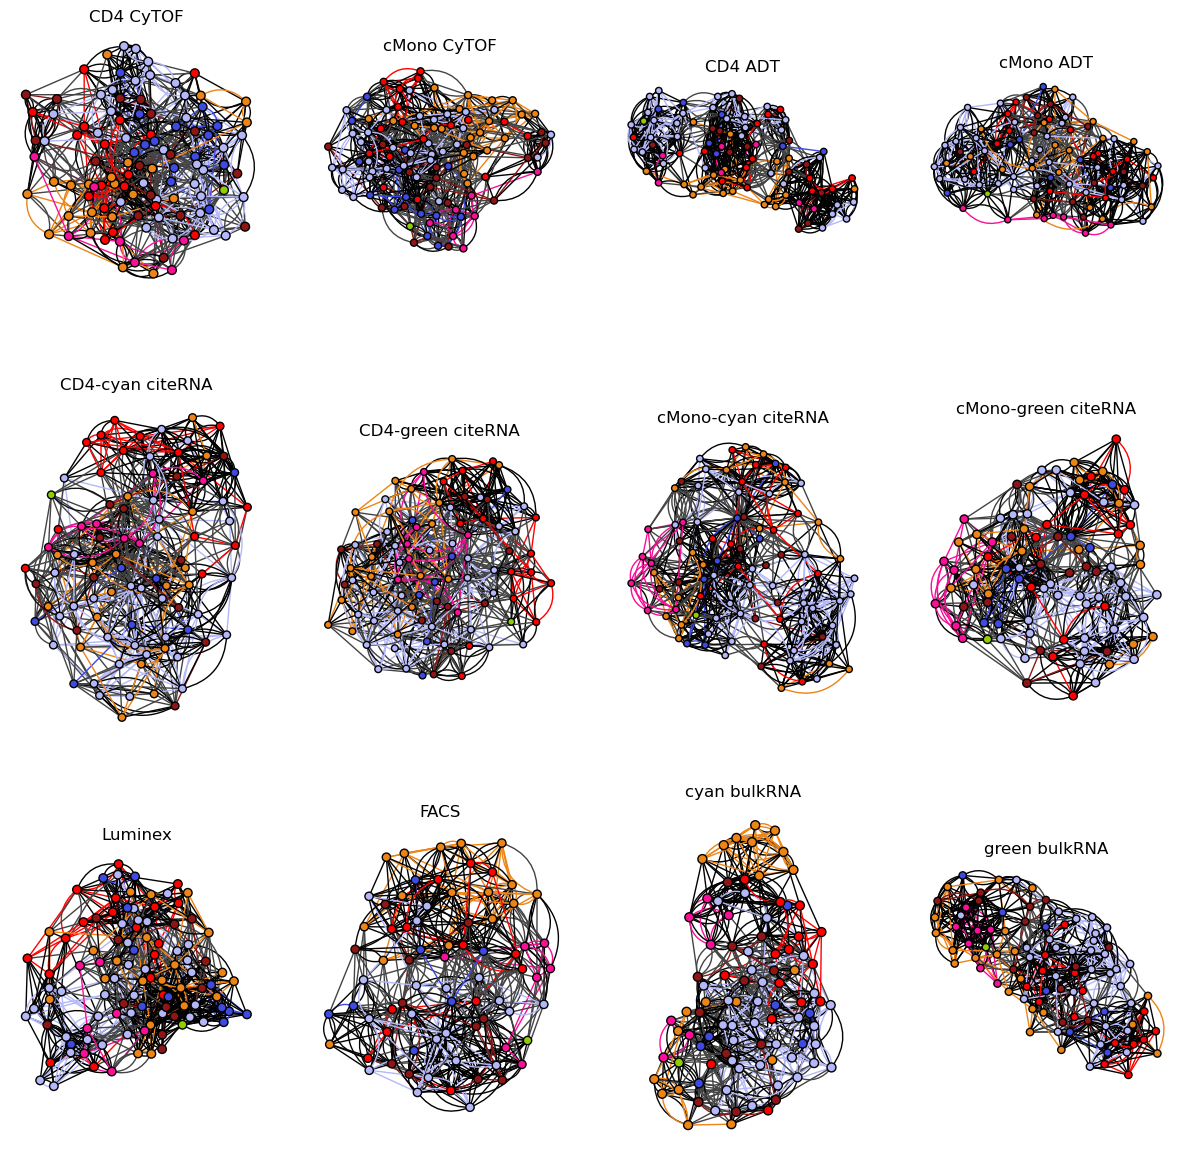

In [52]:
fig, ax = plt.subplots(3,4,figsize=(15,15))

v_c, e_c = disease_comp(g_10_cytof["CD4"])
ig.plot(
    g_10_cytof["CD4"],
    edge_width=1,
    target=ax[0,0],
    vertex_size=0.3,
    edge_color = e_c,
    vertex_color = v_c
)
ax[0,0].set_title("CD4 CyTOF")

v_c, e_c = disease_comp(g_10_cytof["cMono"])
ig.plot(
    g_10_cytof["cMono"],
    edge_width=1,
    target=ax[0,1],
    vertex_size=0.3,
    edge_color = e_c,
    vertex_color = v_c
)
ax[0,1].set_title("cMono CyTOF")

v_c, e_c = disease_comp(g_10_adt["CD4"])
ig.plot(
    g_10_adt["CD4"],
    edge_width=1,
    target=ax[0,2],
    vertex_size=0.3,
    edge_color = e_c,
    vertex_color = v_c
)
ax[0,2].set_title("CD4 ADT")

v_c, e_c = disease_comp(g_10_adt["cMono"])
ig.plot(
    g_10_adt["cMono"],
    edge_width=1,
    target=ax[0,3],
    vertex_size=0.3,
    edge_color = e_c,
    vertex_color = v_c
)
ax[0,3].set_title("cMono ADT")

v_c, e_c = disease_comp(g_10_citeRNA["CD4-cyan"])
ig.plot(
    g_10_citeRNA["CD4-cyan"],
    edge_width=1,
    target=ax[1,0],
    vertex_size=0.3,
    edge_color = e_c,
    vertex_color = v_c
)
ax[1,0].set_title("CD4-cyan citeRNA")

v_c, e_c = disease_comp(g_10_citeRNA["CD4-green"])
ig.plot(
    g_10_citeRNA["CD4-green"],
    edge_width=1,
    target=ax[1,1],
    vertex_size=0.3,
    edge_color = e_c,
    vertex_color = v_c
)
ax[1,1].set_title("CD4-green citeRNA")

v_c, e_c = disease_comp(g_10_citeRNA["cMono-cyan"])
ig.plot(
    g_10_citeRNA["cMono-cyan"],
    edge_width=1,
    target=ax[1,2],
    vertex_size=0.3,
    edge_color = e_c,
    vertex_color = v_c
)
ax[1,2].set_title("cMono-cyan citeRNA")

v_c, e_c = disease_comp(g_10_citeRNA["cMono-green"])
ig.plot(
    g_10_citeRNA["cMono-green"],
    edge_width=1,
    target=ax[1,3],
    vertex_size=0.3,
    edge_color = e_c,
    vertex_color = v_c
)
ax[1,3].set_title("cMono-green citeRNA")

v_c, e_c = disease_comp(g_10_luminex)
ig.plot(
    g_10_luminex,
    edge_width=1,
    target=ax[2,0],
    vertex_size=0.3,
    edge_color = e_c,
    vertex_color = v_c
)
ax[2,0].set_title("Luminex")

v_c, e_c = disease_comp(g_10_facs)
ig.plot(
    g_10_facs,
    edge_width=1,
    target=ax[2,1],
    vertex_size=0.3,
    edge_color = e_c,
    vertex_color = v_c
)
ax[2,1].set_title("FACS")

v_c, e_c = disease_comp(g_10_bulkRNA["cyan"])
ig.plot(
    g_10_bulkRNA["cyan"],
    edge_width=1,
    target=ax[2,2],
    vertex_size=0.3,
    edge_color = e_c,
    vertex_color = v_c
)
ax[2,2].set_title("cyan bulkRNA")

v_c, e_c = disease_comp(g_10_bulkRNA["green"])
ig.plot(
    g_10_bulkRNA["green"],
    edge_width=1,
    target=ax[2,3],
    vertex_size=0.3,
    edge_color = e_c,
    vertex_color = v_c
)
ax[2,3].set_title("green bulkRNA")

plt.show()

## Edge Information Computation

In [53]:
modalities = [g_10_adt, g_10_cytof, g_10_citeRNA, g_10_bulkRNA]

for modality in modalities:
    for key in modality.keys():
        network = modality[key]
        for edge in network.es: # Go through every edge and extract the information, what nodes it connects 
            # The information if s and t have the same disease
            s_d = network.vs[edge.source]["disease"] 
            t_d = network.vs[edge.target]["disease"]
            # The information if s and t are in the same community
            s_com = network.vs[edge.source]["community_color"] 
            t_com = network.vs[edge.source]["community_color"]   
            # The information if s and t have the same disease group
            s_dg = network.vs[edge.source]["disease_group"] 
            t_dg = network.vs[edge.target]["disease_group"]

            edge["same_com"] = s_com == t_com
            edge["same_disease"] = s_d == t_d
            edge["same_disease_group"] = s_dg == t_dg

            edge["disease_1"] = s_d
            edge["disease_2"] = t_d 
            
            edge["com_1"] = s_com
            edge["com_2"] = t_com          

            edge["dg_1"] = s_dg
            edge["dg_2"] = t_dg           

In [54]:
modalities = [g_10_luminex, g_10_facs]

for network in modalities:
    for edge in network.es:
        # The information if s and t have the same disease
        s_d = network.vs[edge.source]["disease"] 
        t_d = network.vs[edge.target]["disease"]
        # The information if s and t are in the same community
        s_com = network.vs[edge.source]["community_color"] 
        t_com = network.vs[edge.source]["community_color"]   
        # The information if s and t have the same disease group
        s_dg = network.vs[edge.source]["disease_group"] 
        t_dg = network.vs[edge.target]["disease_group"]

        edge["same_com"] = s_com == t_com
        edge["same_disease"] = s_d == t_d
        edge["same_disease_group"] = s_dg == t_dg

        edge["disease_1"] = s_d
        edge["disease_2"] = t_d 
            
        edge["com_1"] = s_com
        edge["com_2"] = t_com  

        edge["dg_1"] = s_dg
        edge["dg_2"] = t_dg 

In [55]:
modalities = [g_5_adt, g_5_cytof, g_5_citeRNA, g_5_bulkRNA]

for modality in modalities:
    for key in modality.keys():
        network = modality[key]
        for edge in network.es: # Go through every edge and extract the information, what nodes it connects 
            # The information if s and t have the same disease
            s_d = network.vs[edge.source]["disease"] 
            t_d = network.vs[edge.target]["disease"]
            # The information if s and t are in the same community
            s_com = network.vs[edge.source]["community_color"] 
            t_com = network.vs[edge.source]["community_color"]   
            # The information if s and t have the same disease group
            s_dg = network.vs[edge.source]["disease_group"] 
            t_dg = network.vs[edge.target]["disease_group"]

            edge["same_com"] = s_com == t_com
            edge["same_disease"] = s_d == t_d
            edge["same_disease_group"] = s_dg == t_dg

            edge["disease_1"] = s_d
            edge["disease_2"] = t_d 
            
            edge["com_1"] = s_com
            edge["com_2"] = t_com          

            edge["dg_1"] = s_dg
            edge["dg_2"] = t_dg           


modalities = [g_5_luminex, g_5_facs]

for network in modalities:
    for edge in network.es:
        # The information if s and t have the same disease
        s_d = network.vs[edge.source]["disease"] 
        t_d = network.vs[edge.target]["disease"]
        # The information if s and t are in the same community
        s_com = network.vs[edge.source]["community_color"] 
        t_com = network.vs[edge.source]["community_color"]   
        # The information if s and t have the same disease group
        s_dg = network.vs[edge.source]["disease_group"] 
        t_dg = network.vs[edge.target]["disease_group"]

        edge["same_com"] = s_com == t_com
        edge["same_disease"] = s_d == t_d
        edge["same_disease_group"] = s_dg == t_dg

        edge["disease_1"] = s_d
        edge["disease_2"] = t_d 
            
        edge["com_1"] = s_com
        edge["com_2"] = t_com  

        edge["dg_1"] = s_dg
        edge["dg_2"] = t_dg 


## Disease - Community Stats
The information regarding the frequency of each disease in each community.

In [56]:
communities_facs = {}

for vertex in g_10_facs.vs:
    com = "facs_" + str(vertex["community_color"])
    disease = vertex["disease"]
    if com in communities_facs.keys():
        if disease in communities_facs[com].keys():
            communities_facs[com][disease] = communities_facs[com][disease]  + 1
        else:
            communities_facs[com][disease] = 1
    else:
        communities_facs[com] = {}
        communities_facs[com][disease] = 1

communities_facs = {"facs": communities_facs}

In [57]:
communities_luminex = {}

for vertex in g_10_luminex.vs:
    com =  str(vertex["community_color"])
    disease = vertex["disease"]
    if com in communities_luminex.keys():
        if disease in communities_luminex[com].keys():
            communities_luminex[com][disease] = communities_luminex[com][disease]  + 1
        else:
            communities_luminex[com][disease] = 1
    else:
        communities_luminex[com] = {}
        communities_luminex[com][disease] = 1

communities_luminex = {"luminex": communities_luminex}

In [58]:
communities_bulkRNA = {}

for key in g_10_bulkRNA.keys(): # Go through every network
    communities_bulkRNA["bulkRNA_" + key] = {} 
    community_info = communities_bulkRNA["bulkRNA_" + key] 
    for vertex in g_10_bulkRNA[key].vs: # Go through every vertex in the network 
        com = str(vertex["community_color"]) # extract community information
        disease = vertex["disease"] # extract disease information
        if com in community_info.keys(): # for every community, store how many patients have a certain disease 
            if disease in community_info[com].keys():
                community_info[com][disease] += 1
            else:
                community_info[com][disease] = 1
        else:
            community_info[com] = {}
            community_info[com][disease] = 1

In [59]:
communities_citeRNA = {}

for key in g_10_citeRNA.keys(): # Go through every network
    communities_citeRNA["citeRNA_" + key] = {} 
    community_info = communities_citeRNA["citeRNA_" + key] 
    for vertex in g_10_citeRNA[key].vs: # Go through every vertex in the network 
        com =  str(vertex["community_color"]) # extract community information
        disease = vertex["disease"] # extract disease information
        if com in community_info.keys(): # for every community, store how many patients have a certain disease 
            if disease in community_info[com].keys():
                community_info[com][disease] += 1
            else:
                community_info[com][disease] = 1
        else:
            community_info[com] = {}
            community_info[com][disease] = 1

In [60]:
communities_cytof = {}

for key in g_10_cytof.keys(): # Go through every network
    communities_cytof["cytof_" + key] = {} 
    community_info = communities_cytof["cytof_" + key] 
    for vertex in g_10_cytof[key].vs: # Go through every vertex in the network 
        com = str(vertex["community_color"]) # extract community information
        disease = vertex["disease"] # extract disease information
        if com in community_info.keys(): # for every community, store how many patients have a certain disease 
            if disease in community_info[com].keys():
                community_info[com][disease] += 1
            else:
                community_info[com][disease] = 1
        else:
            community_info[com] = {}
            community_info[com][disease] = 1

In [61]:
communities_adt = {}

for key in g_10_adt.keys(): # Go through every network
    communities_adt["adt_" + key] = {} 
    community_info = communities_adt["adt_" + key] 
    for vertex in g_10_adt[key].vs: # Go through every vertex in the network 
        com = str(vertex["community_color"]) # extract community information
        disease = vertex["disease"] # extract disease information
        if com in community_info.keys(): # for every community, store how many patients have a certain disease 
            if disease in community_info[com].keys():
                community_info[com][disease] += 1
            else:
                community_info[com][disease] = 1
        else:
            community_info[com] = {}
            community_info[com][disease] = 1

In [62]:
all_communities = communities_adt | communities_cytof | communities_citeRNA | communities_bulkRNA | communities_luminex | communities_facs
all_diseases = set(patient_disease_map.values())
all_communities_df = {}

for network_name in all_communities.keys():
    df_disease_info = {k:[] for k in all_diseases}
    df_community_info = []
    network = all_communities[network_name]
    for community_name in network.keys():
        df_community_info.append(community_name)
        existing_info = network[community_name]
        missing_diseases = all_diseases.difference(existing_info.keys())
        missing_info = {d:0 for d in missing_diseases}
        all_info =  missing_info | existing_info
        for k in df_disease_info.keys():
            df_disease_info[k].append(all_info[k])
        all_communities[network_name][community_name] = {k: v for k, v in sorted(all_info.items(), key=lambda item: item[1])} # sort according to values 
    all_communities_df[network_name] = pd.DataFrame(df_disease_info, index=df_community_info)
        

/var/folders/d6/19fjtfkn2rb94y09ln9bk6m00000gn/T/ipykernel_32728/685726402.py:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(4,4, figsize=(20,20))


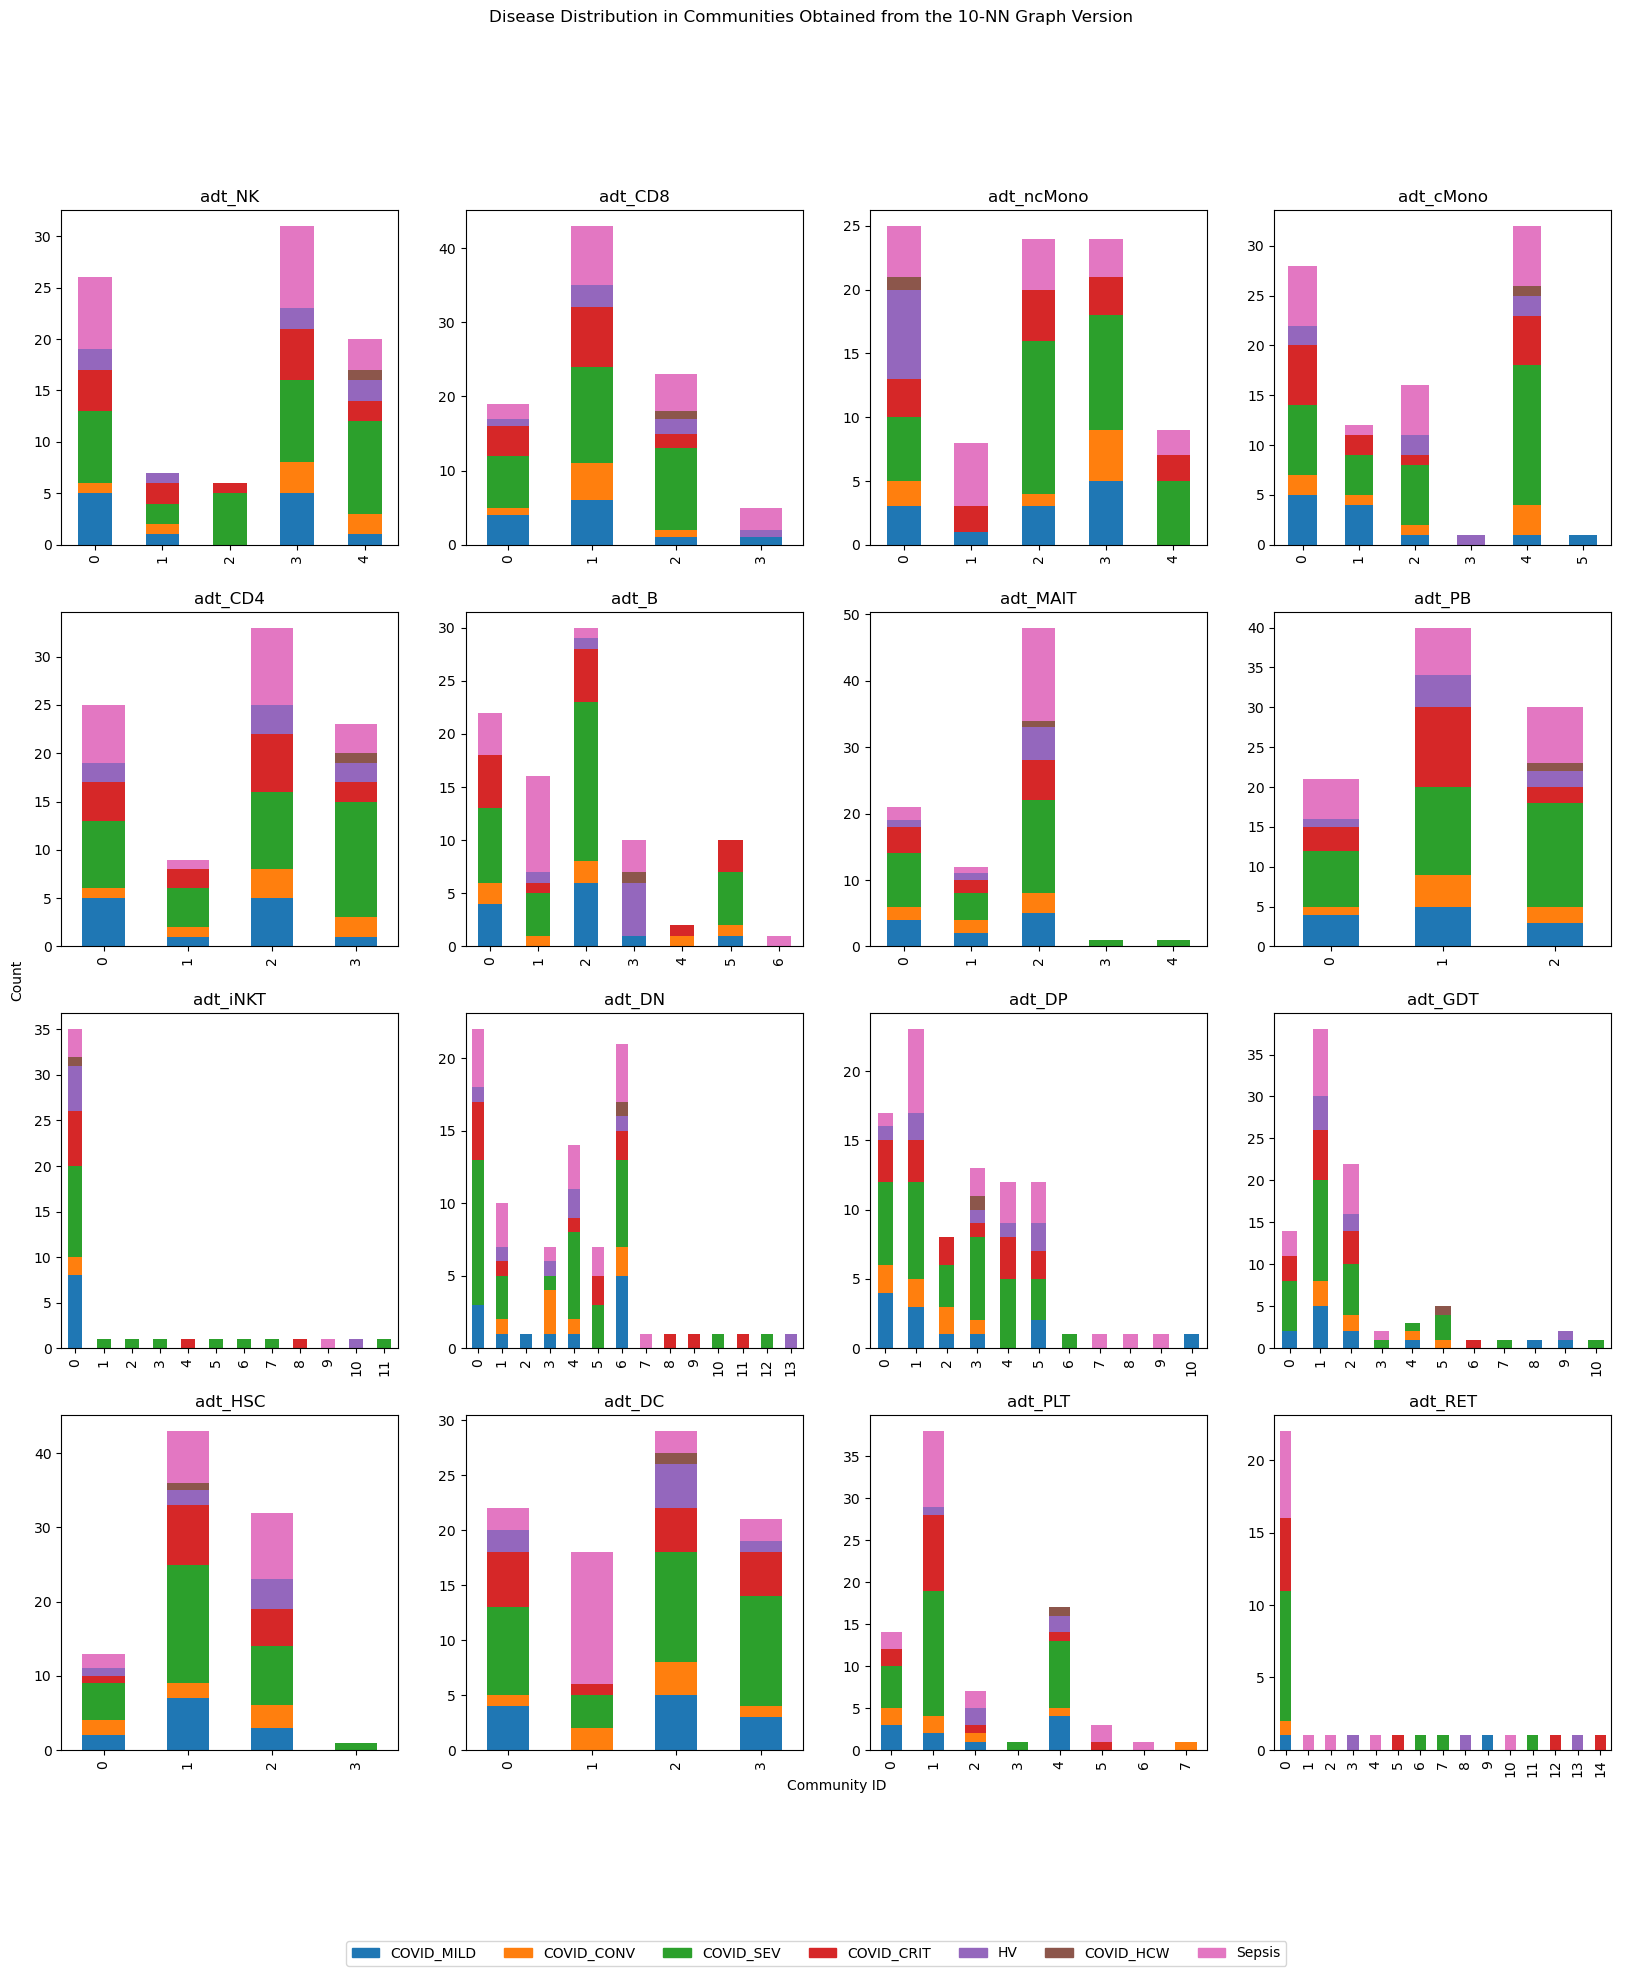

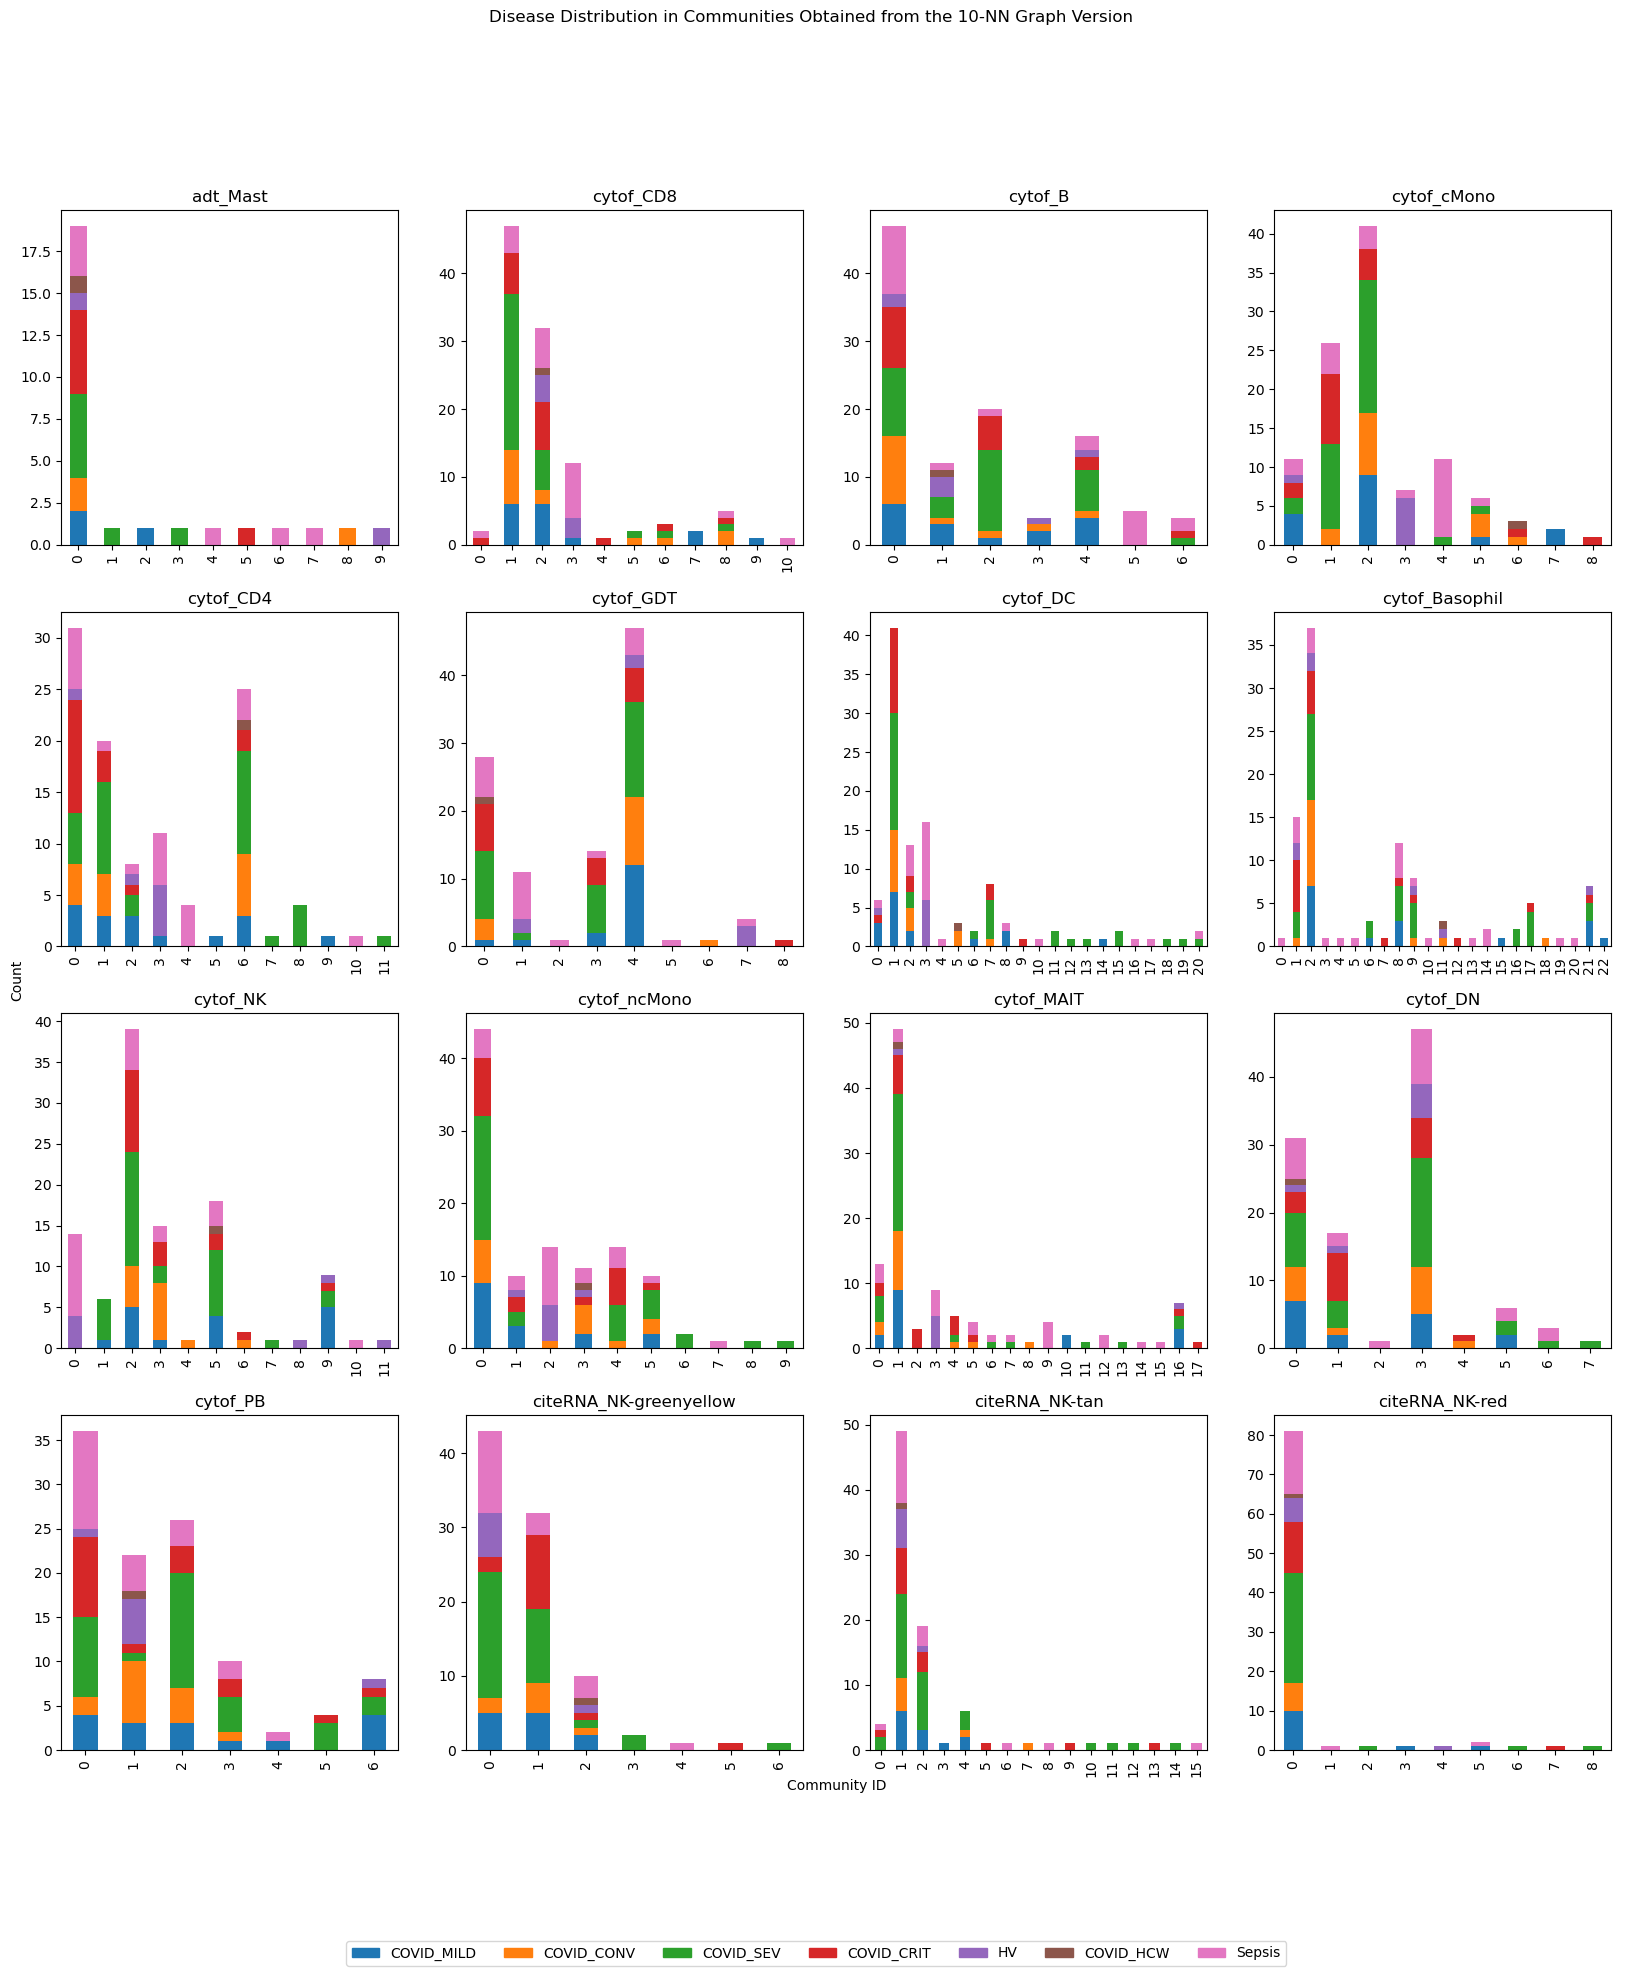

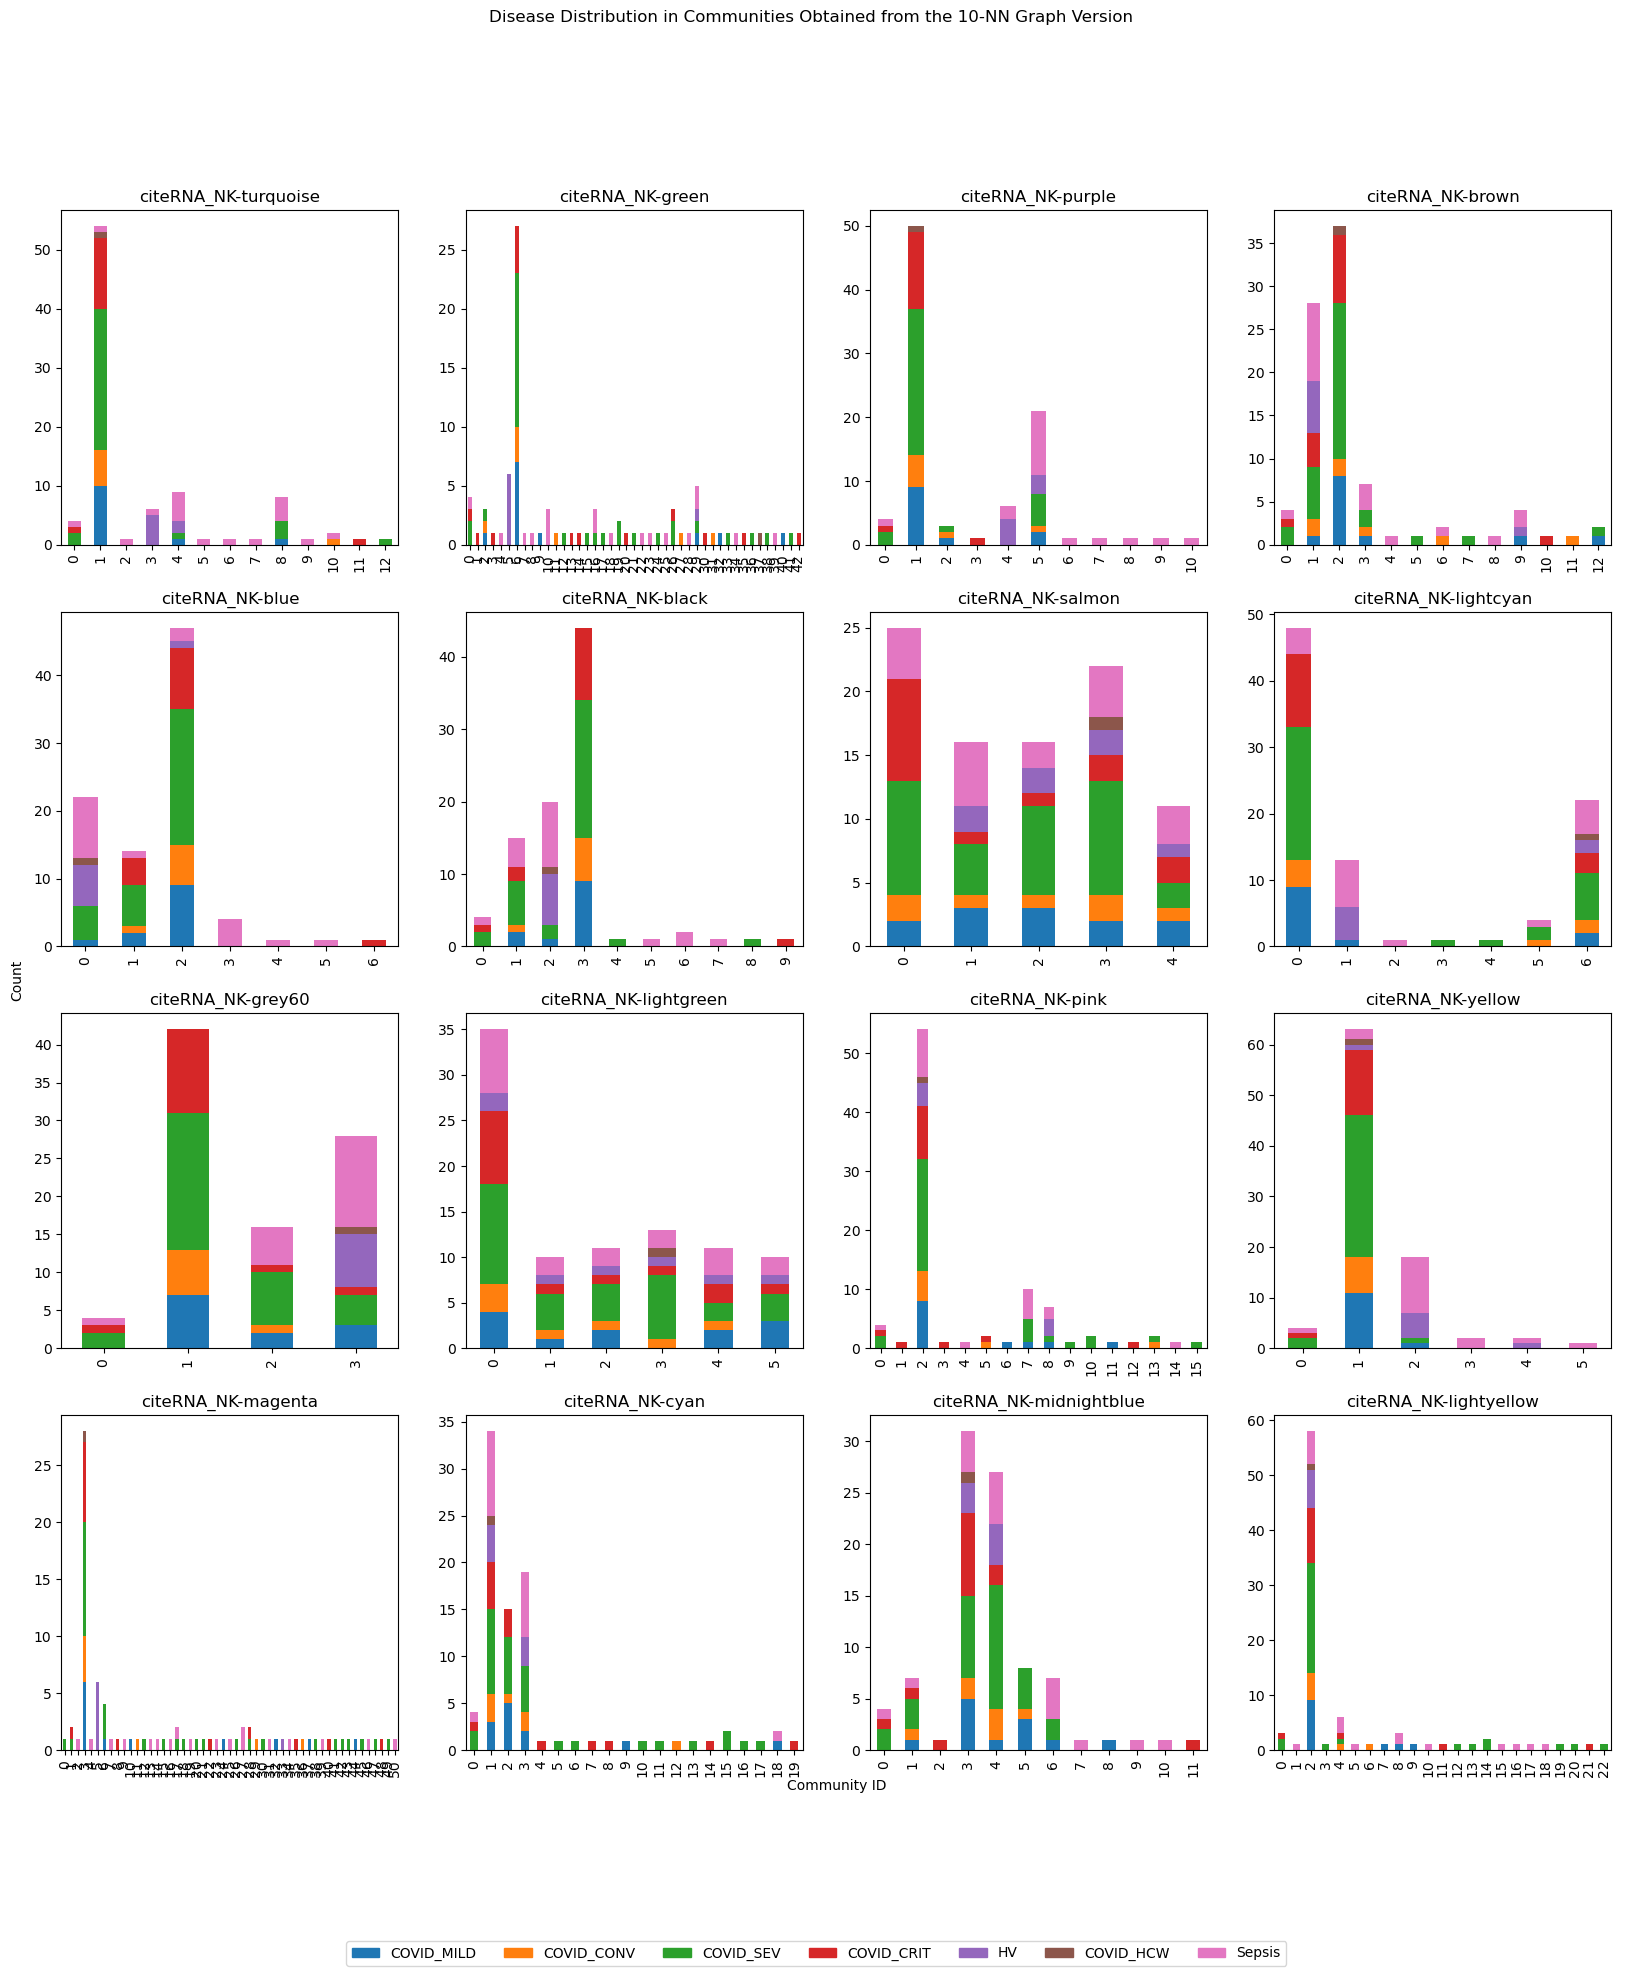

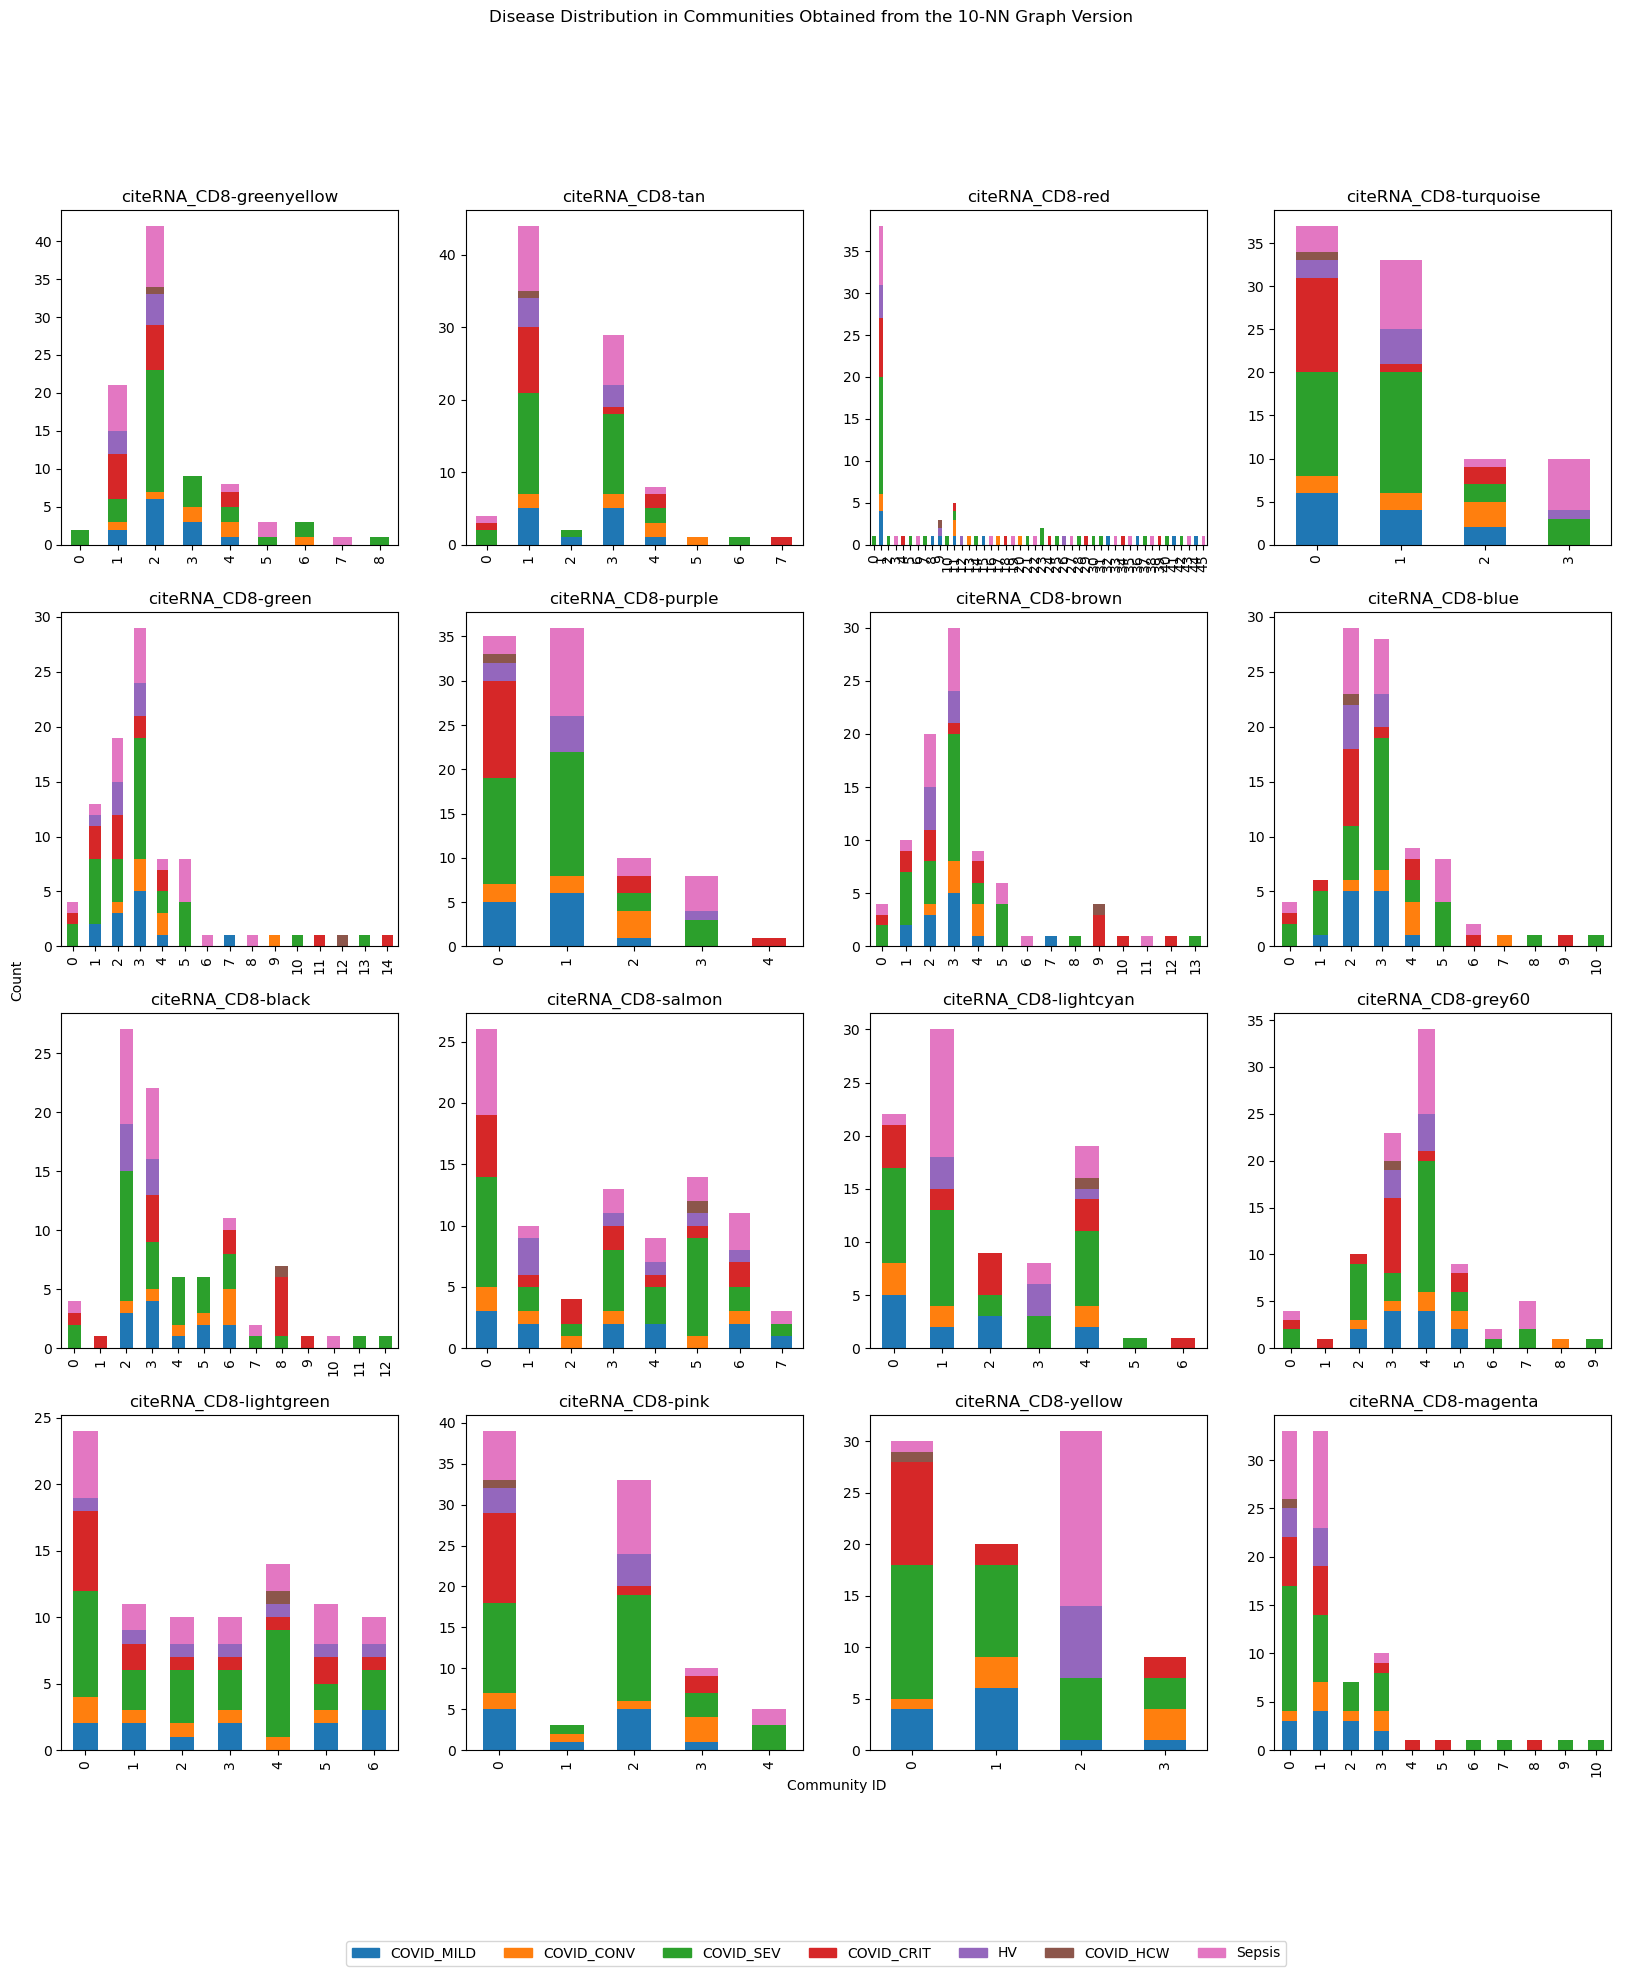

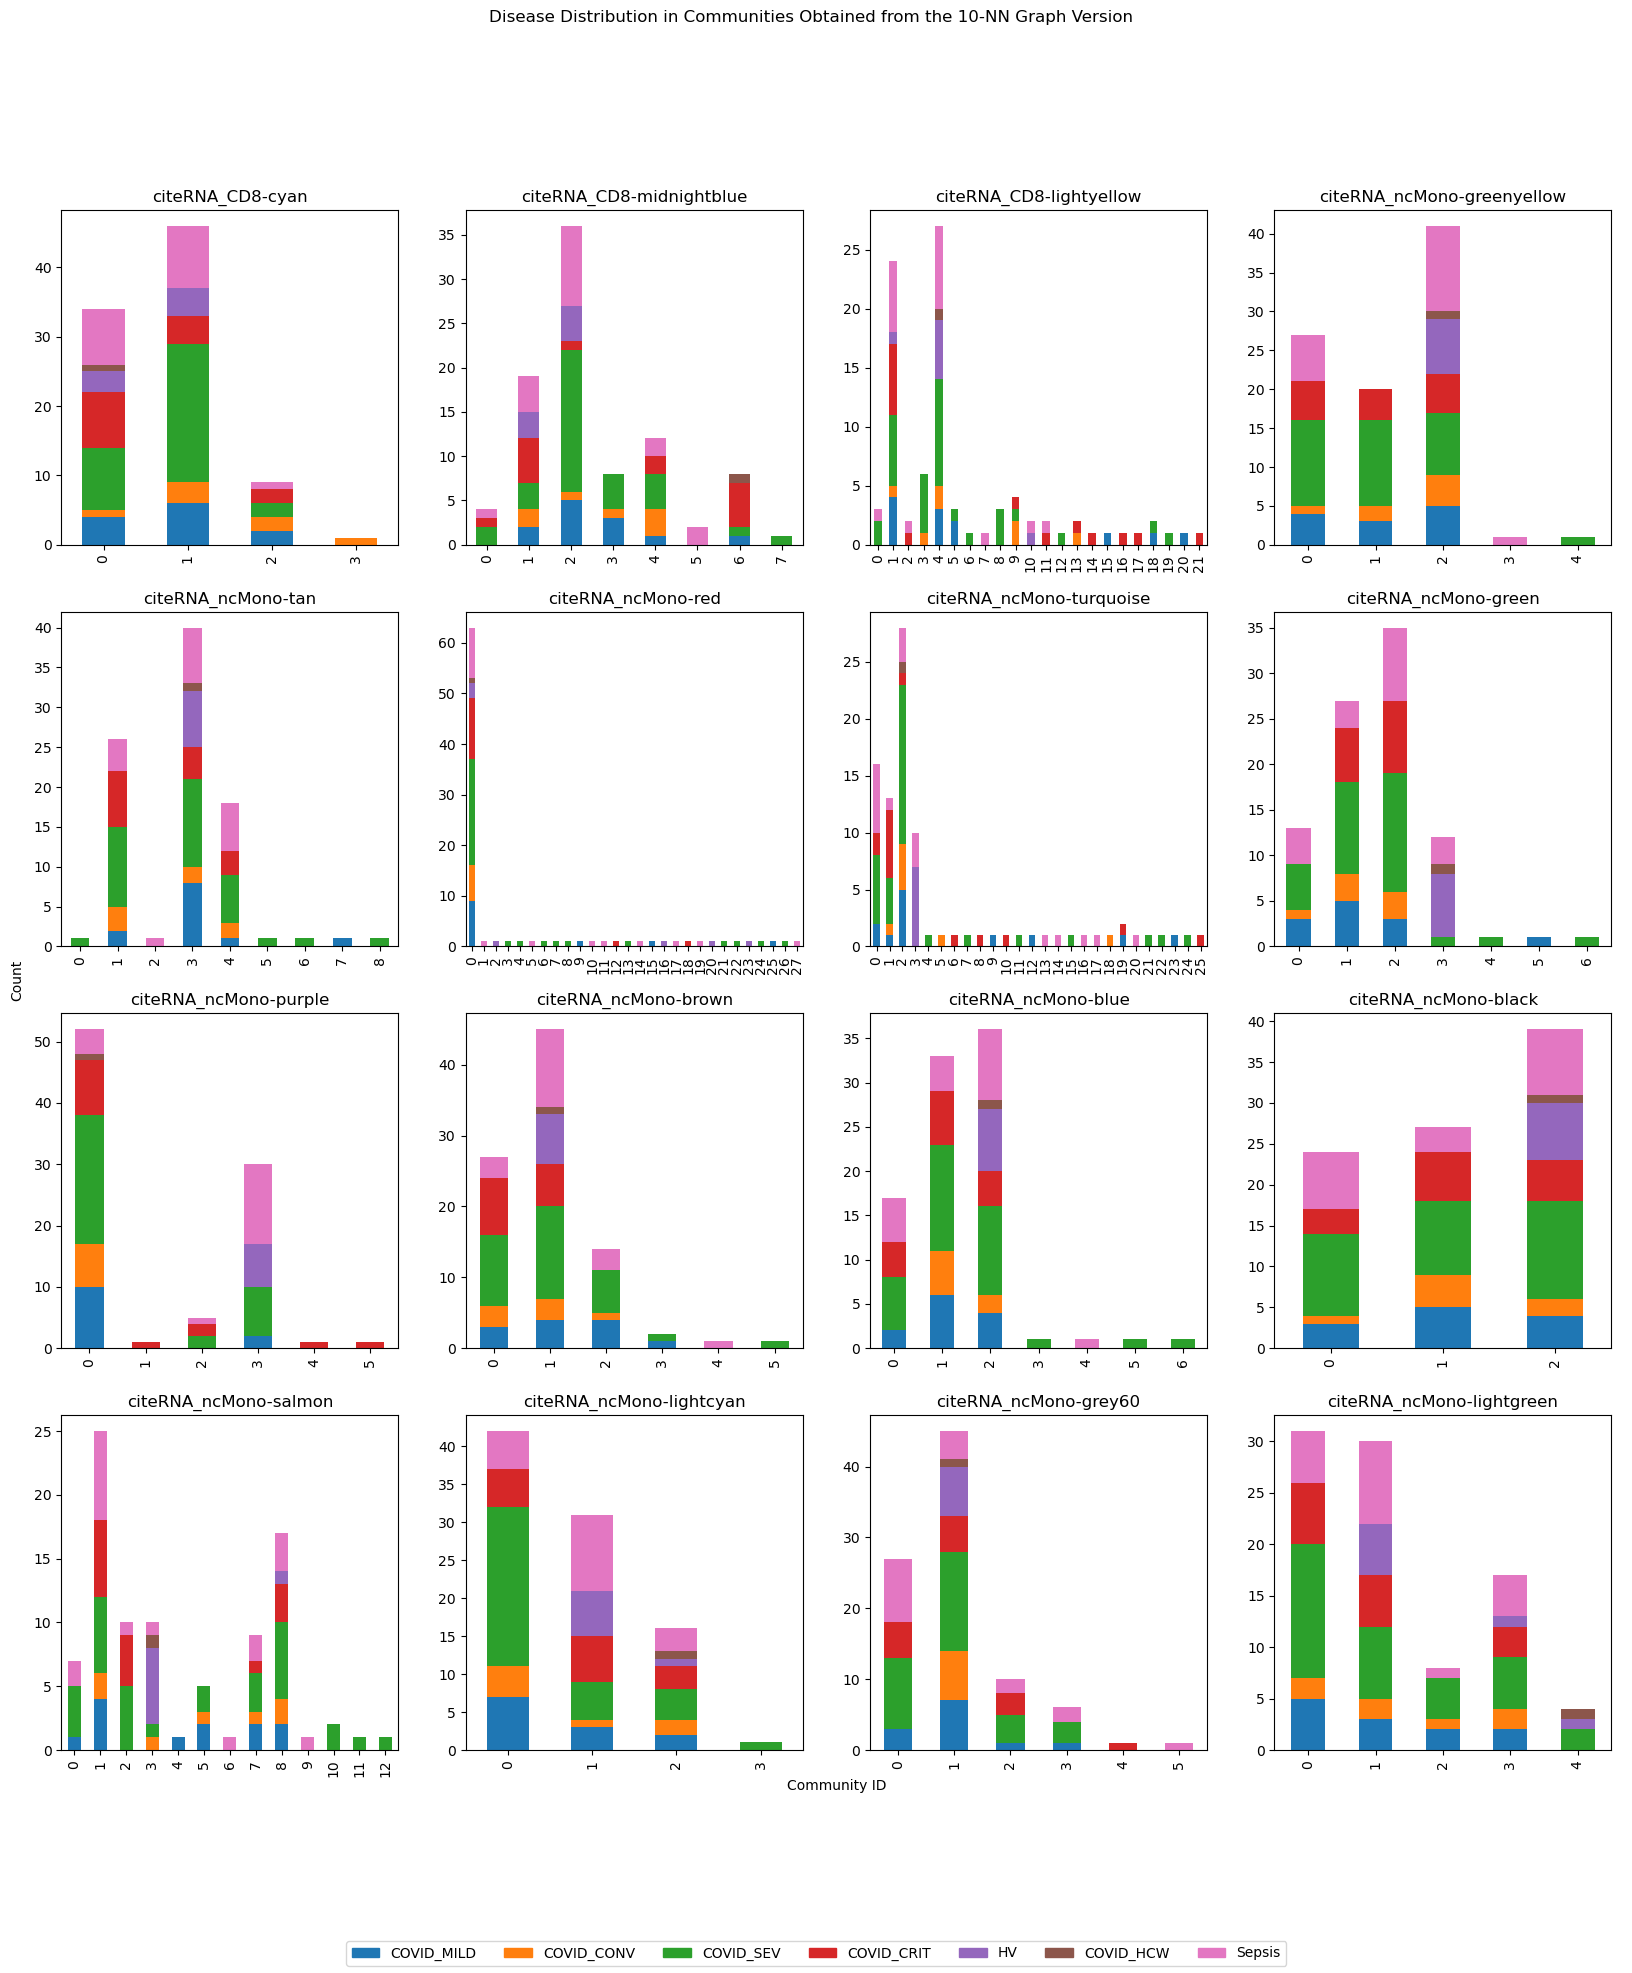

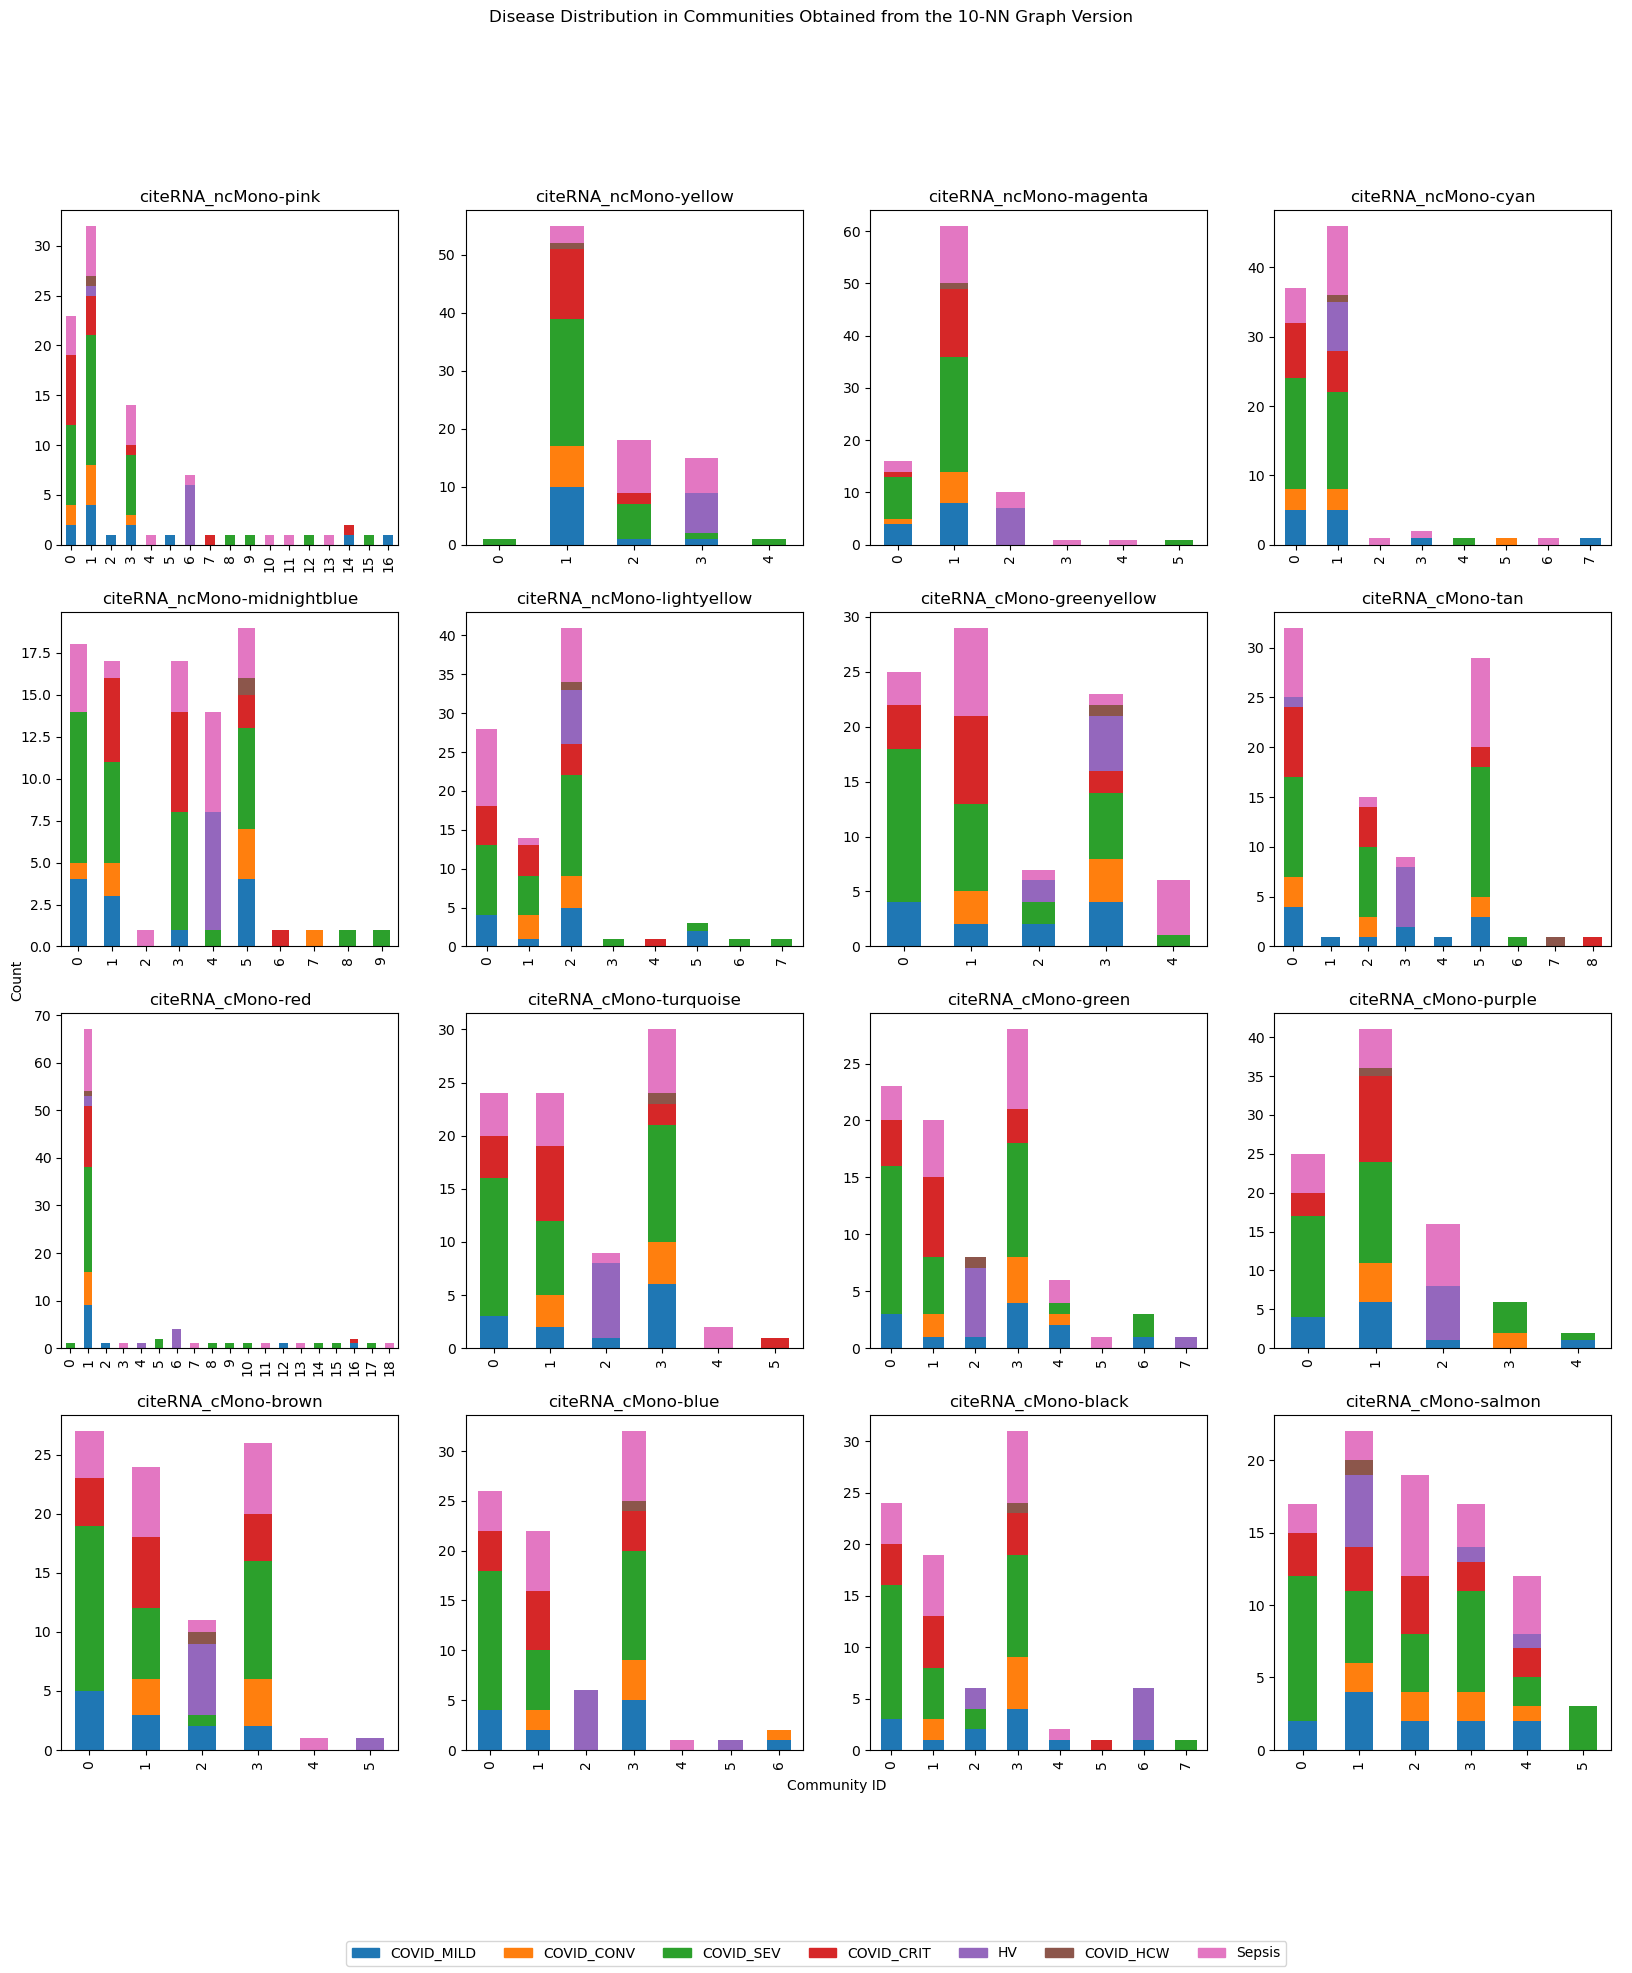

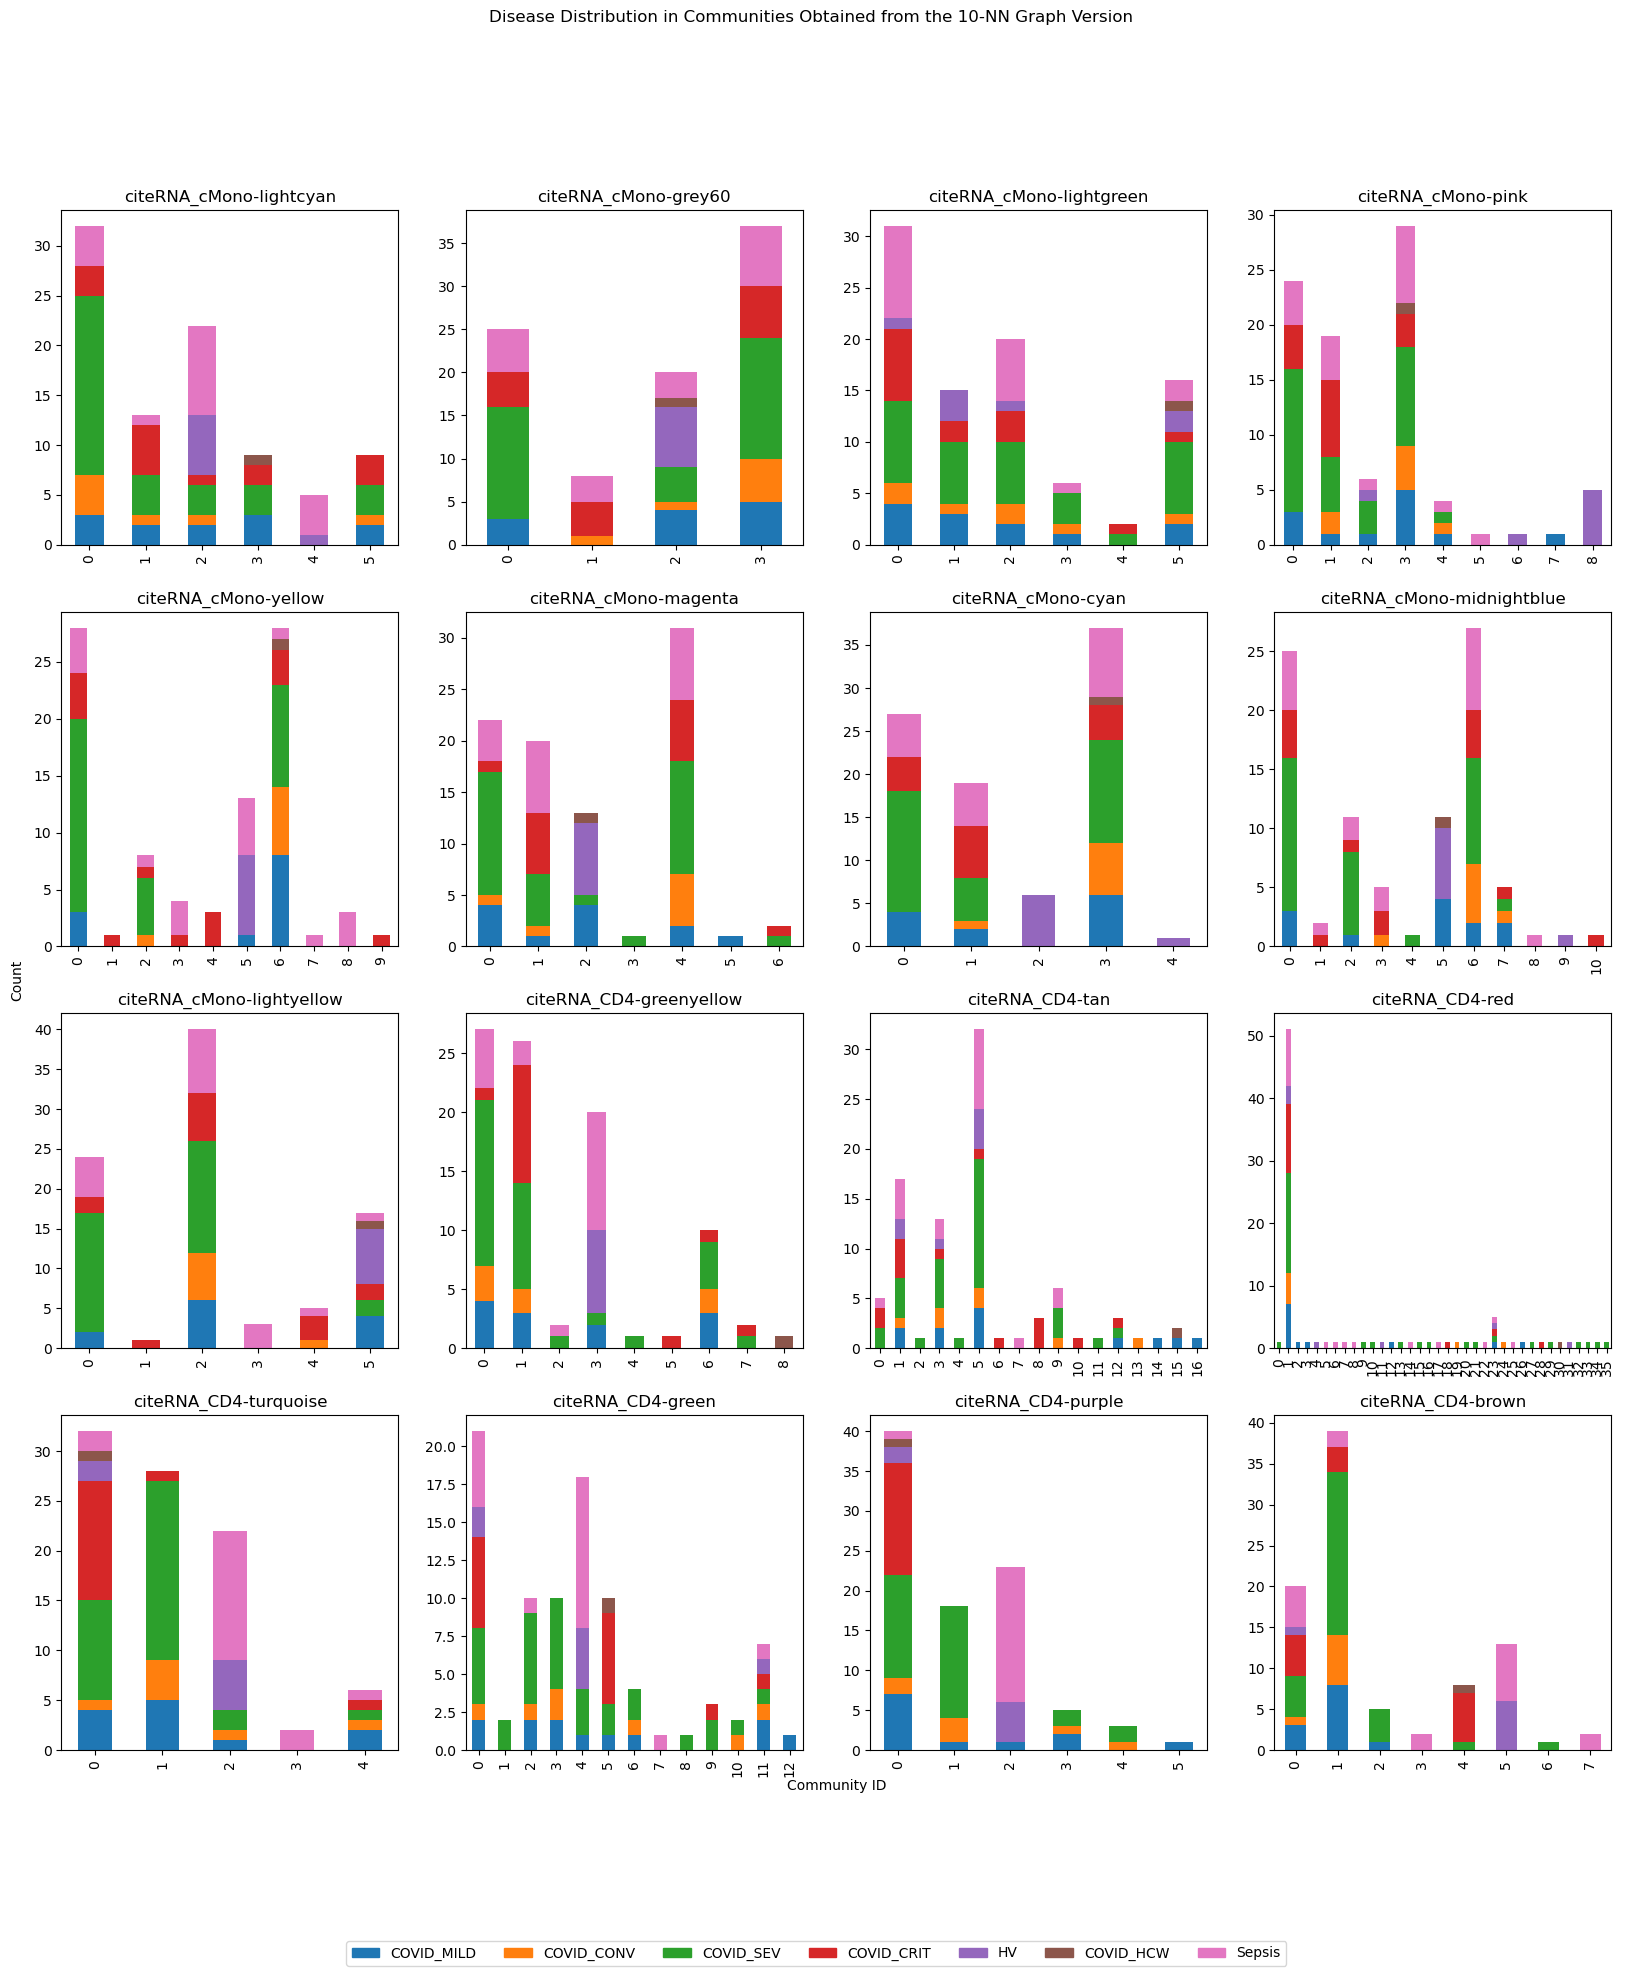

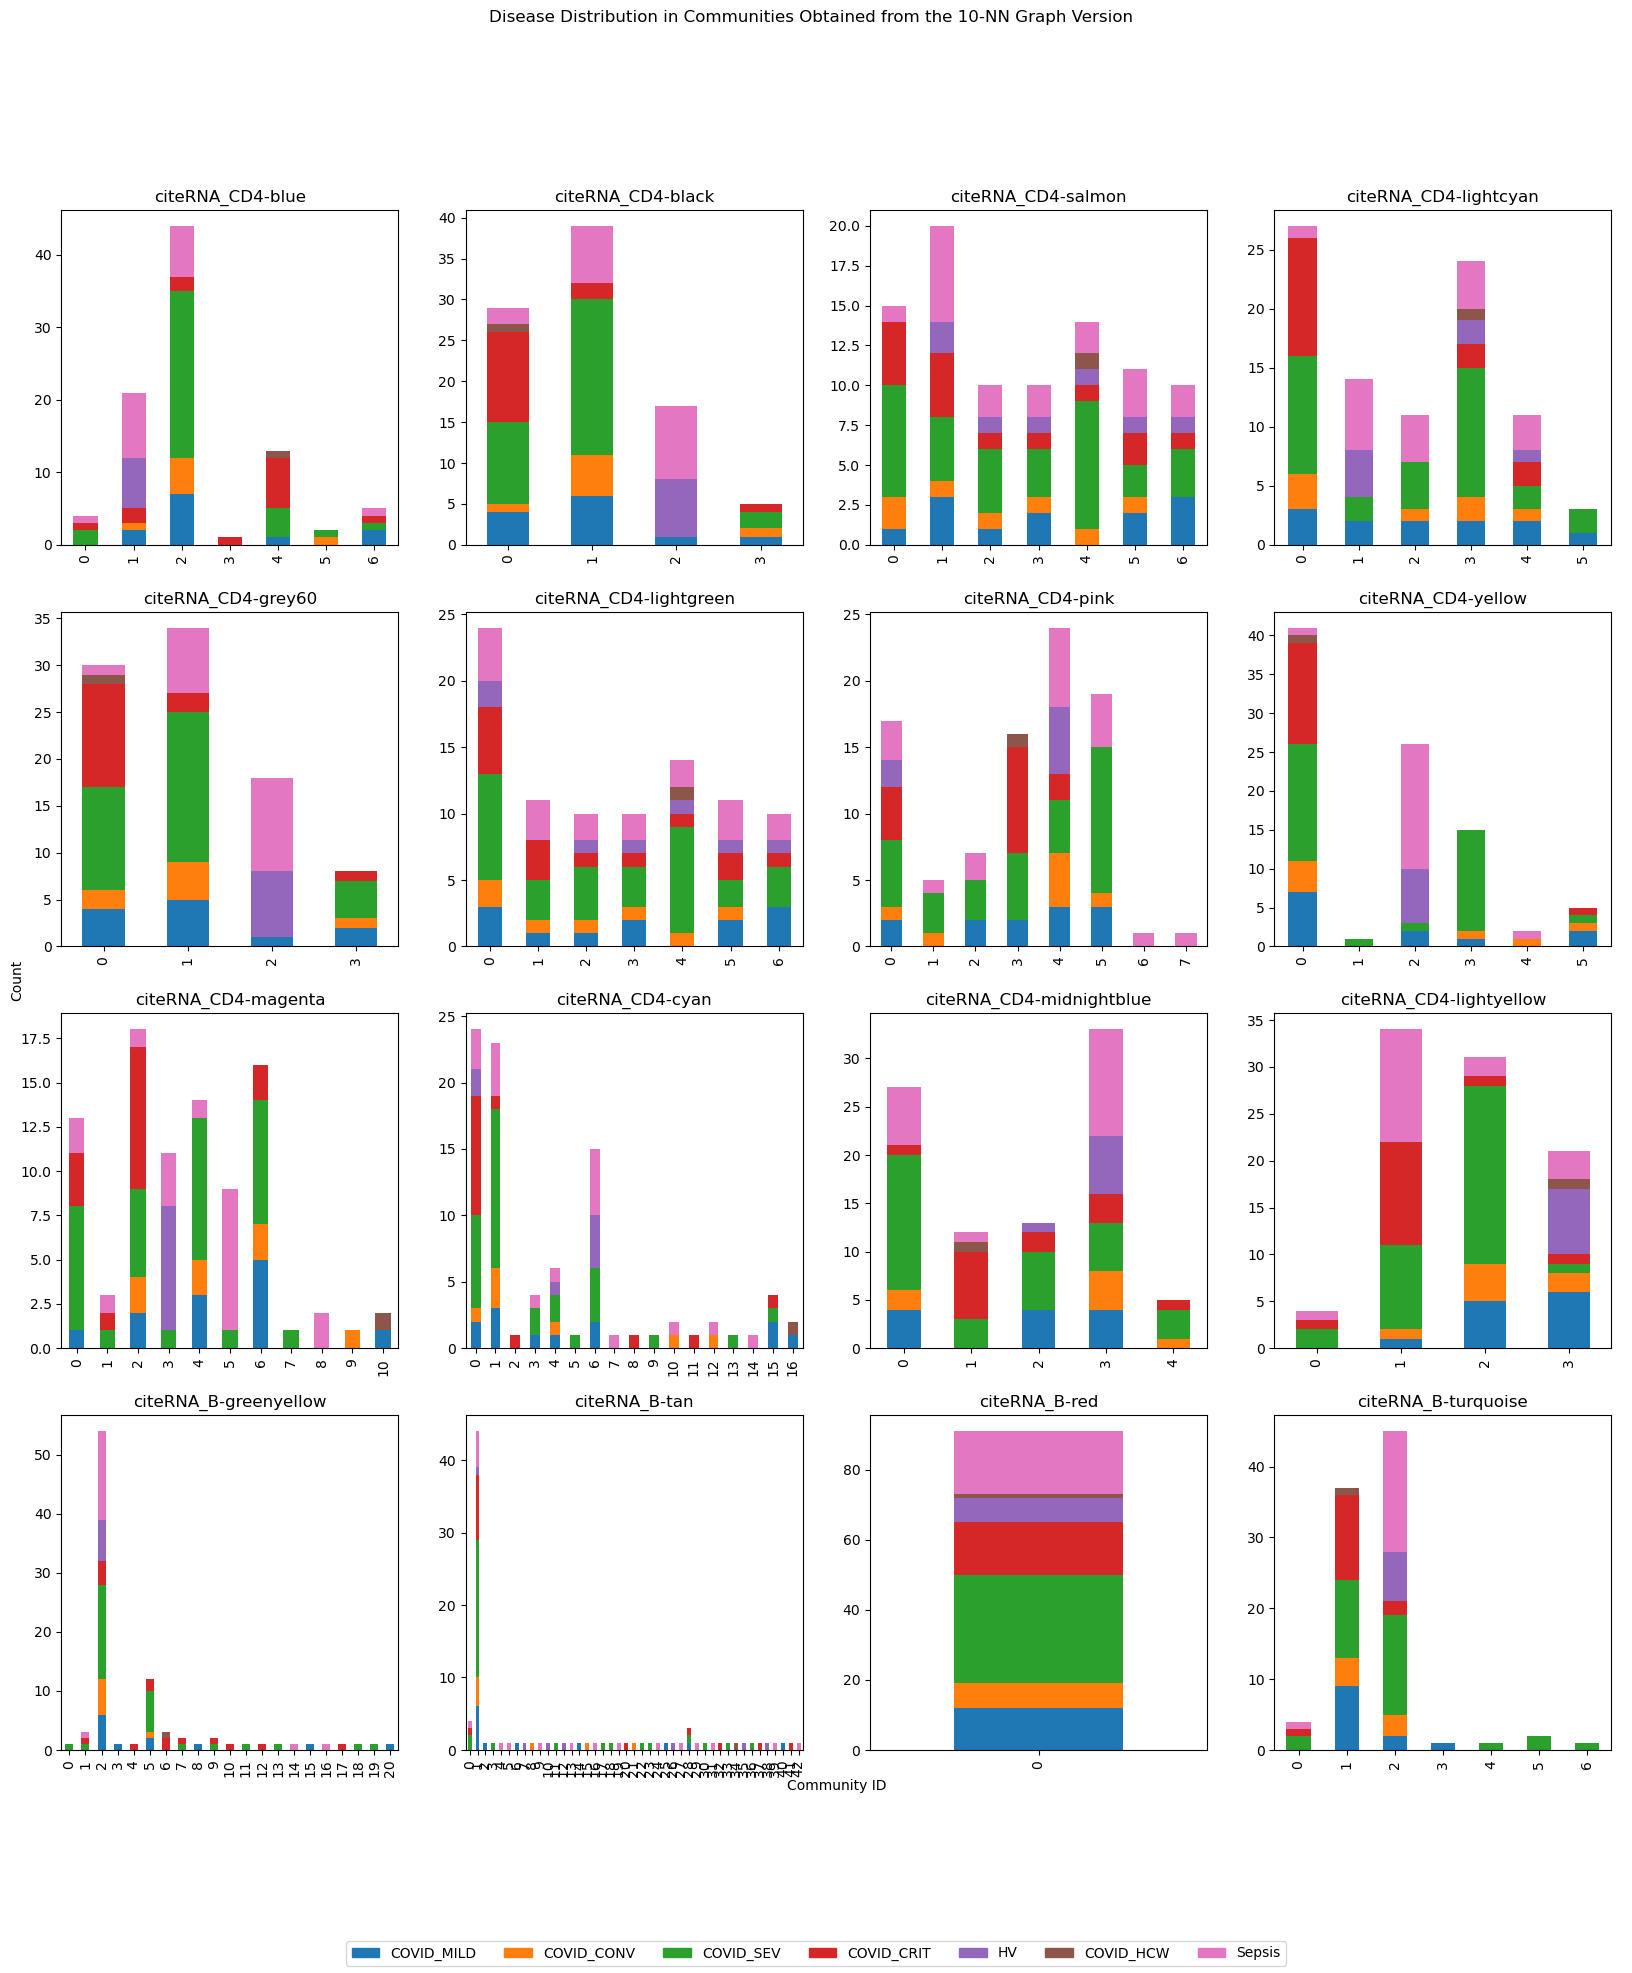

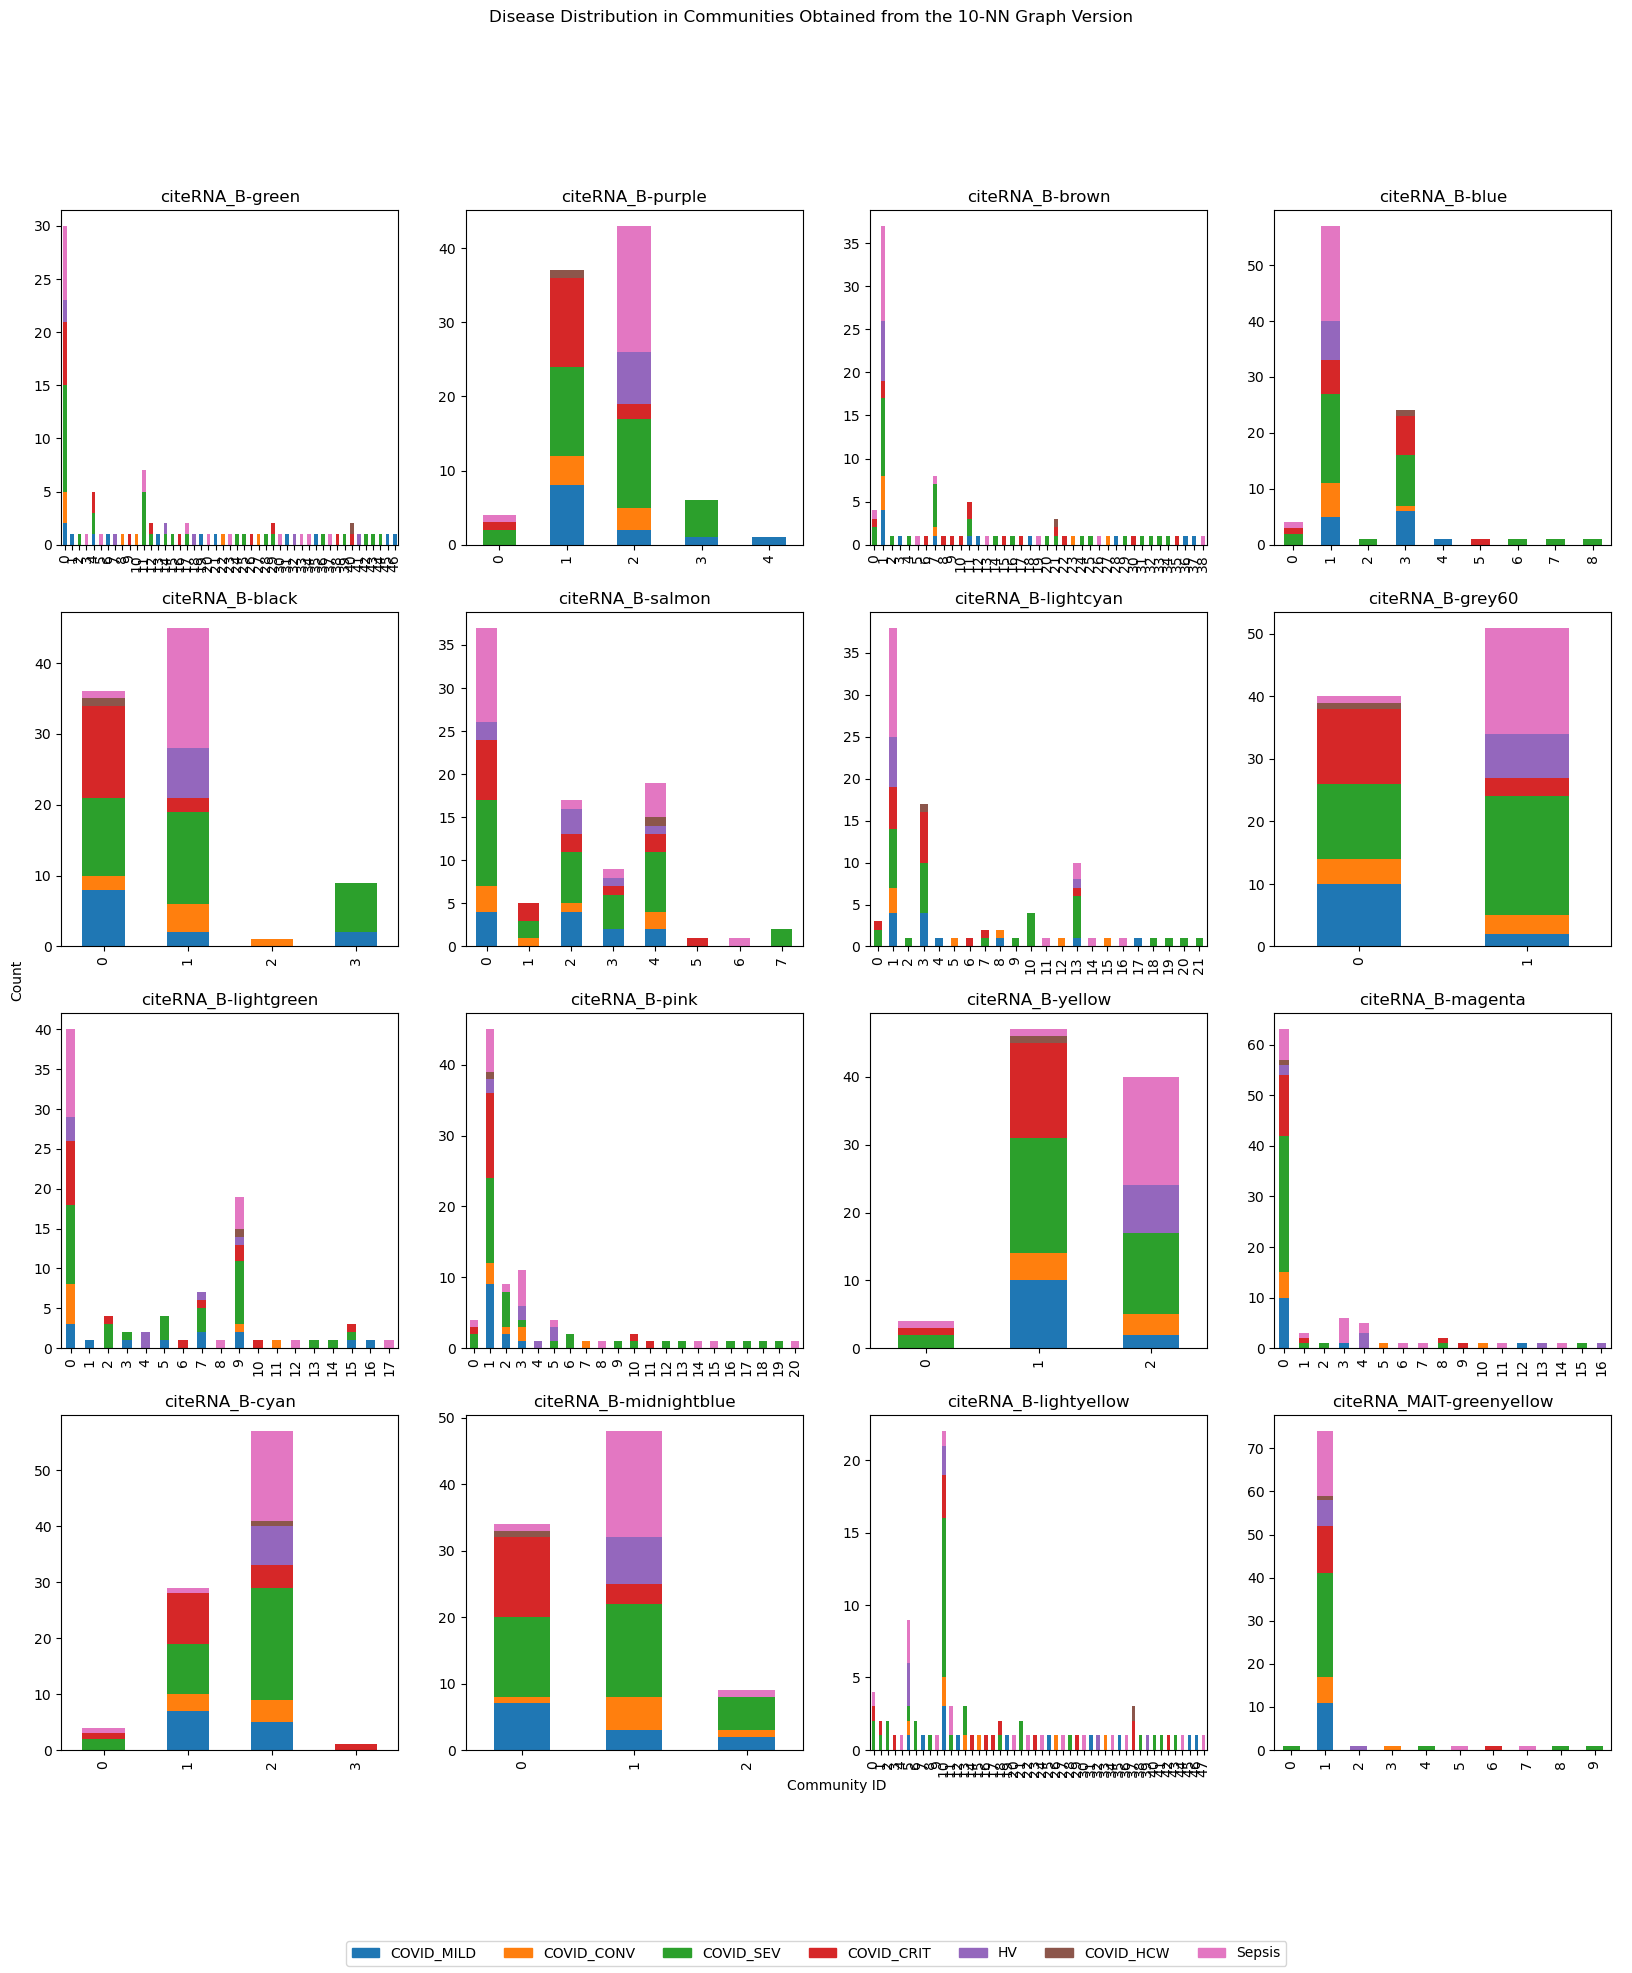

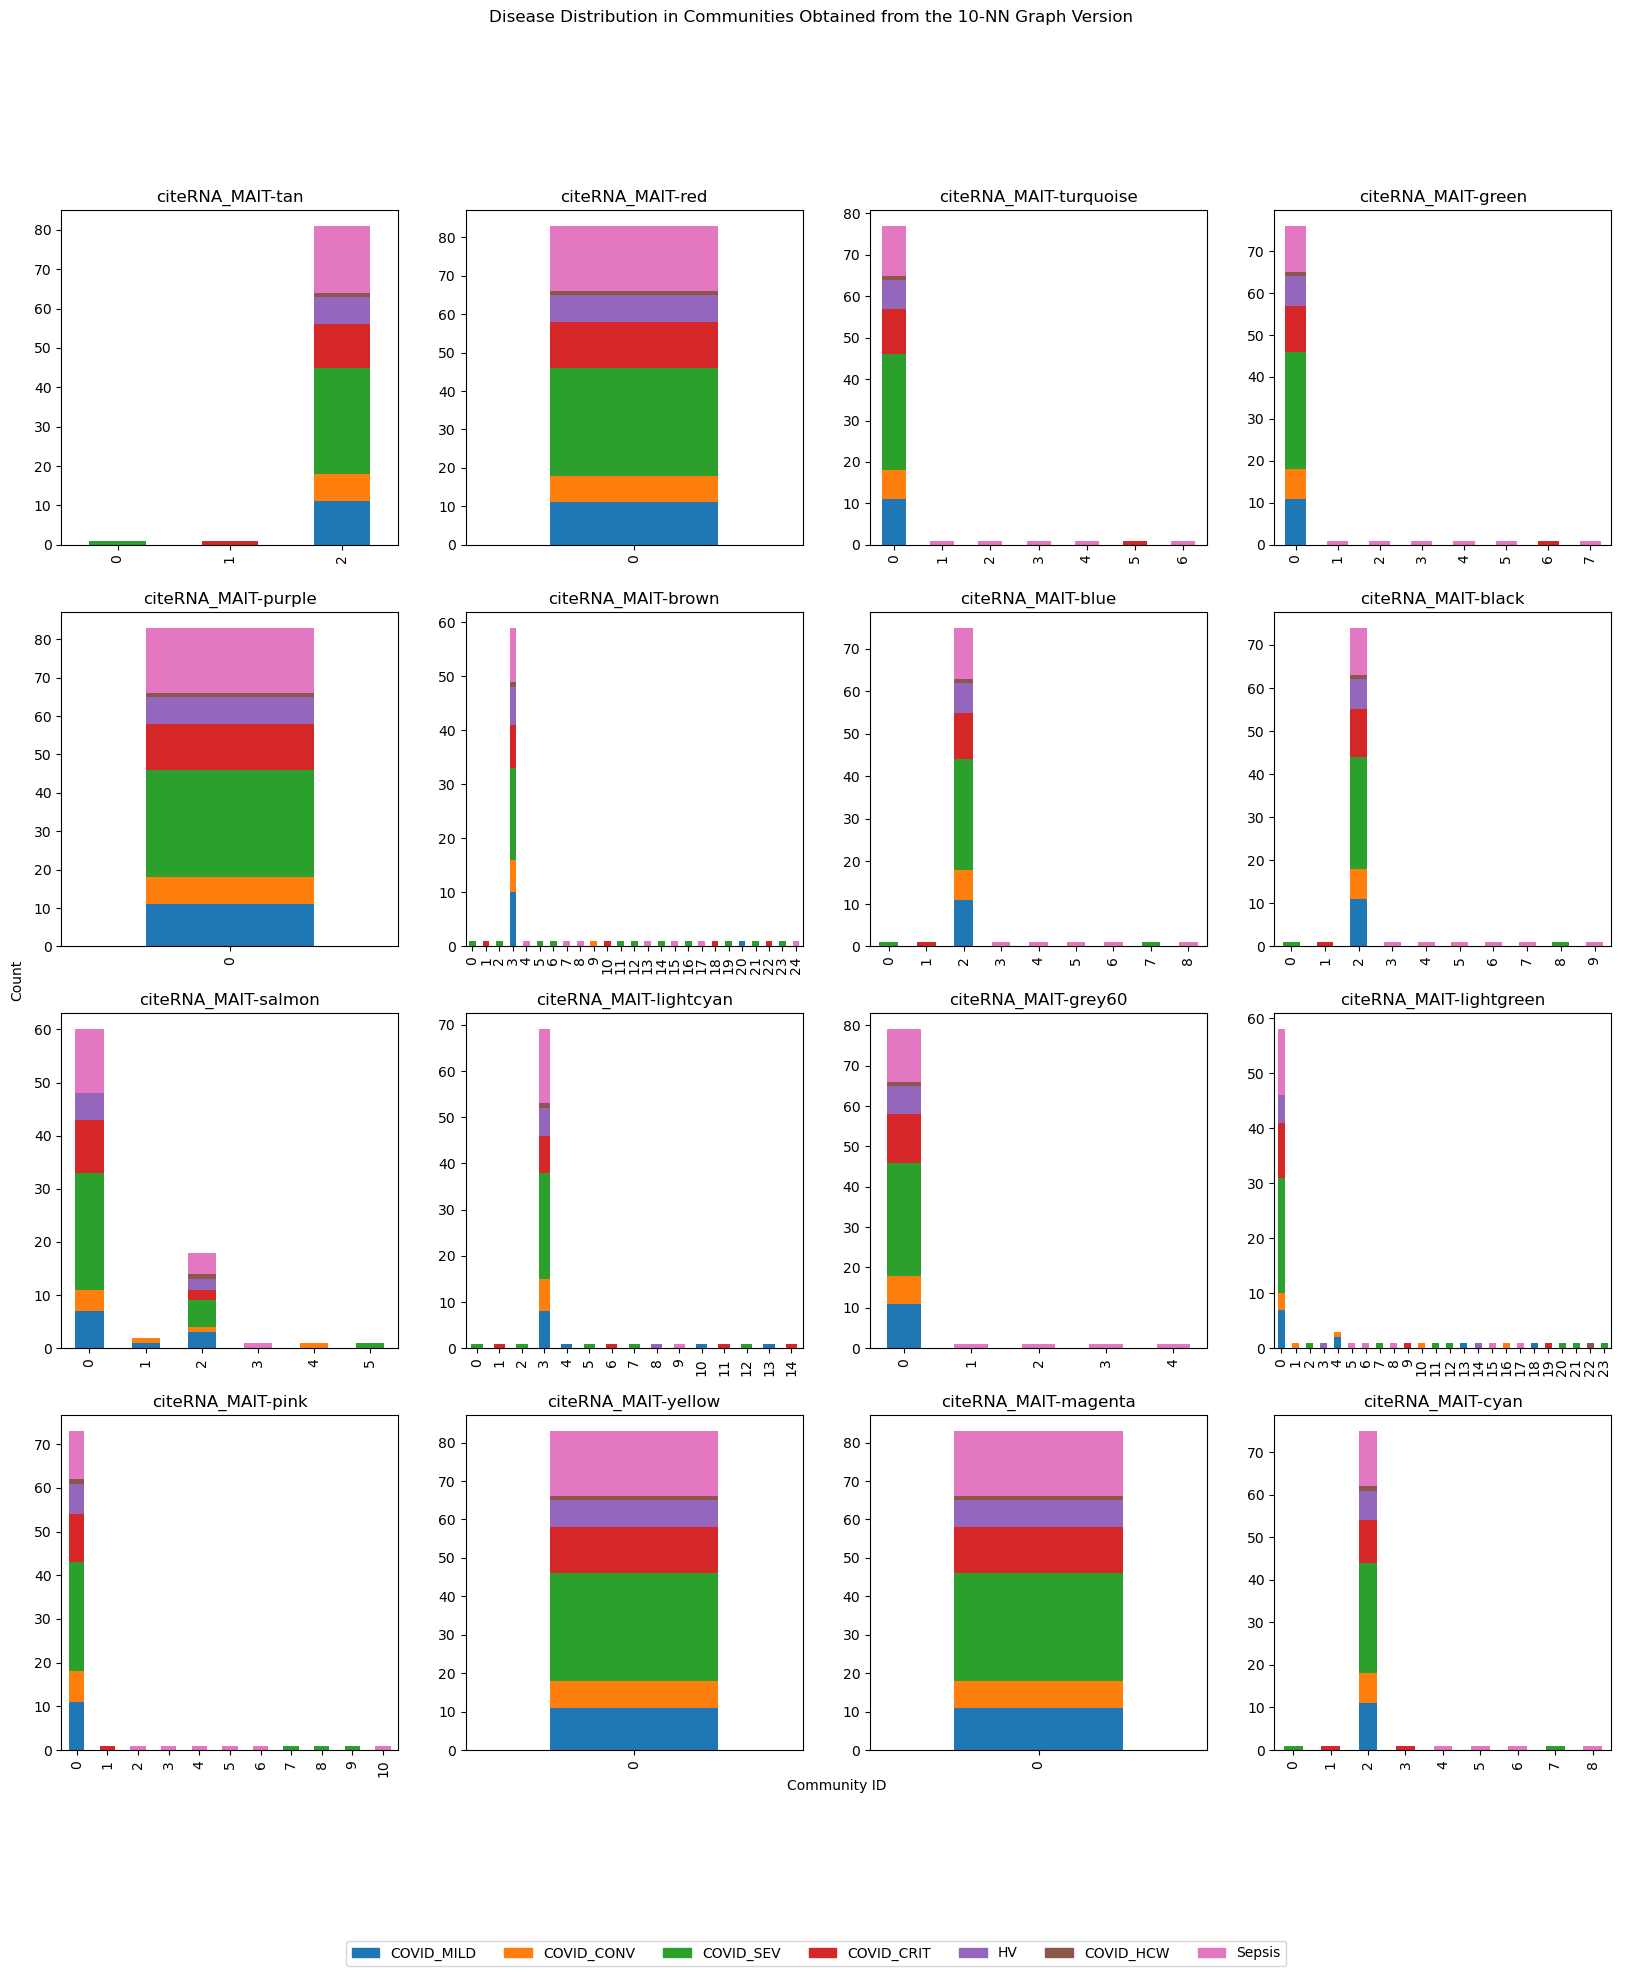

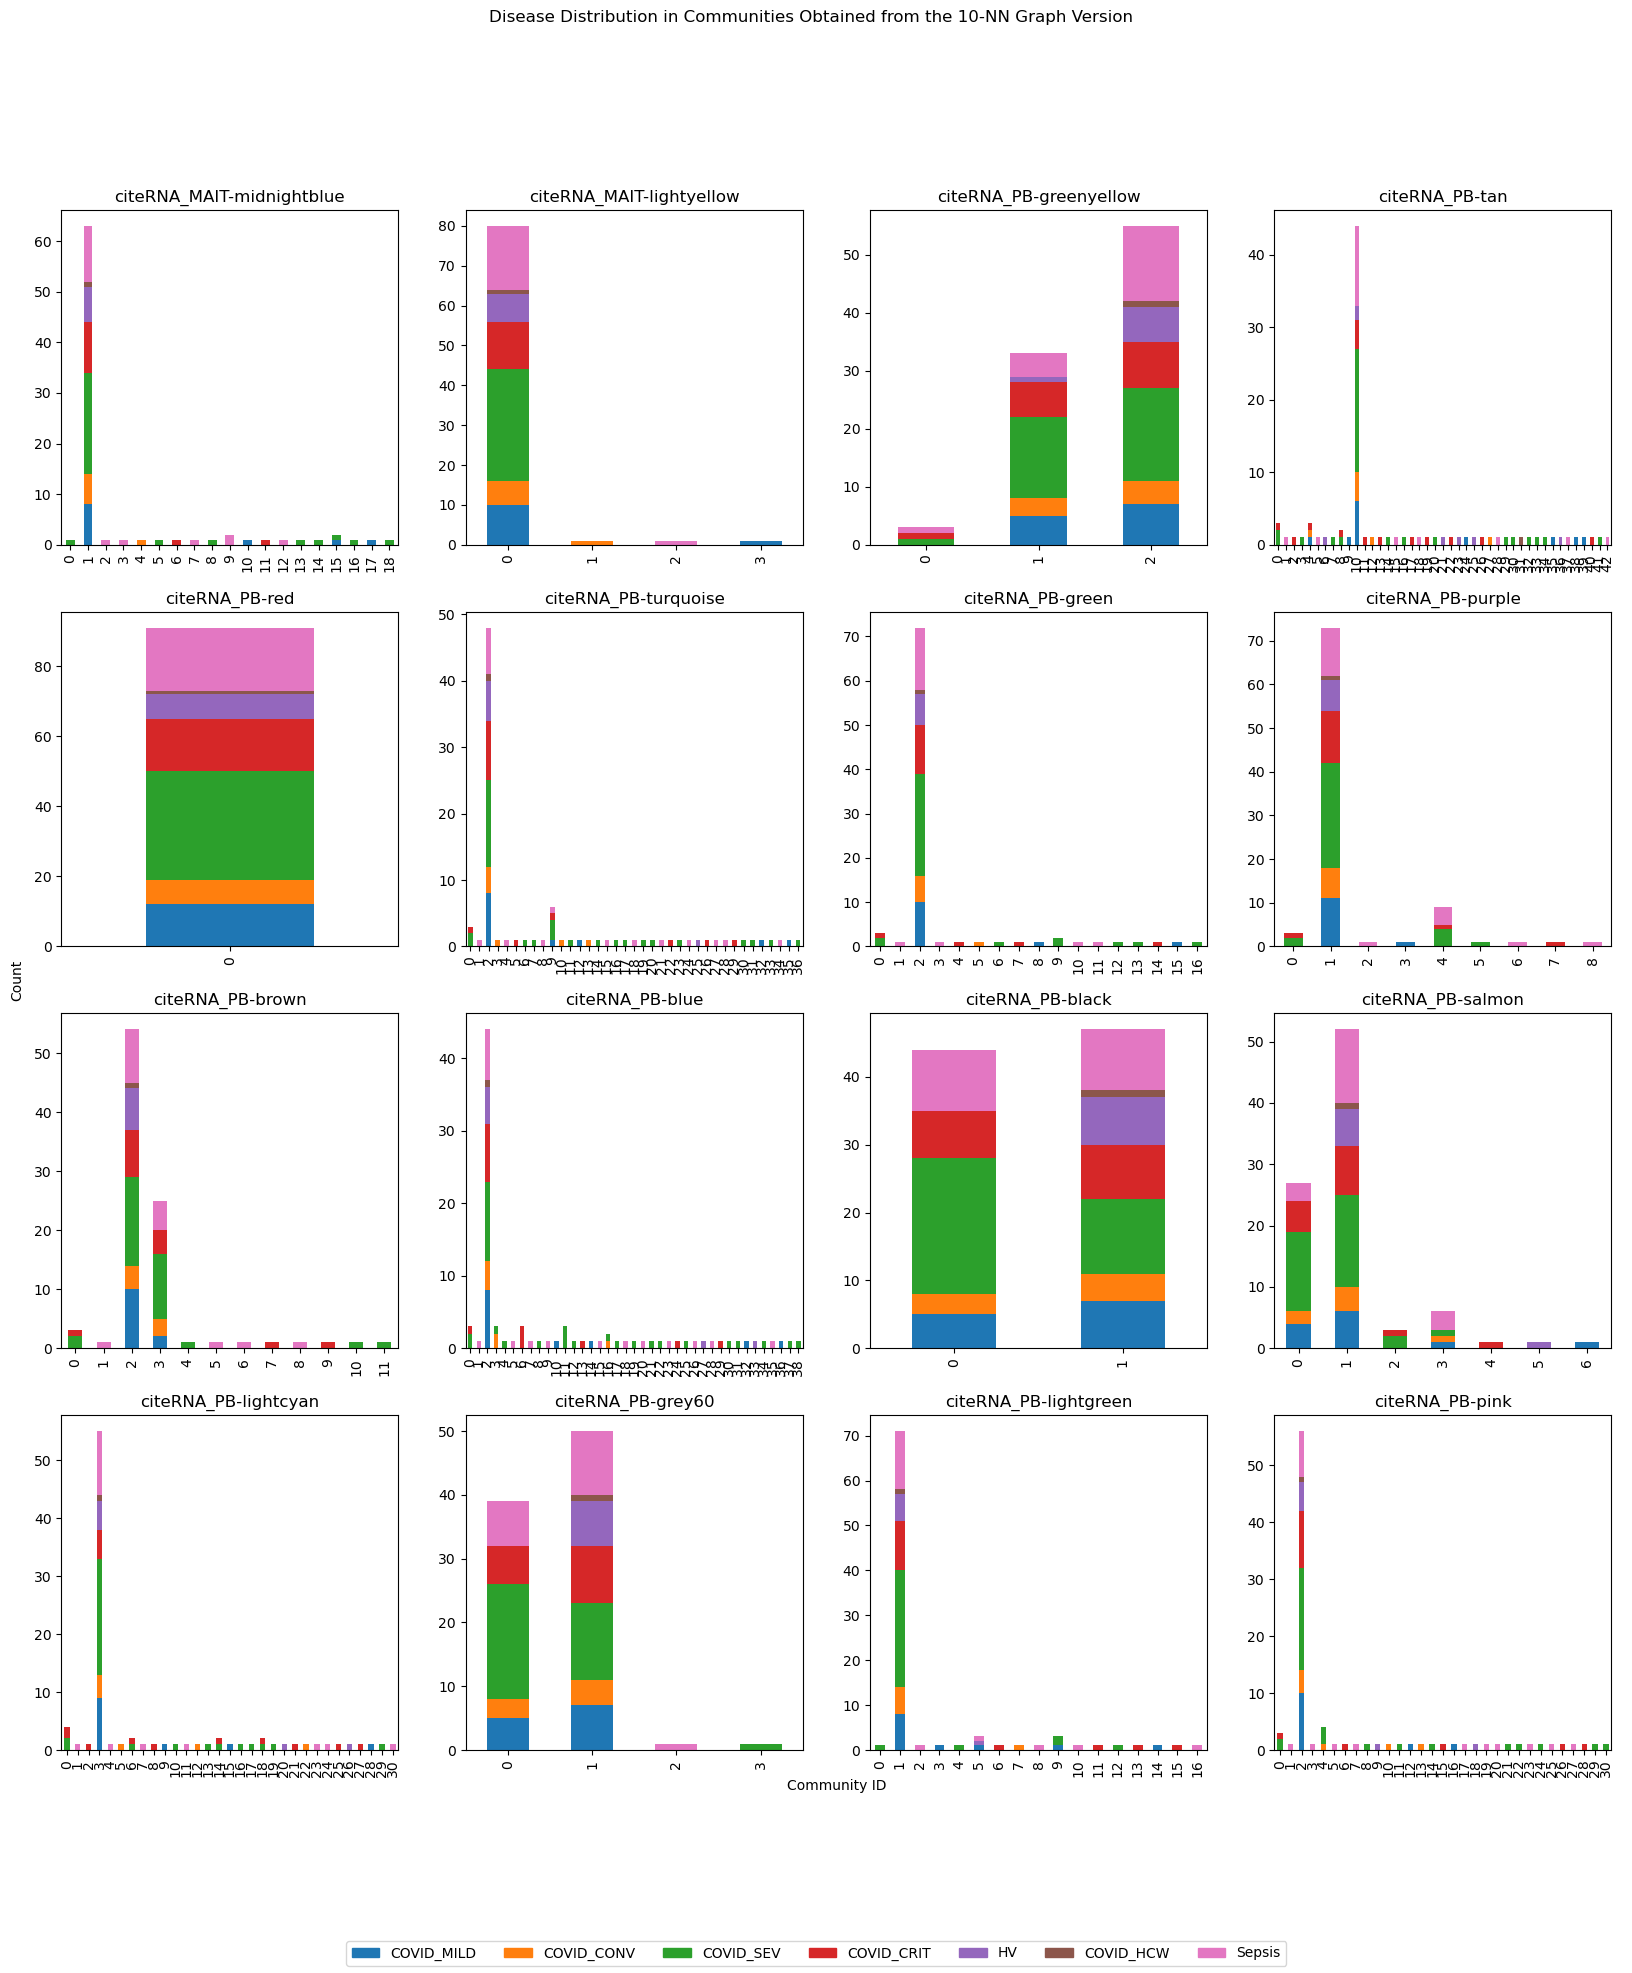

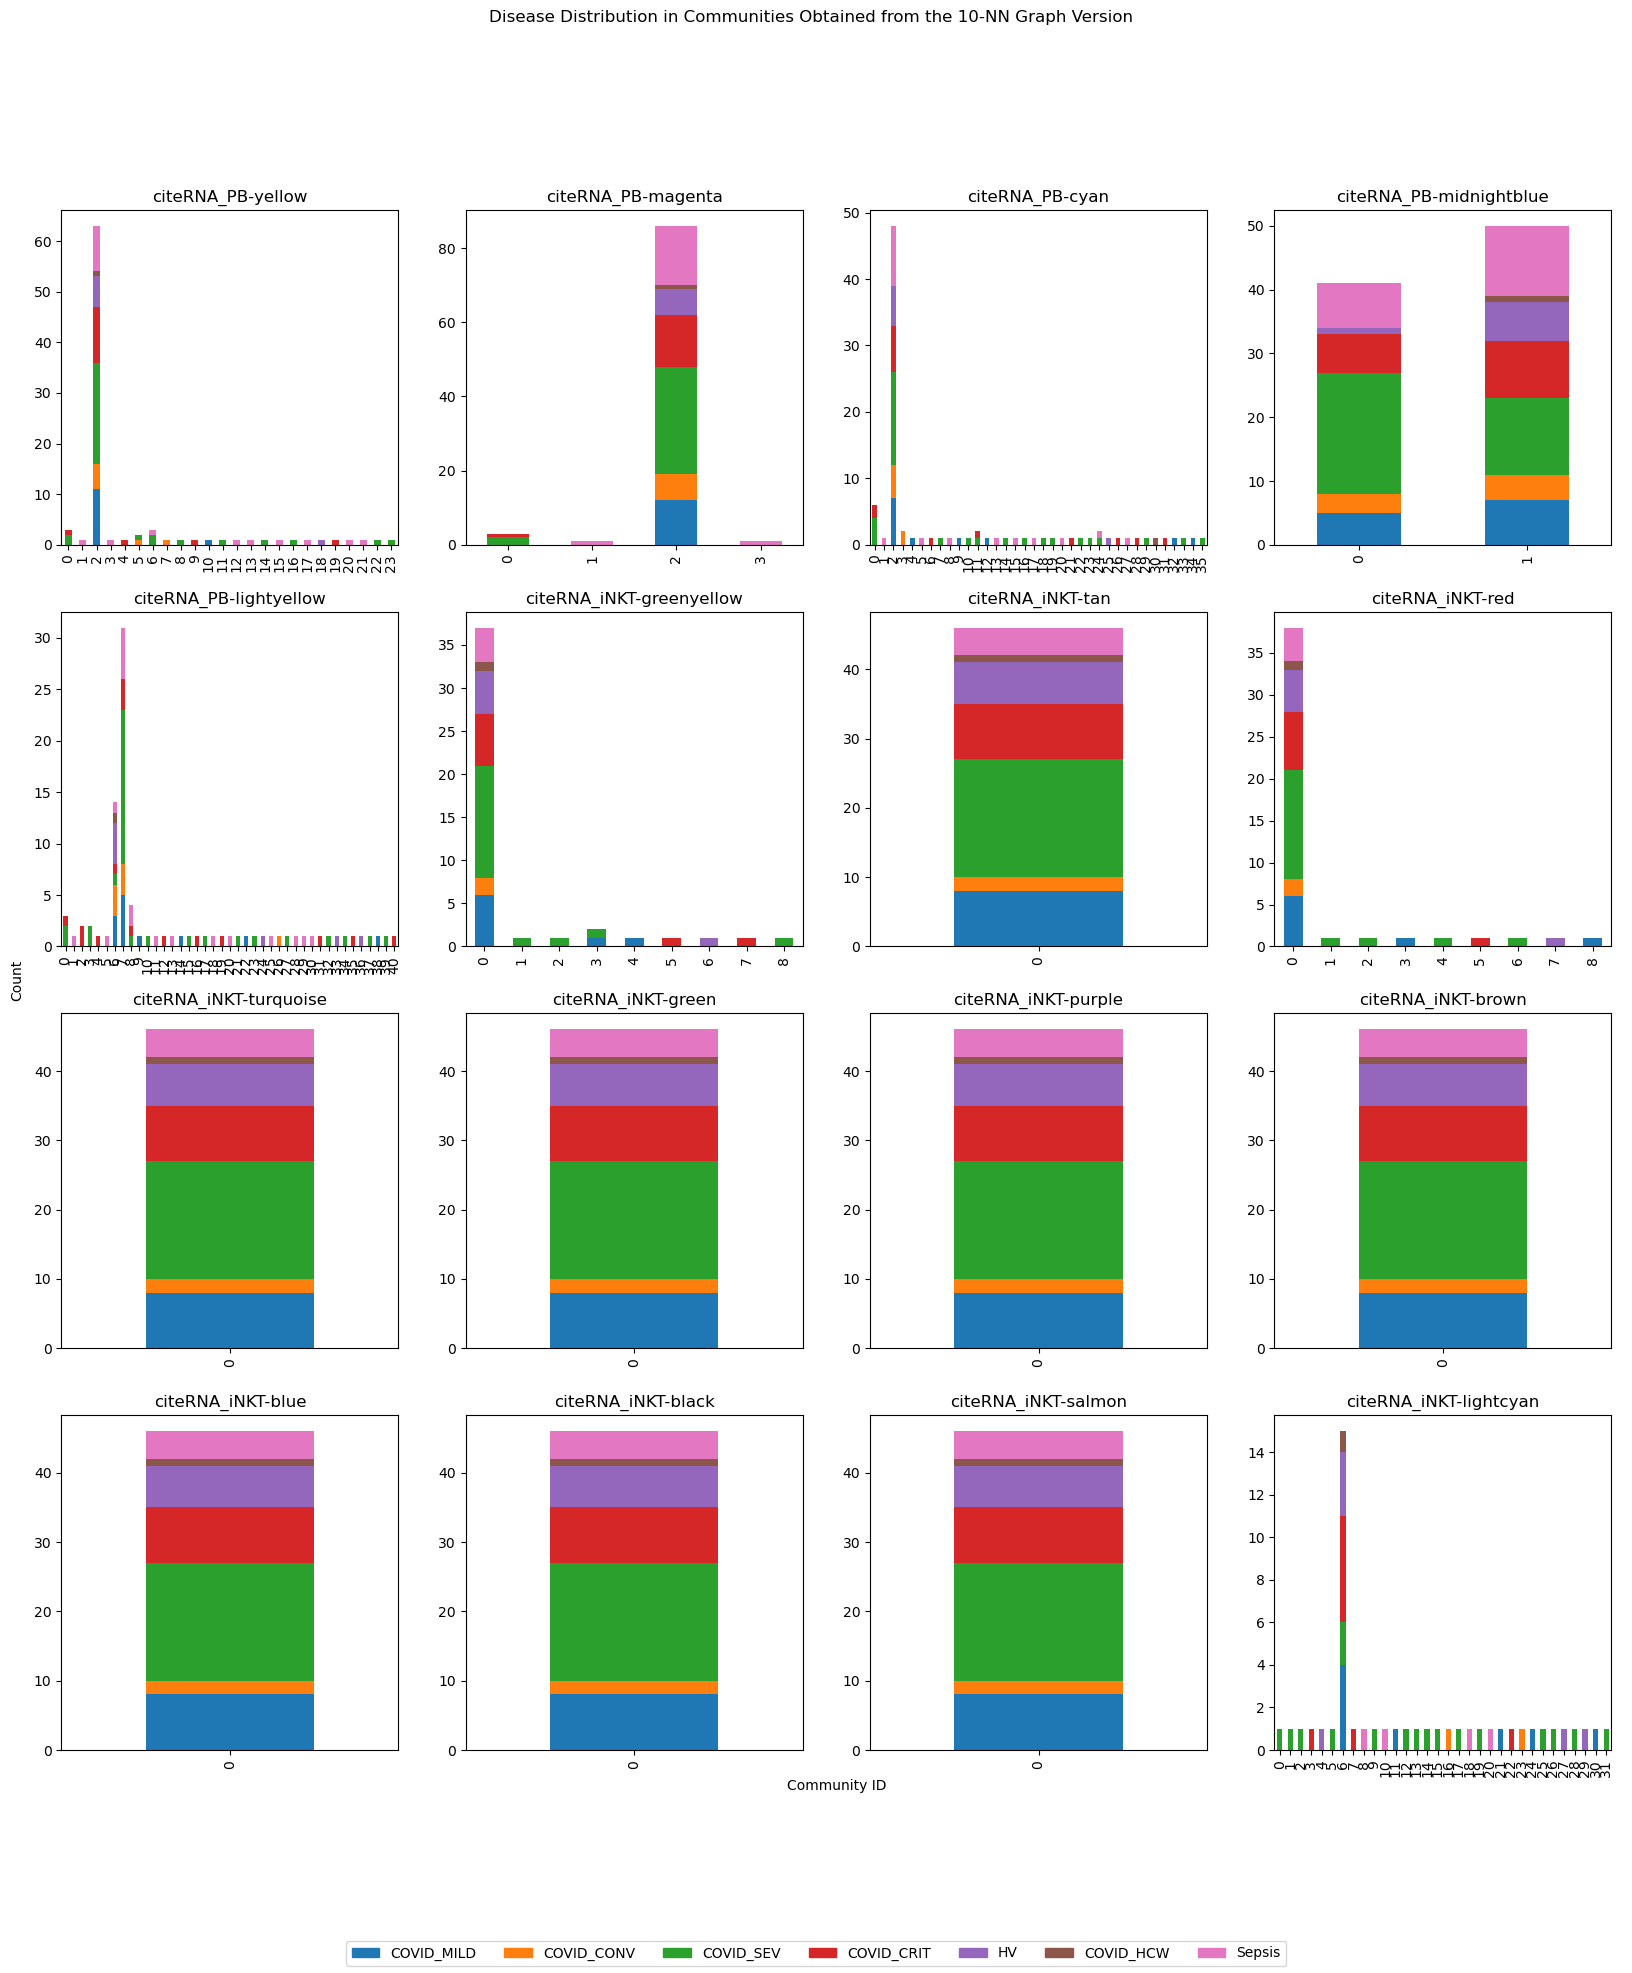

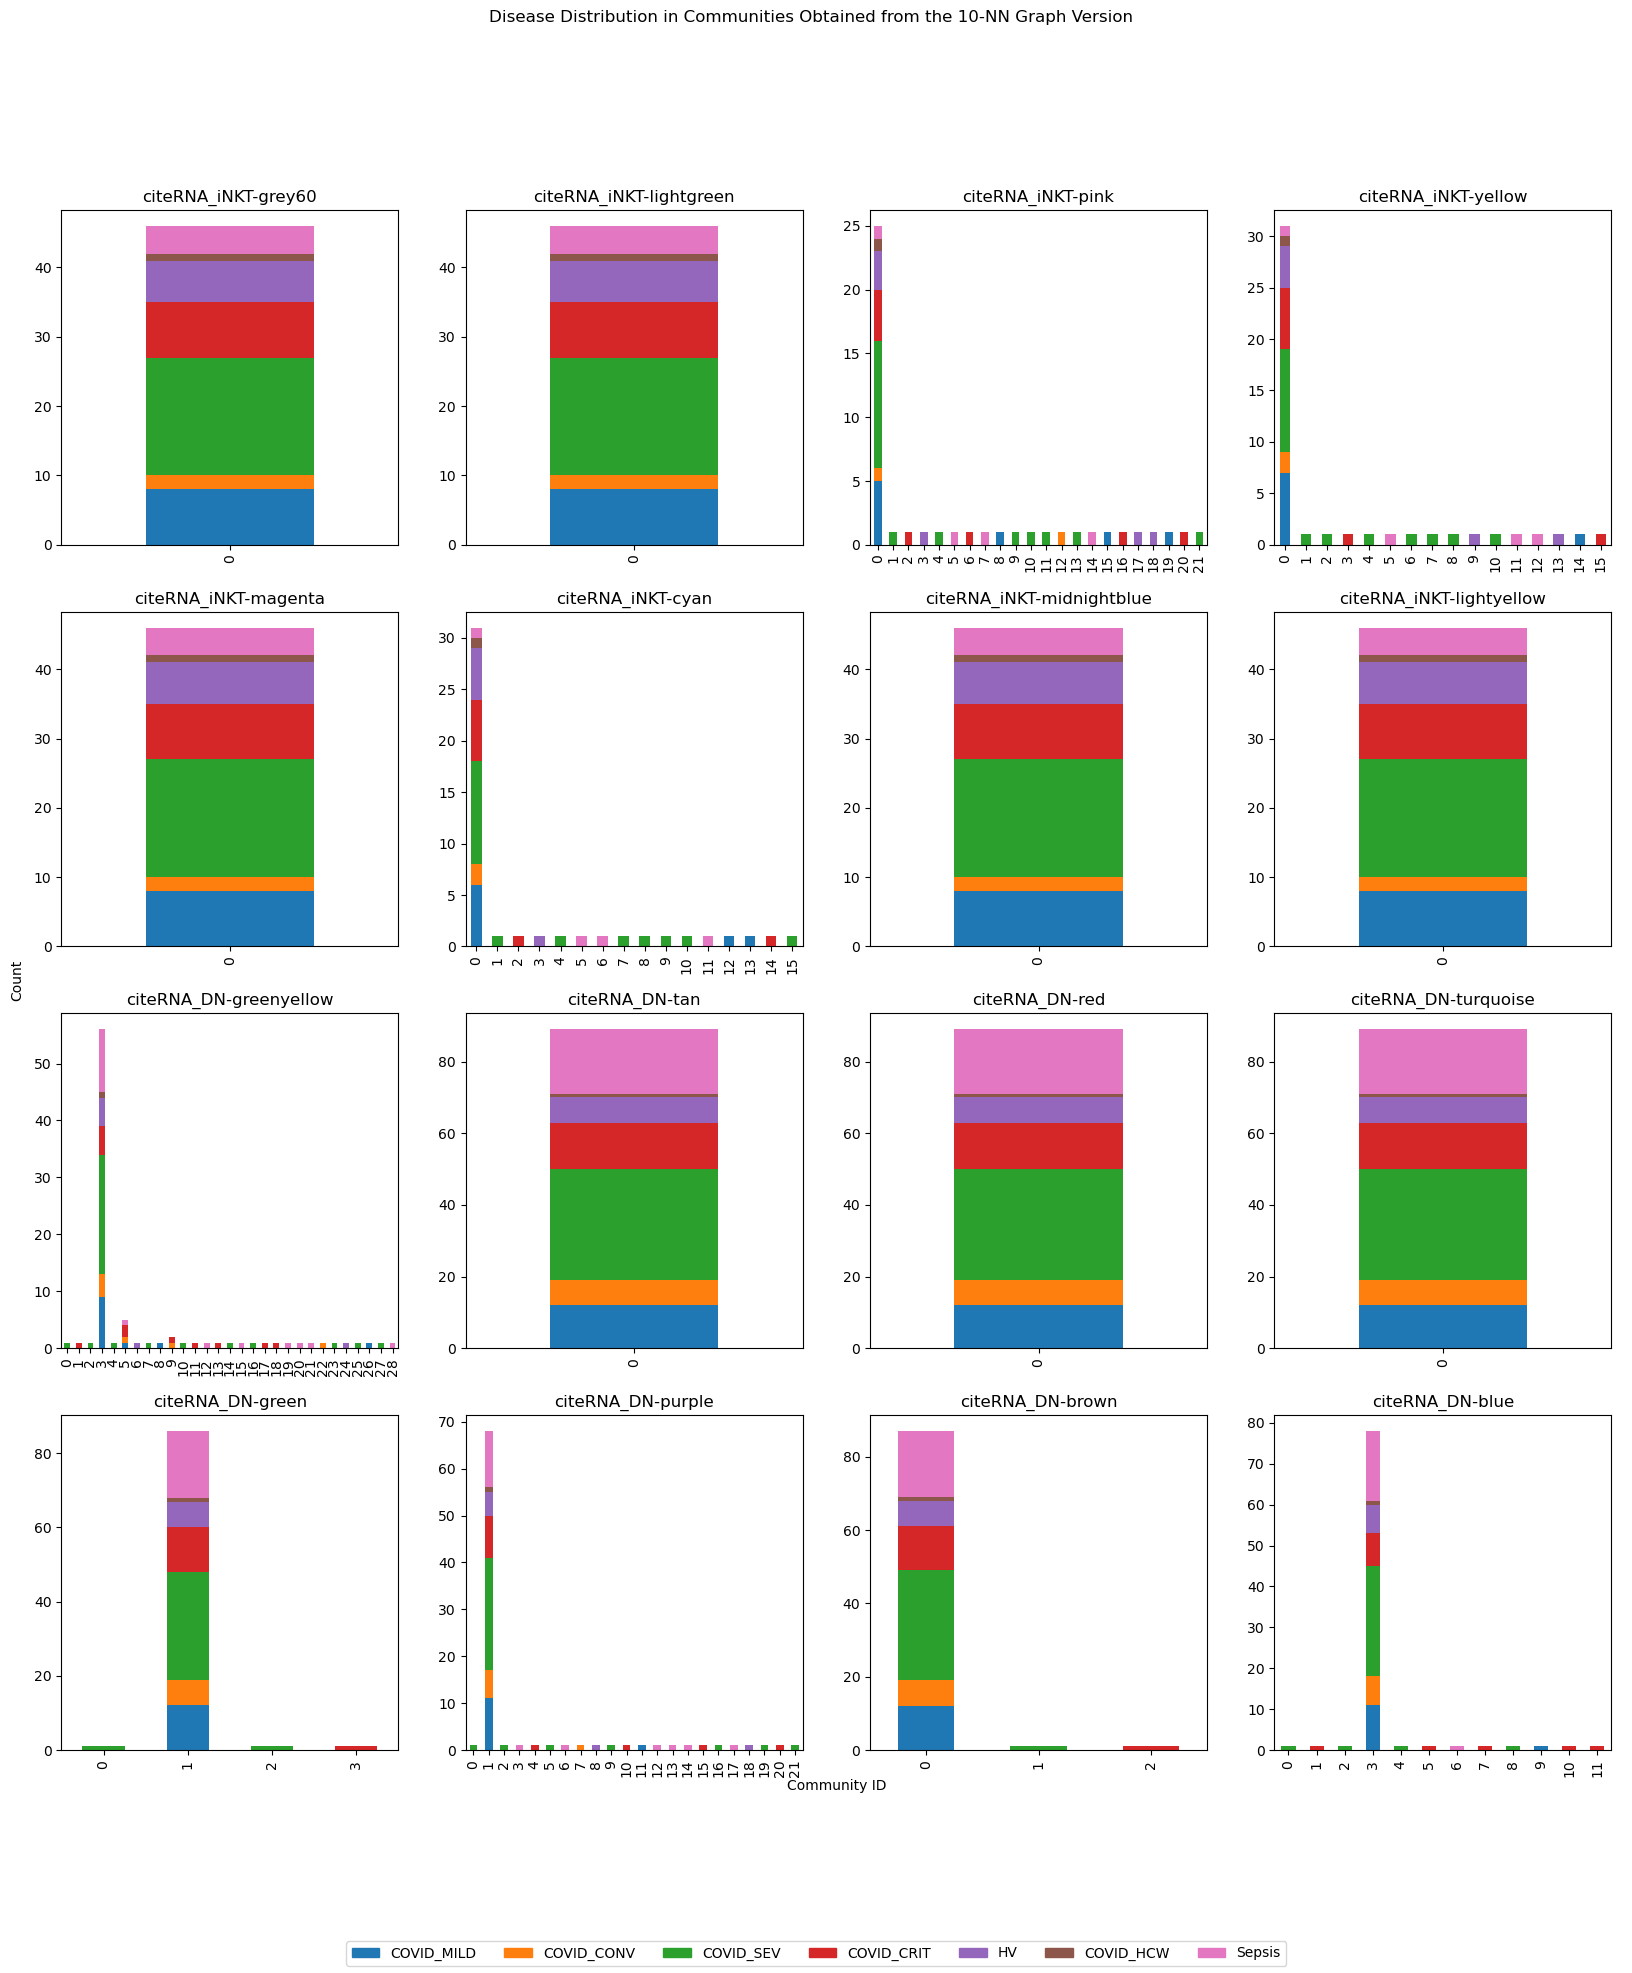

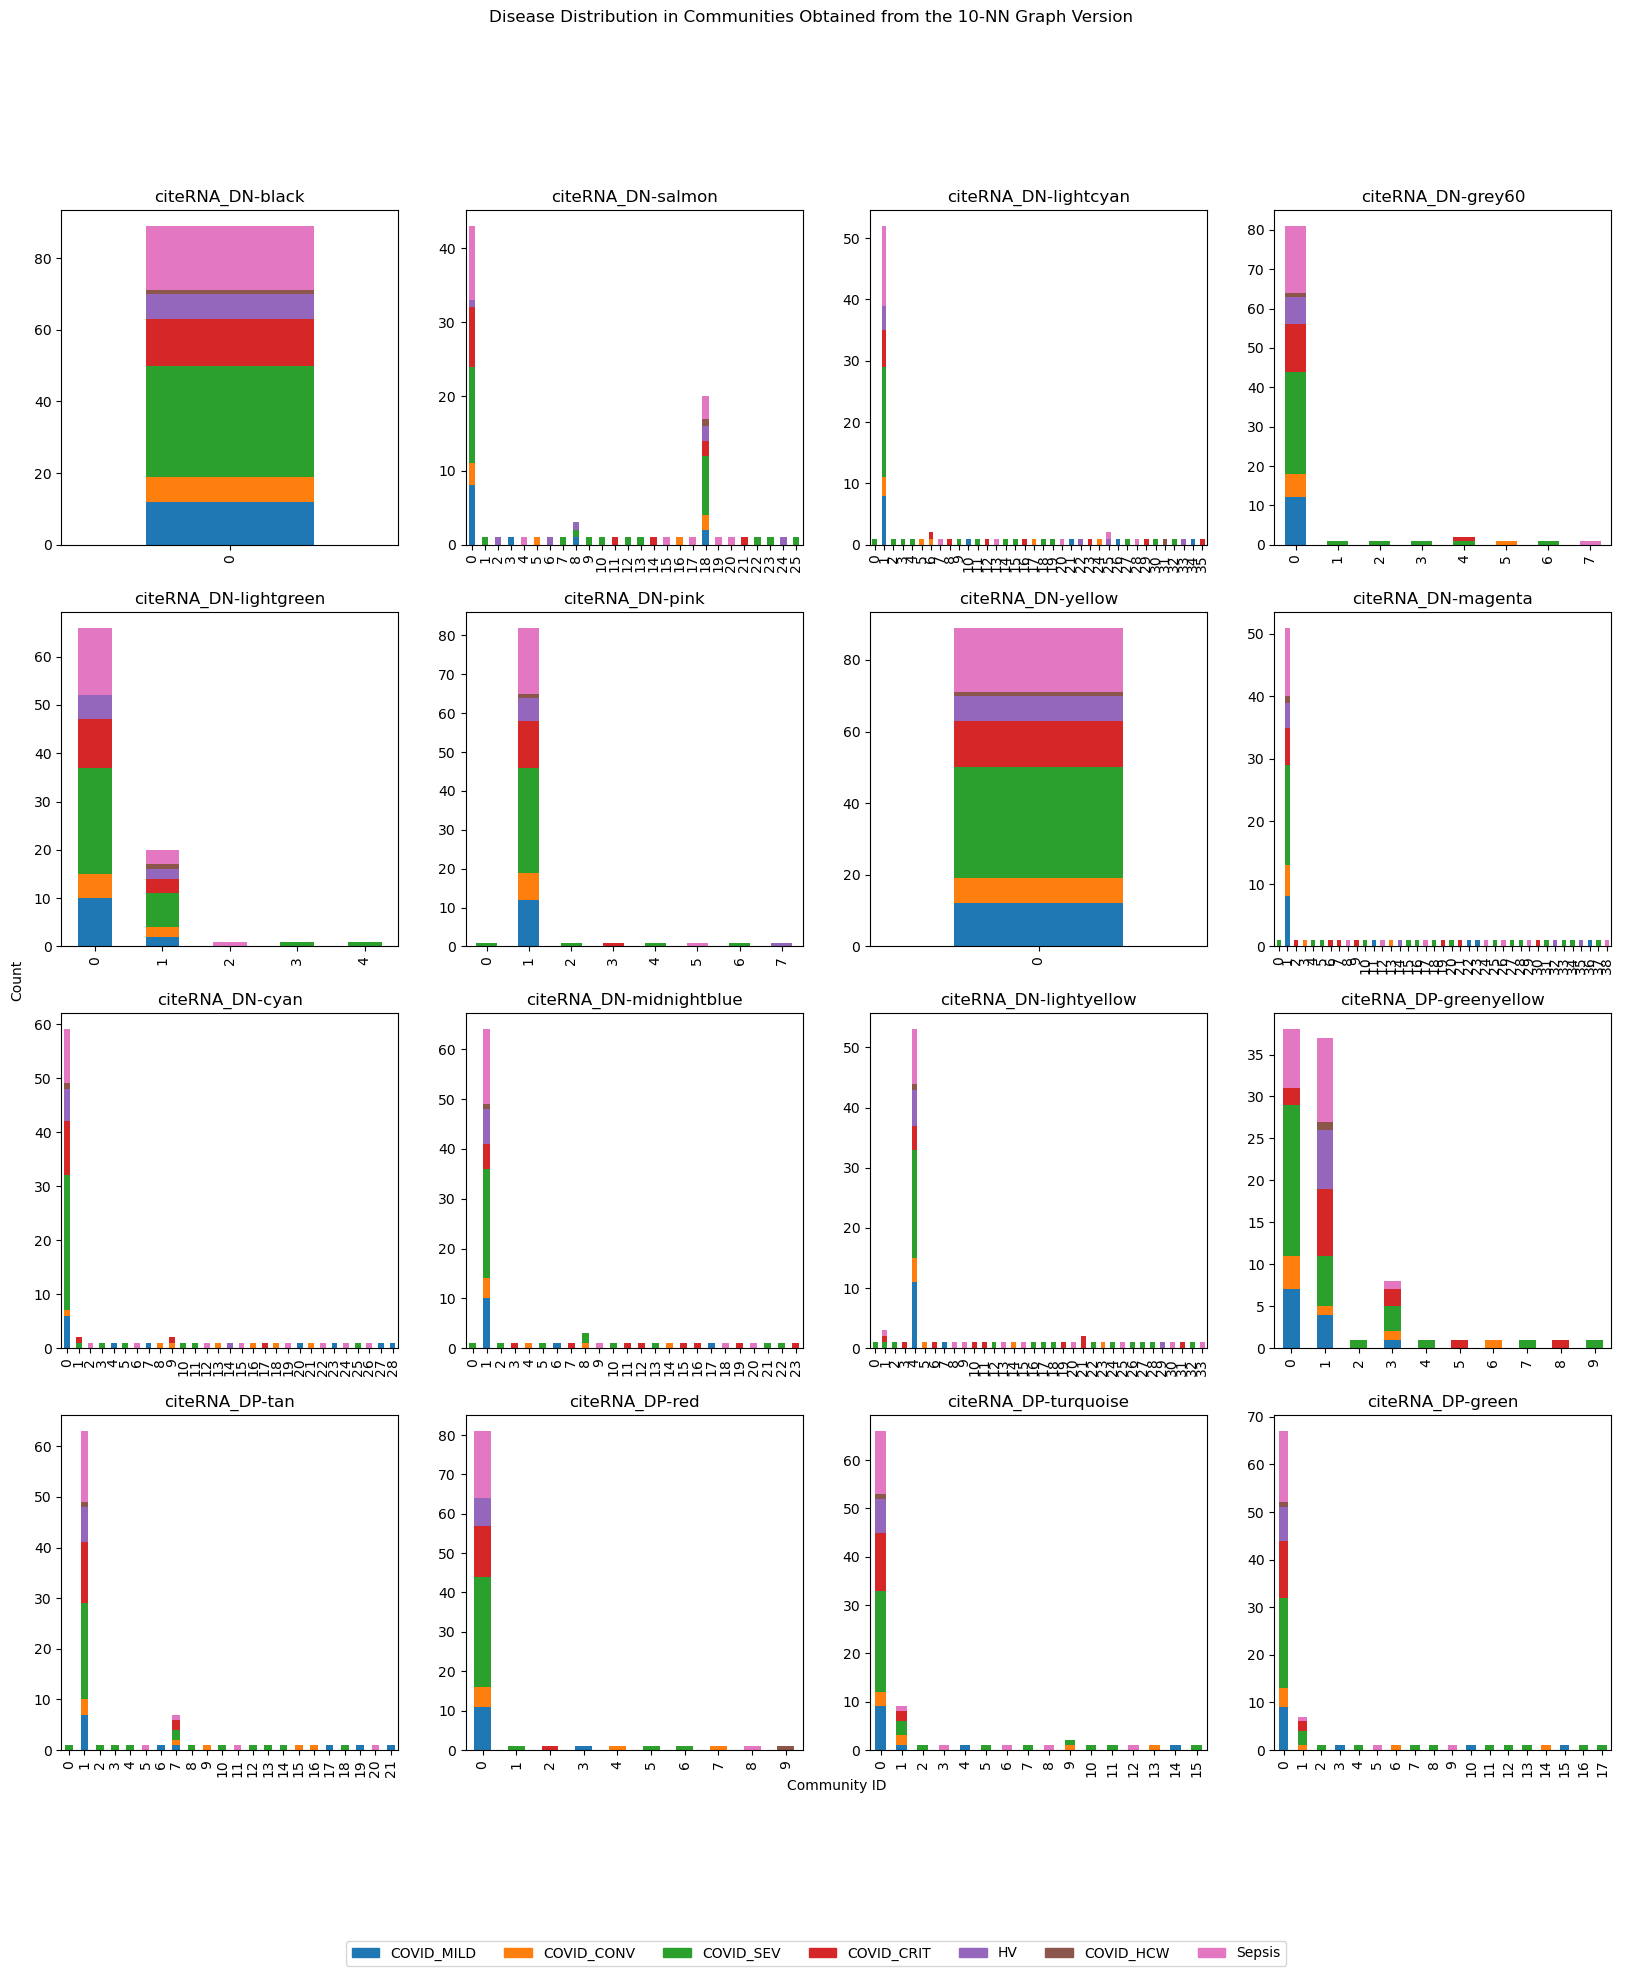

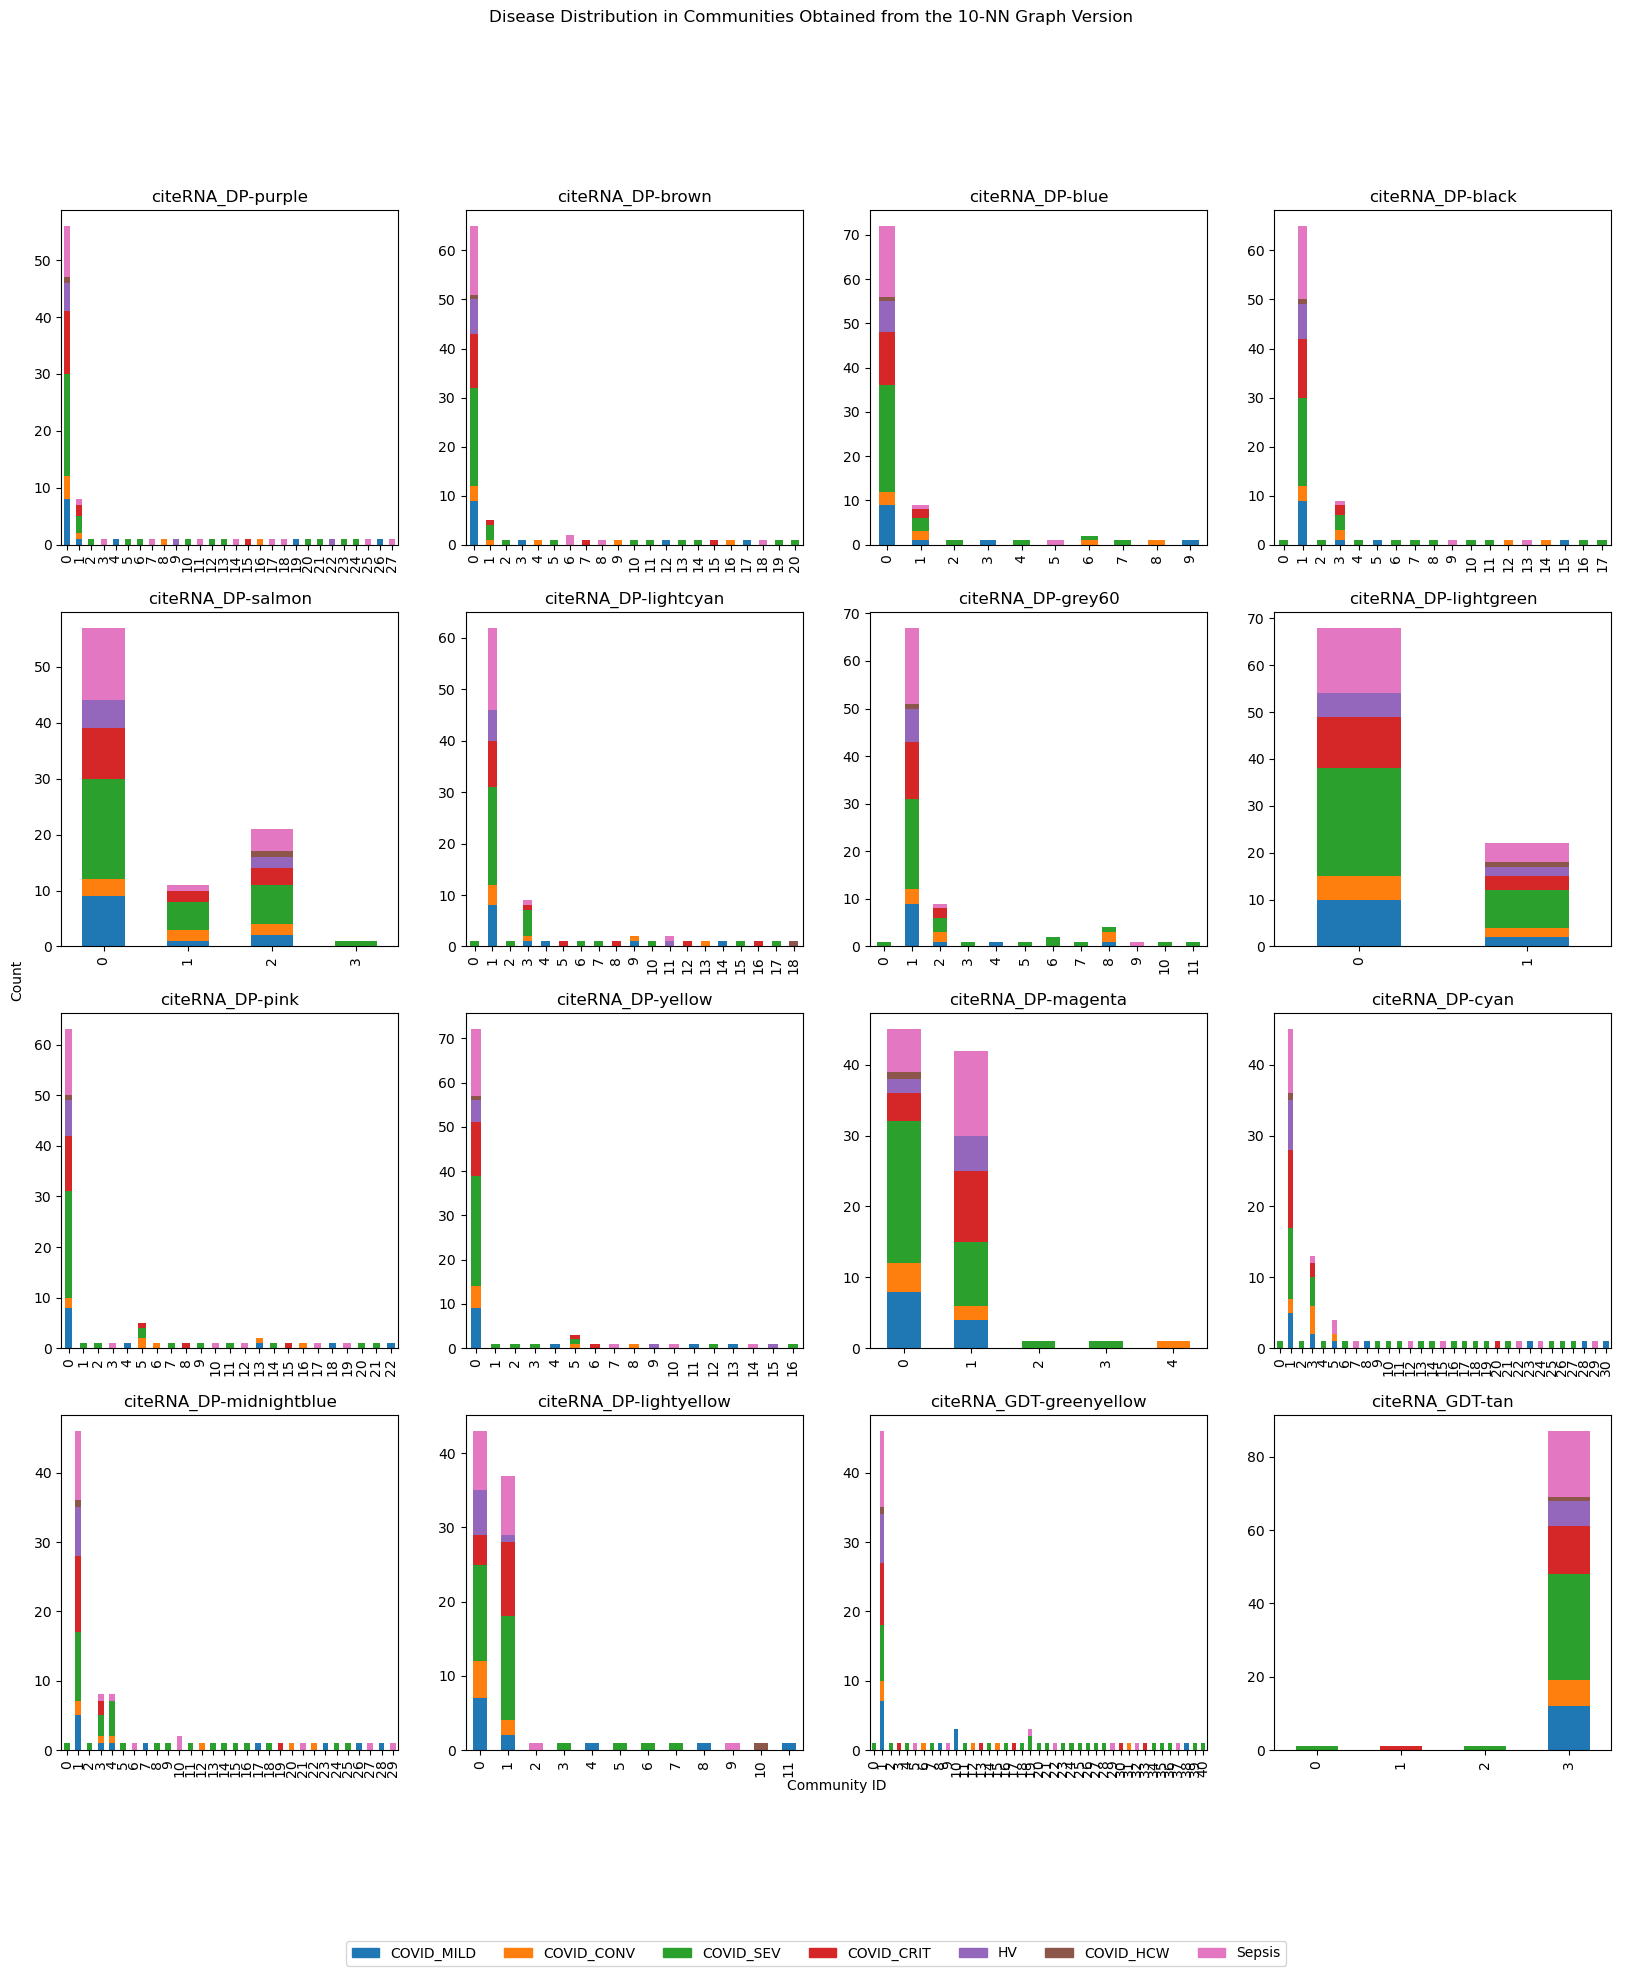

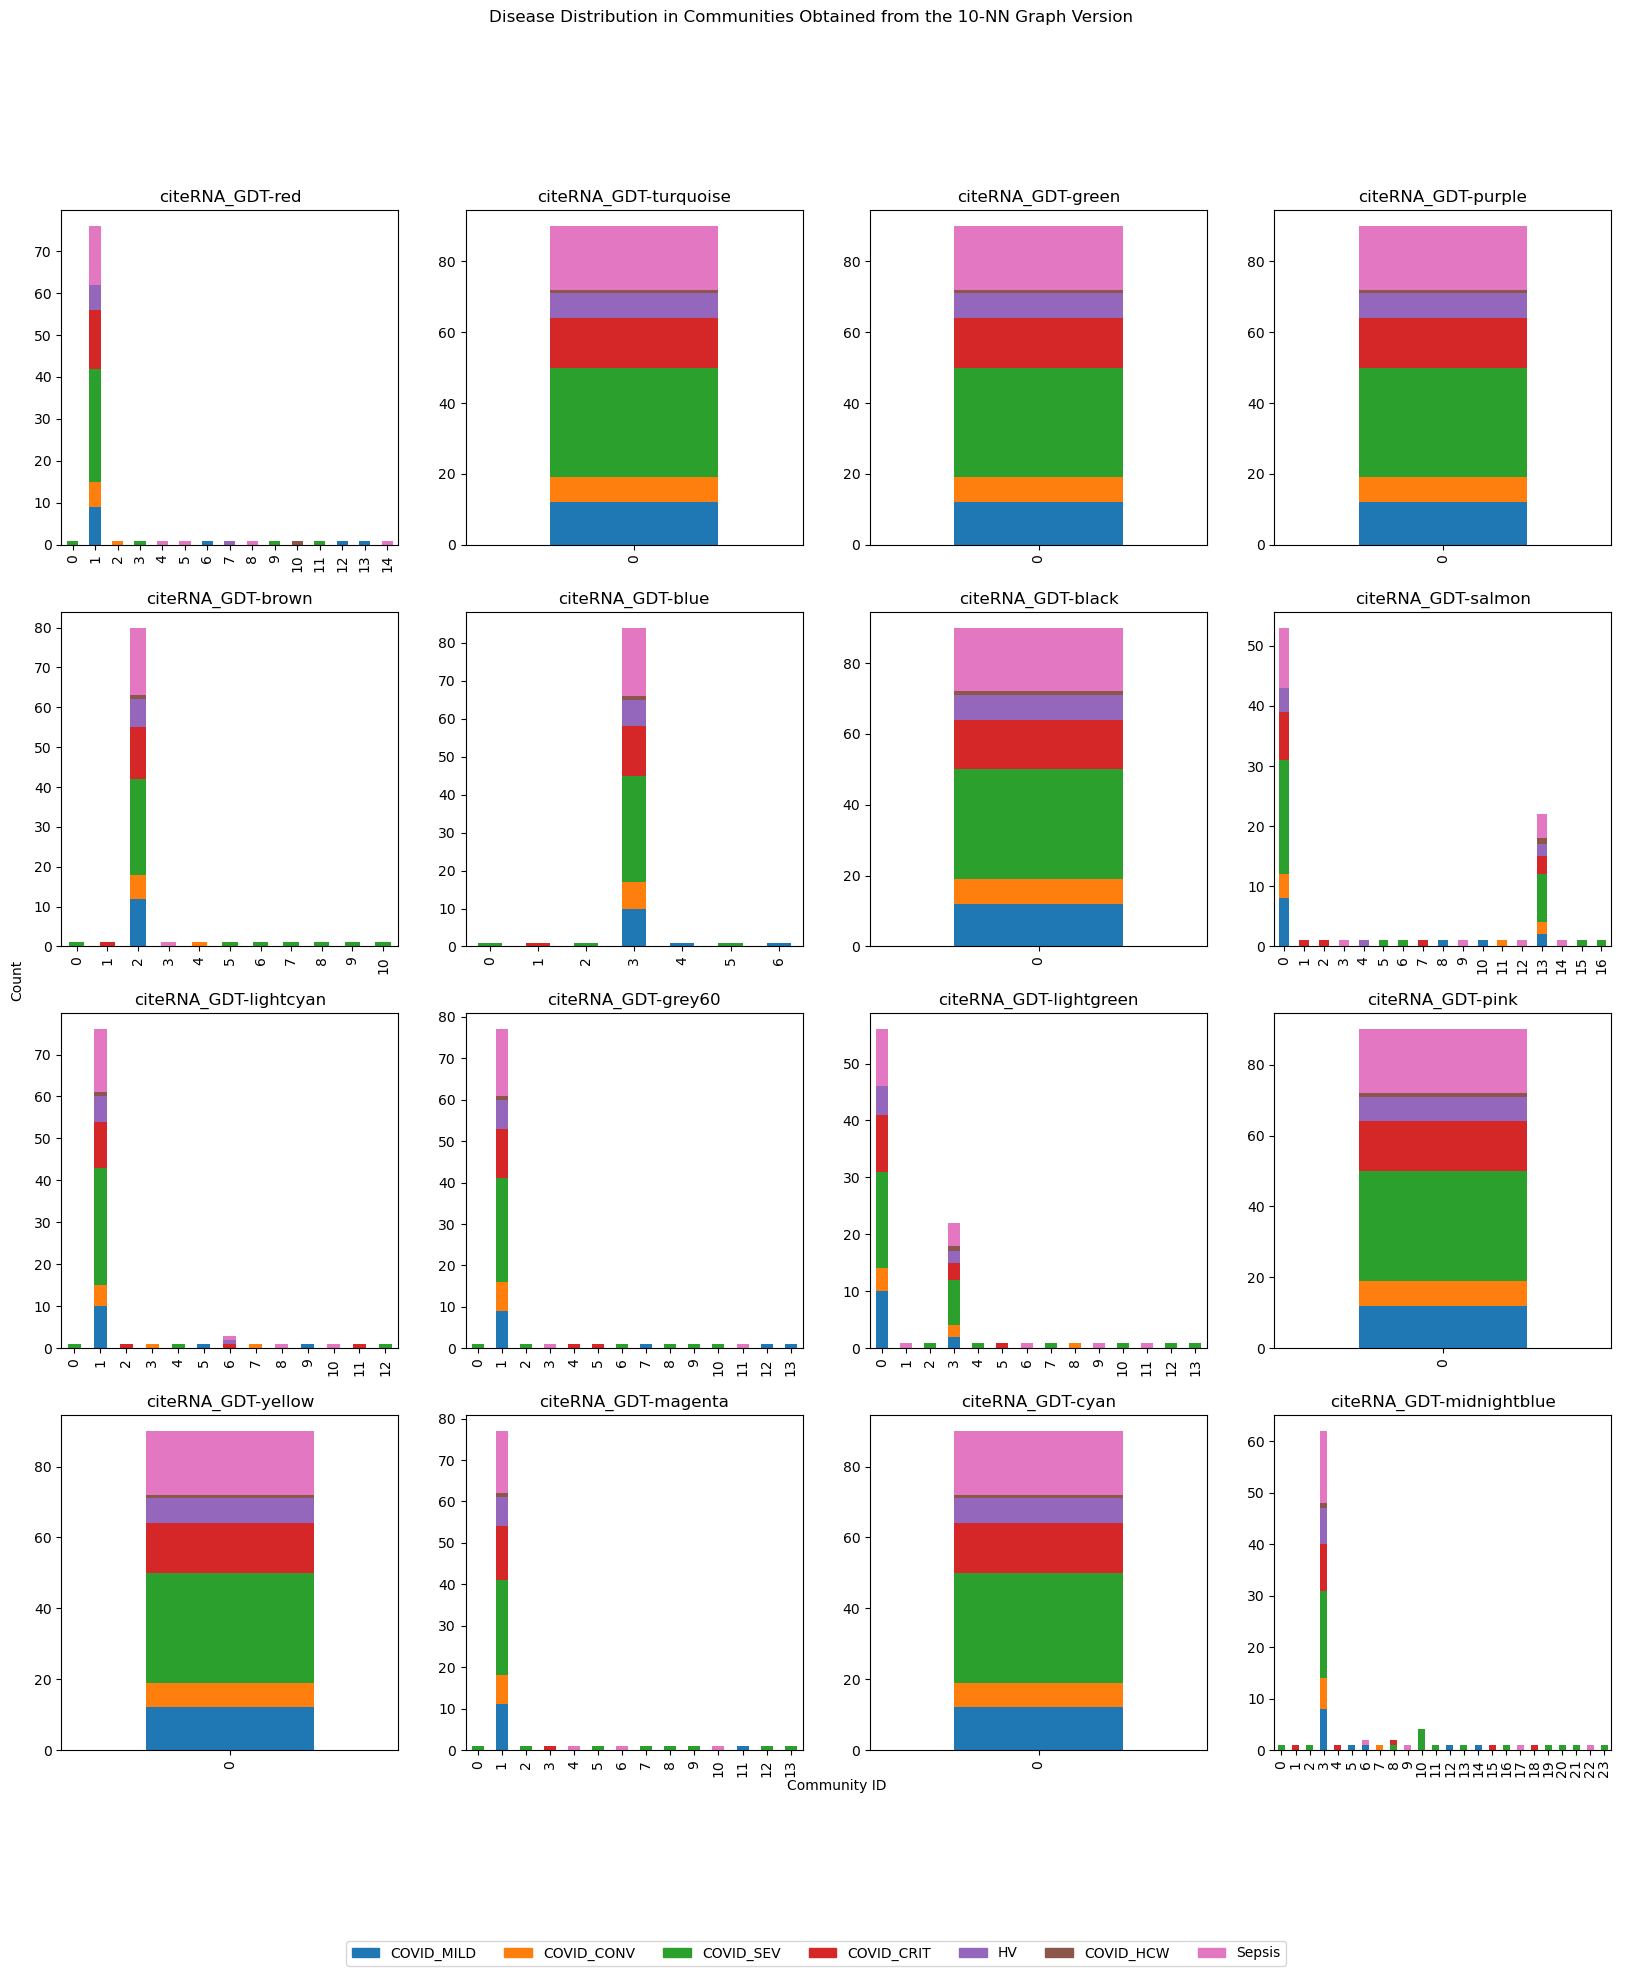

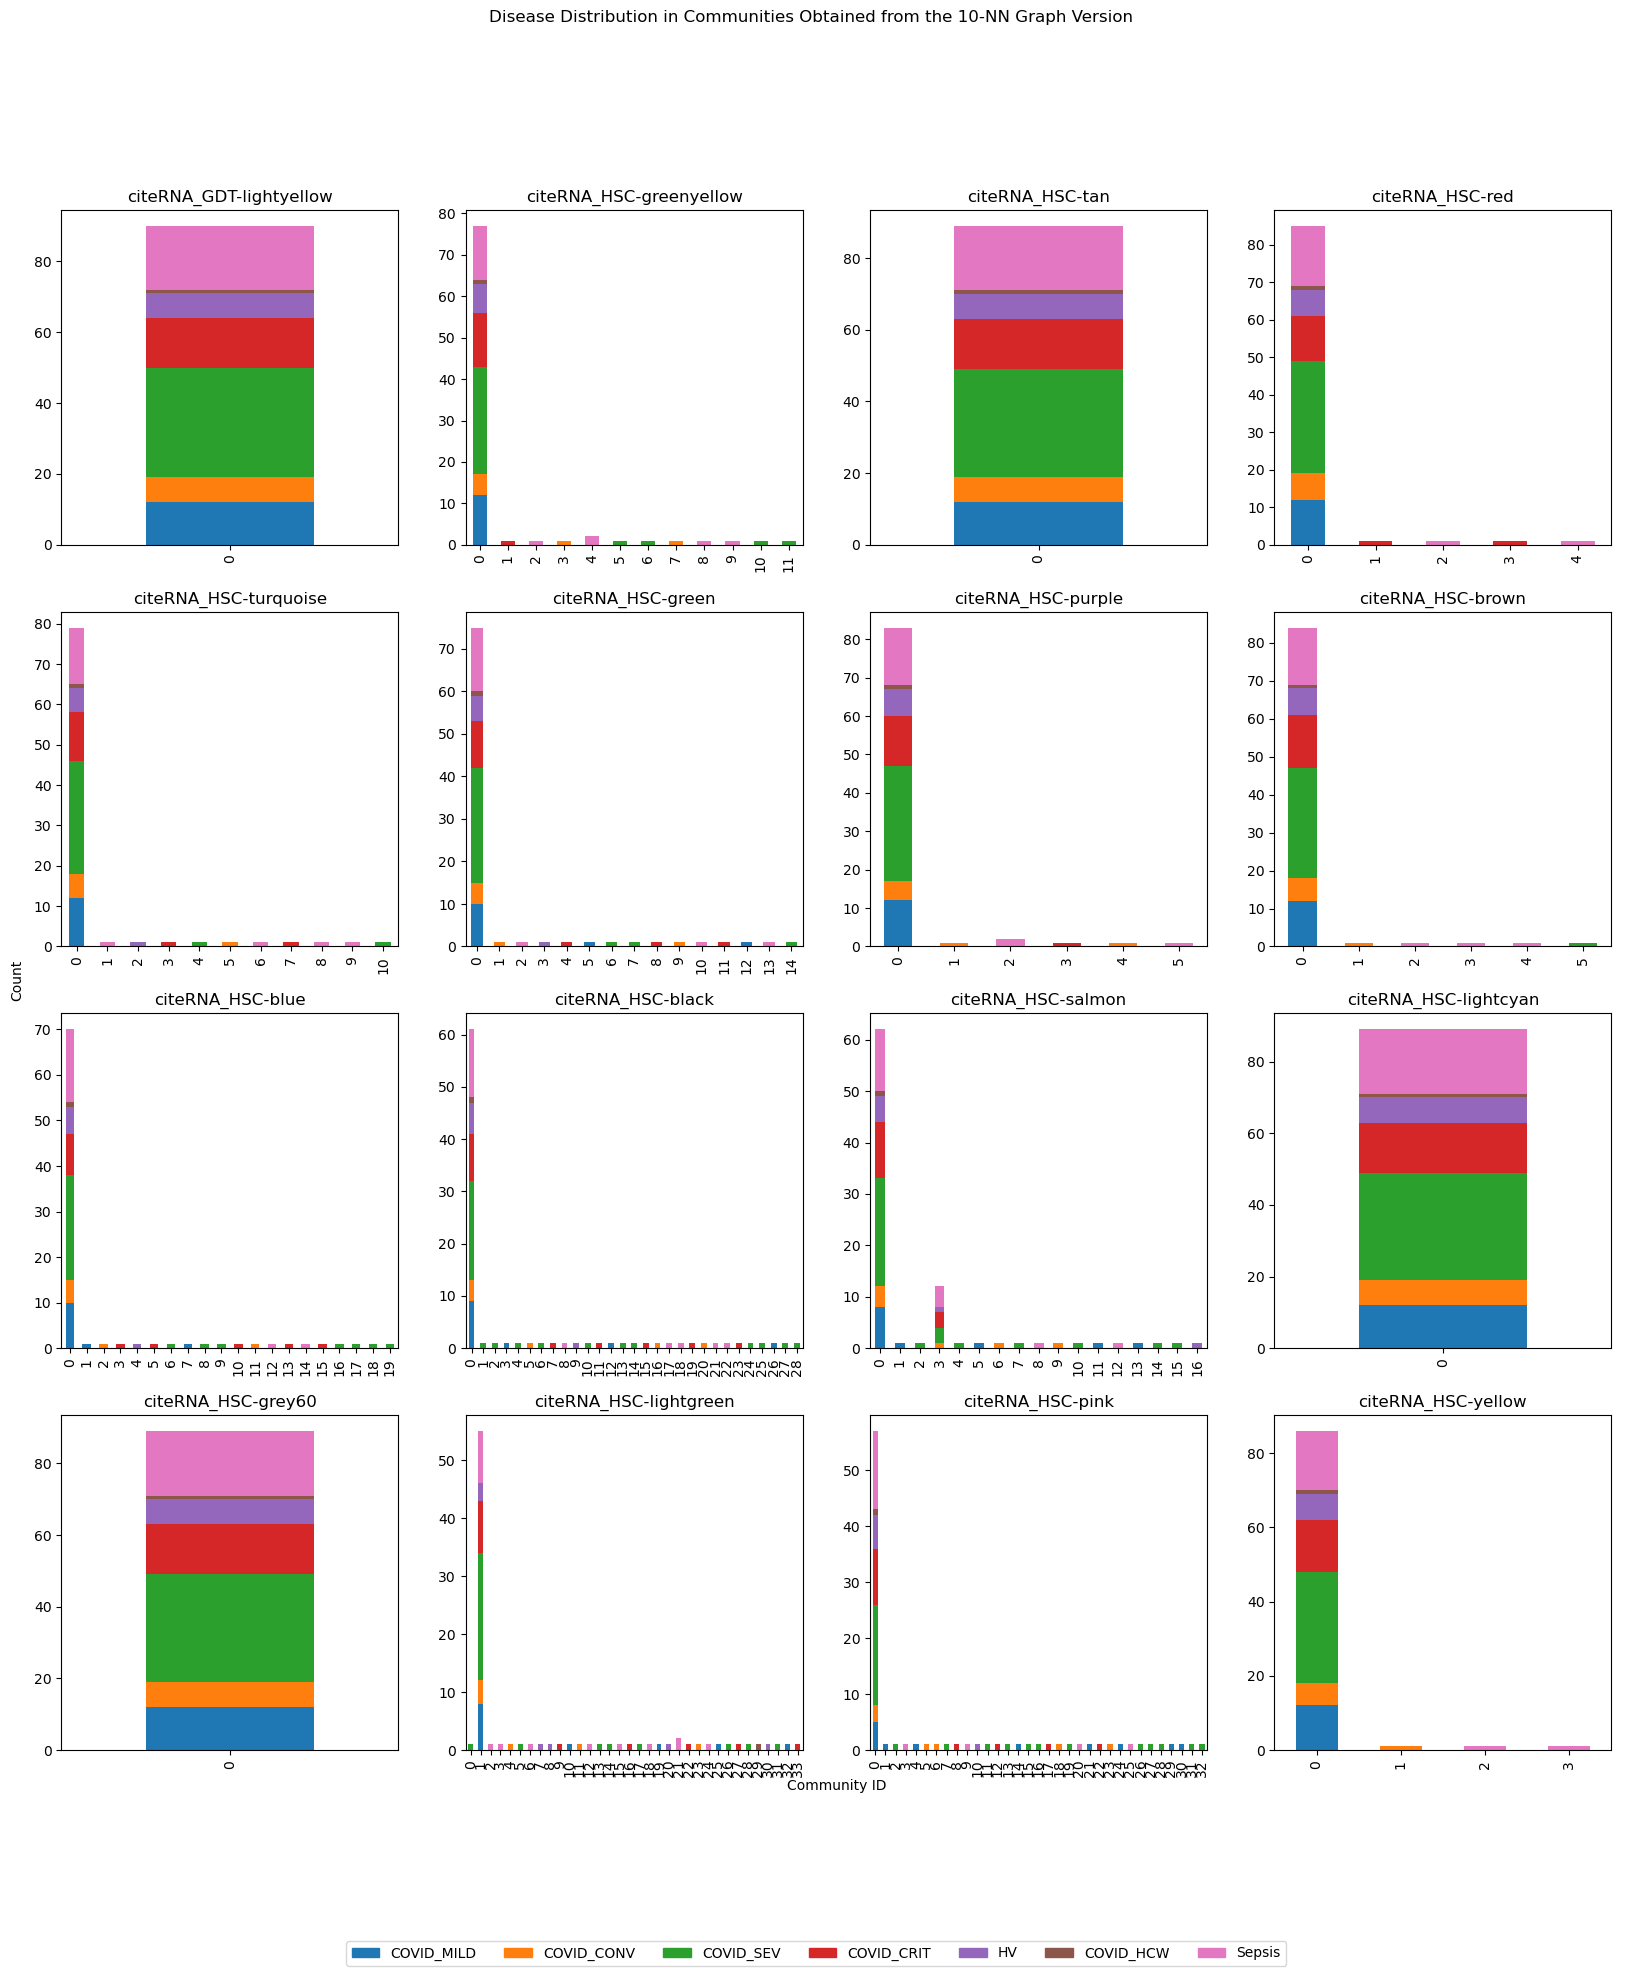

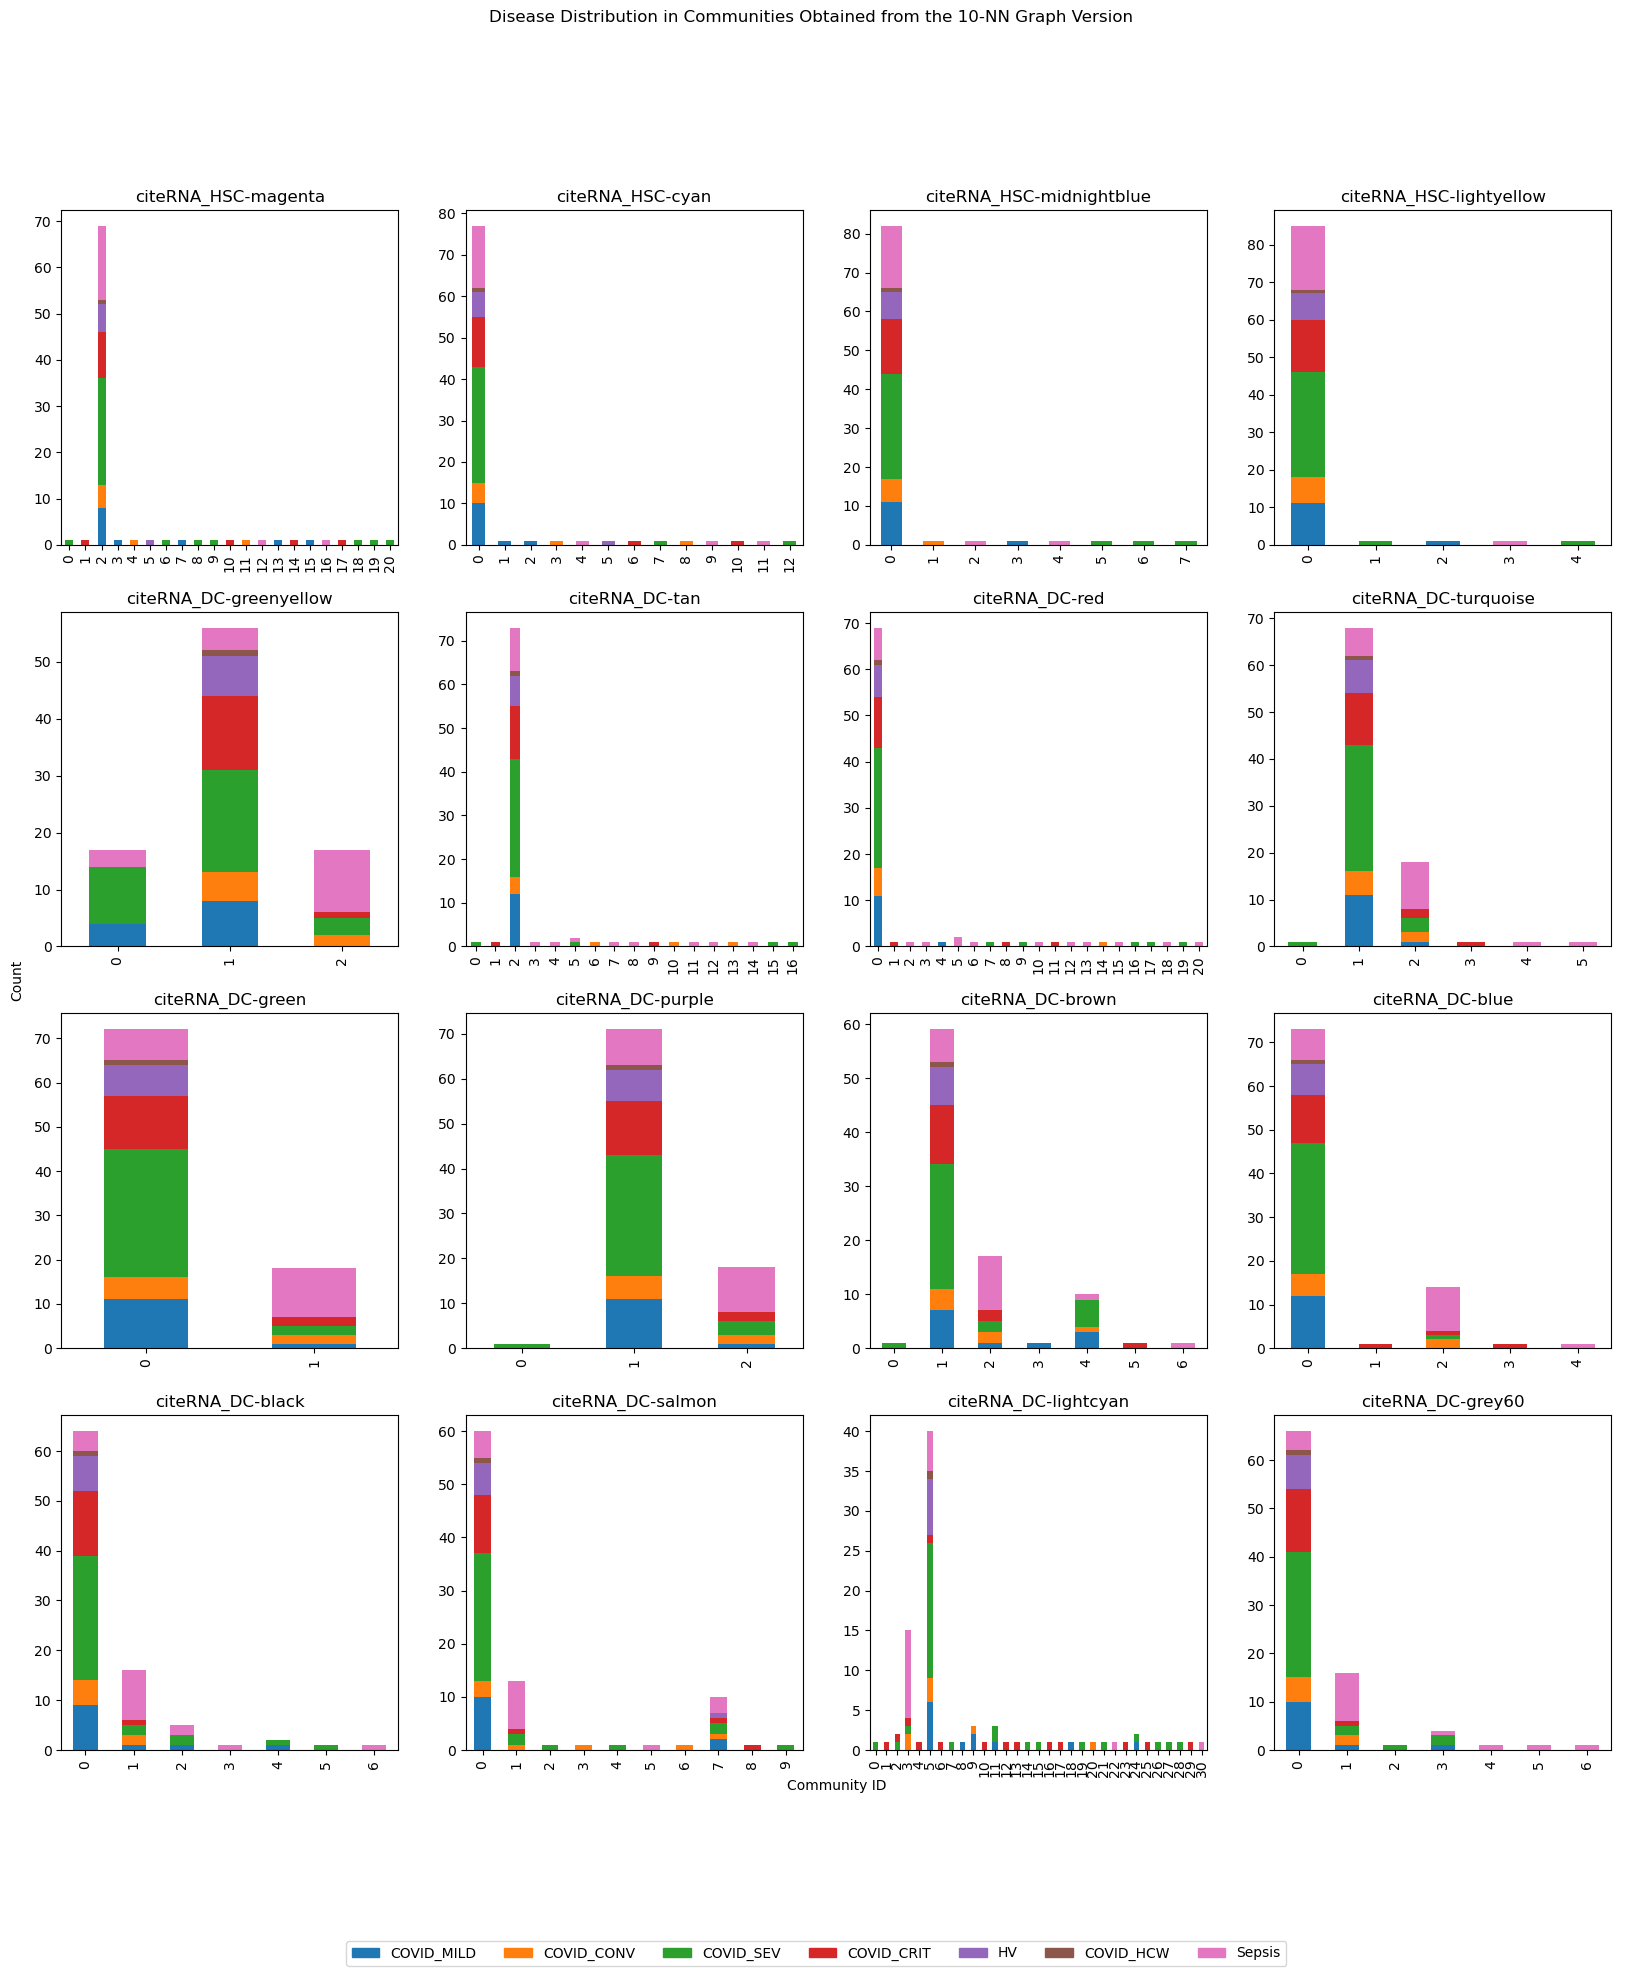

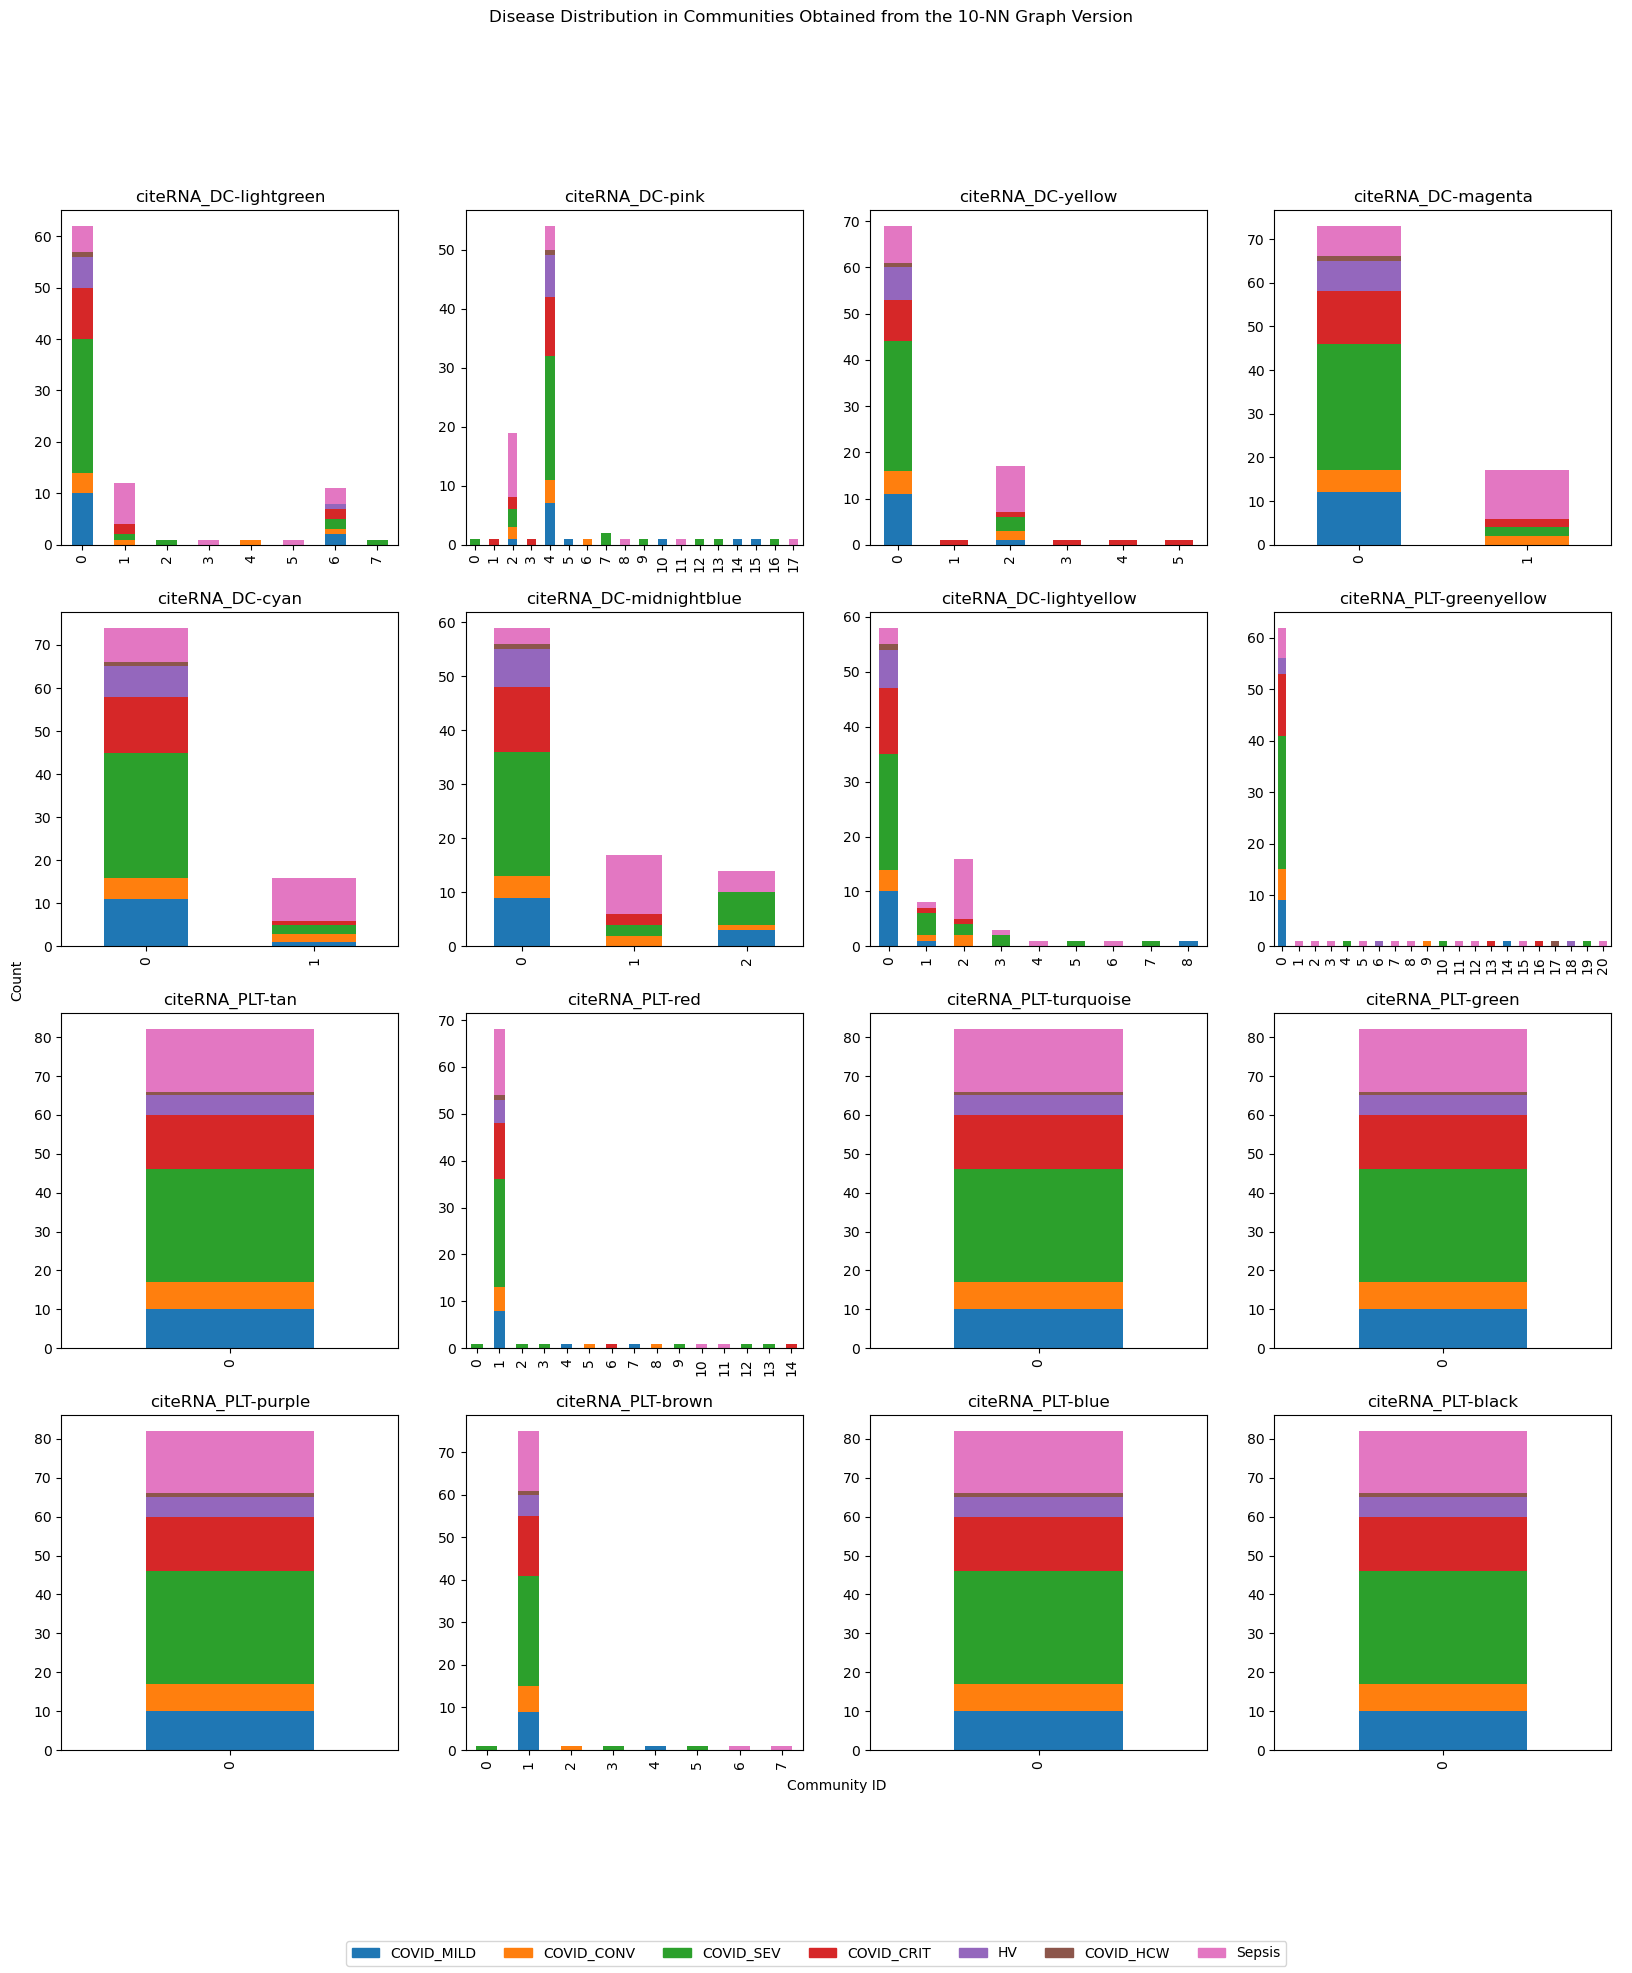

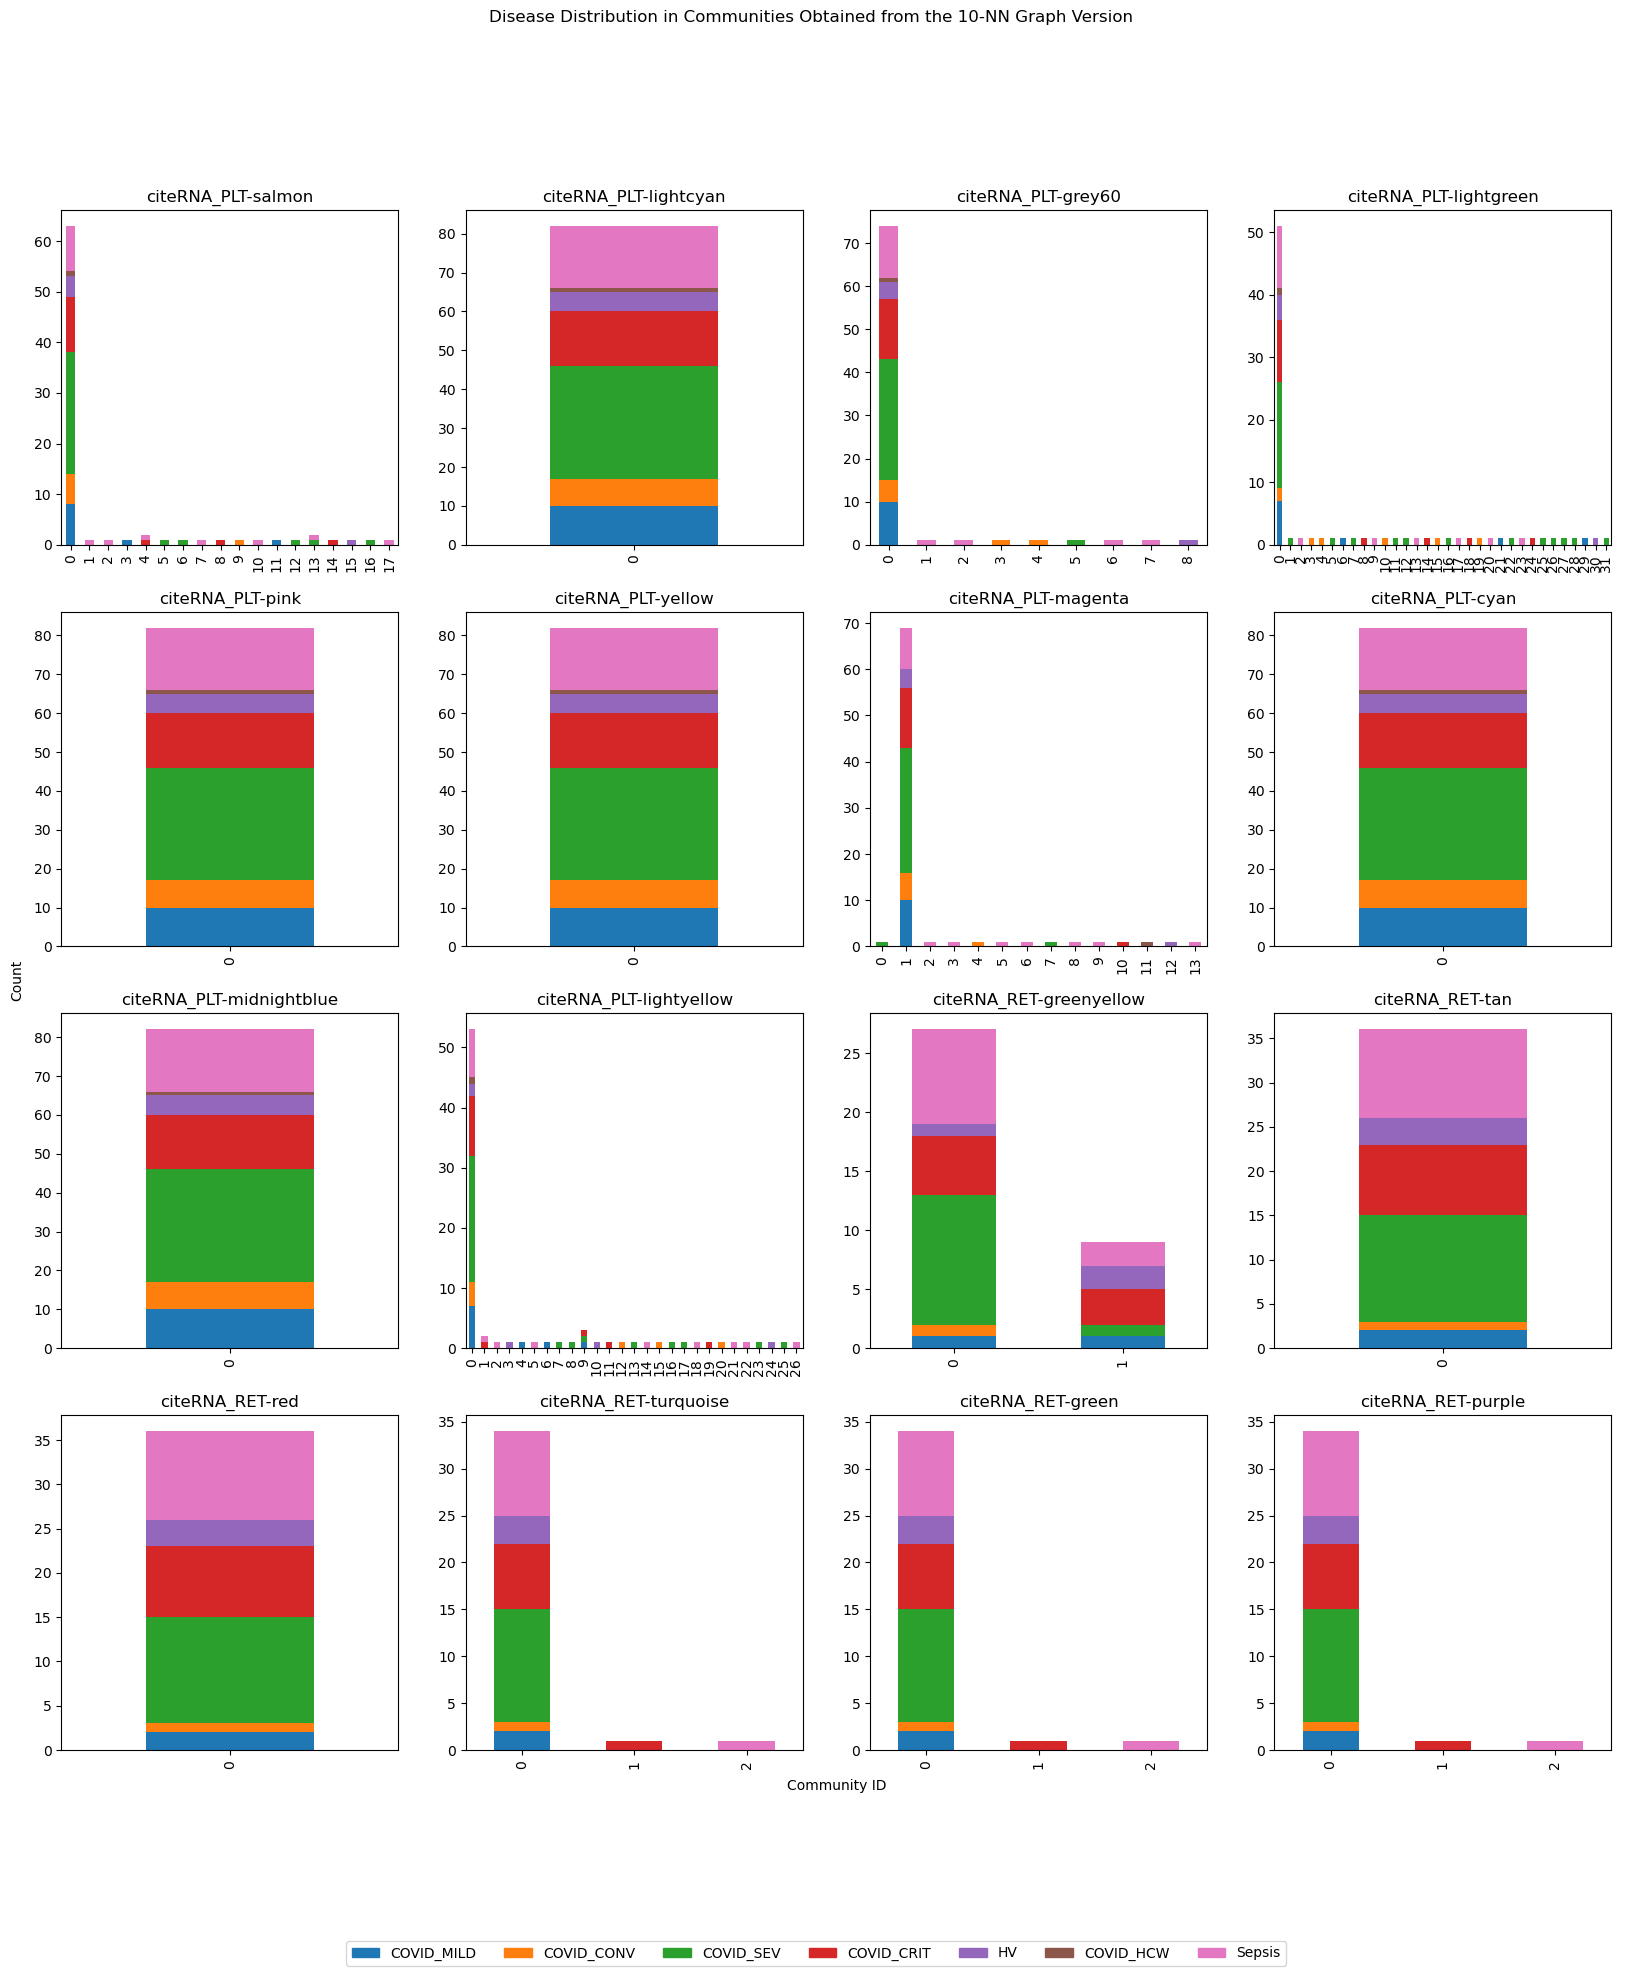

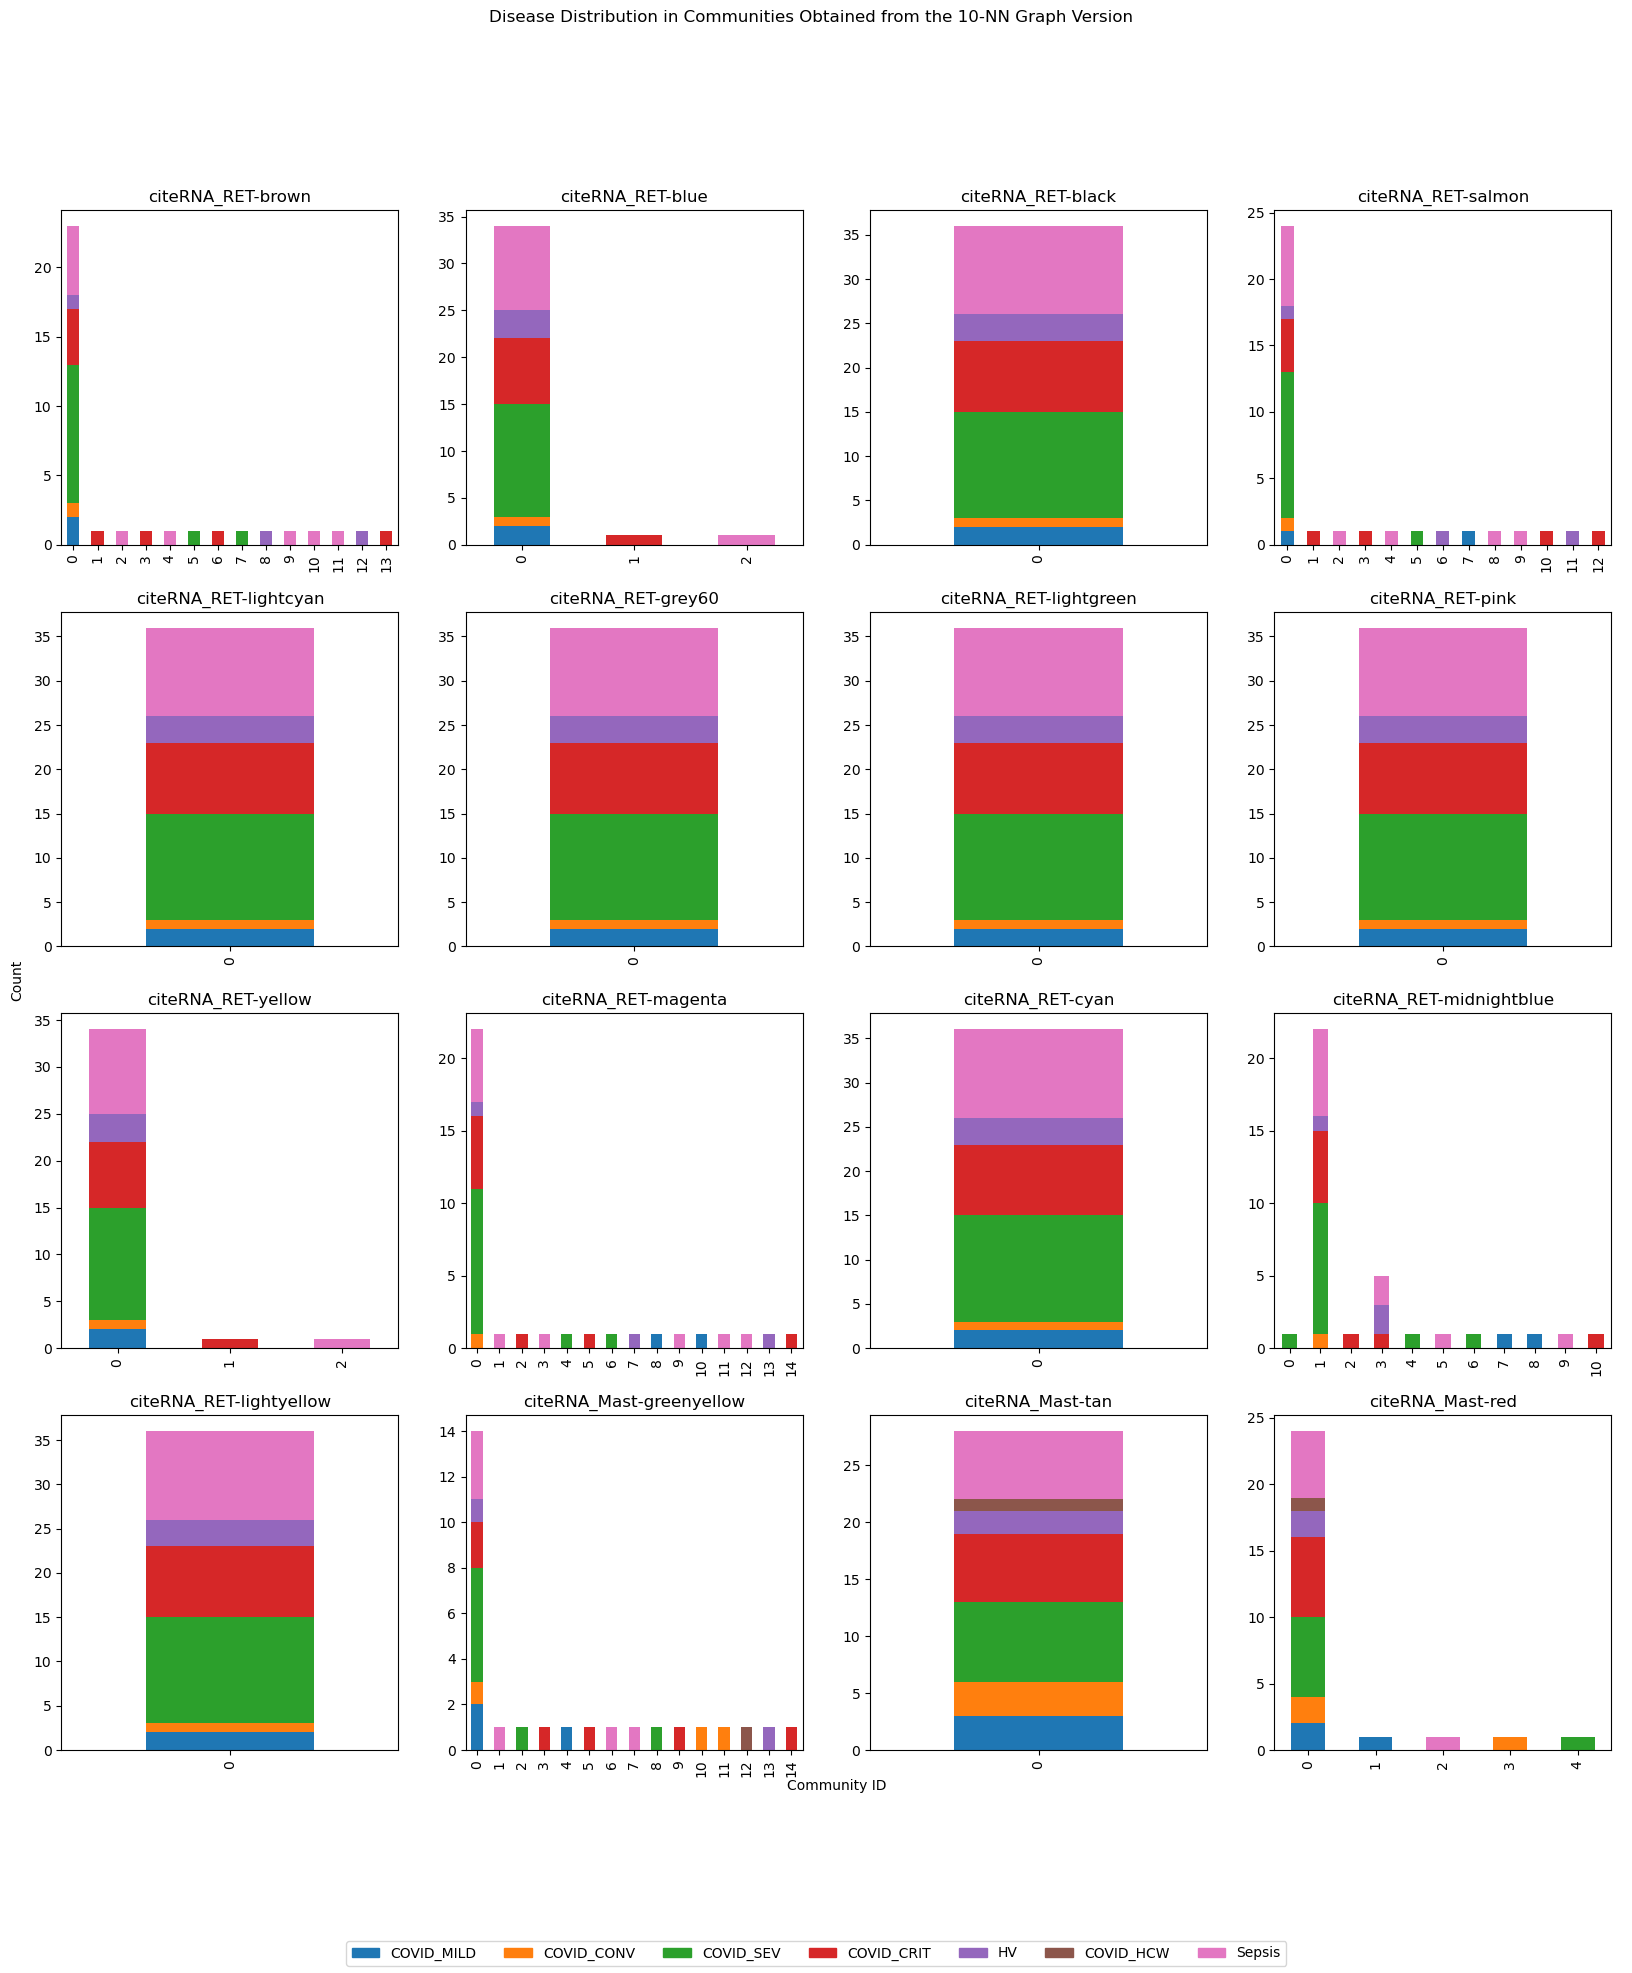

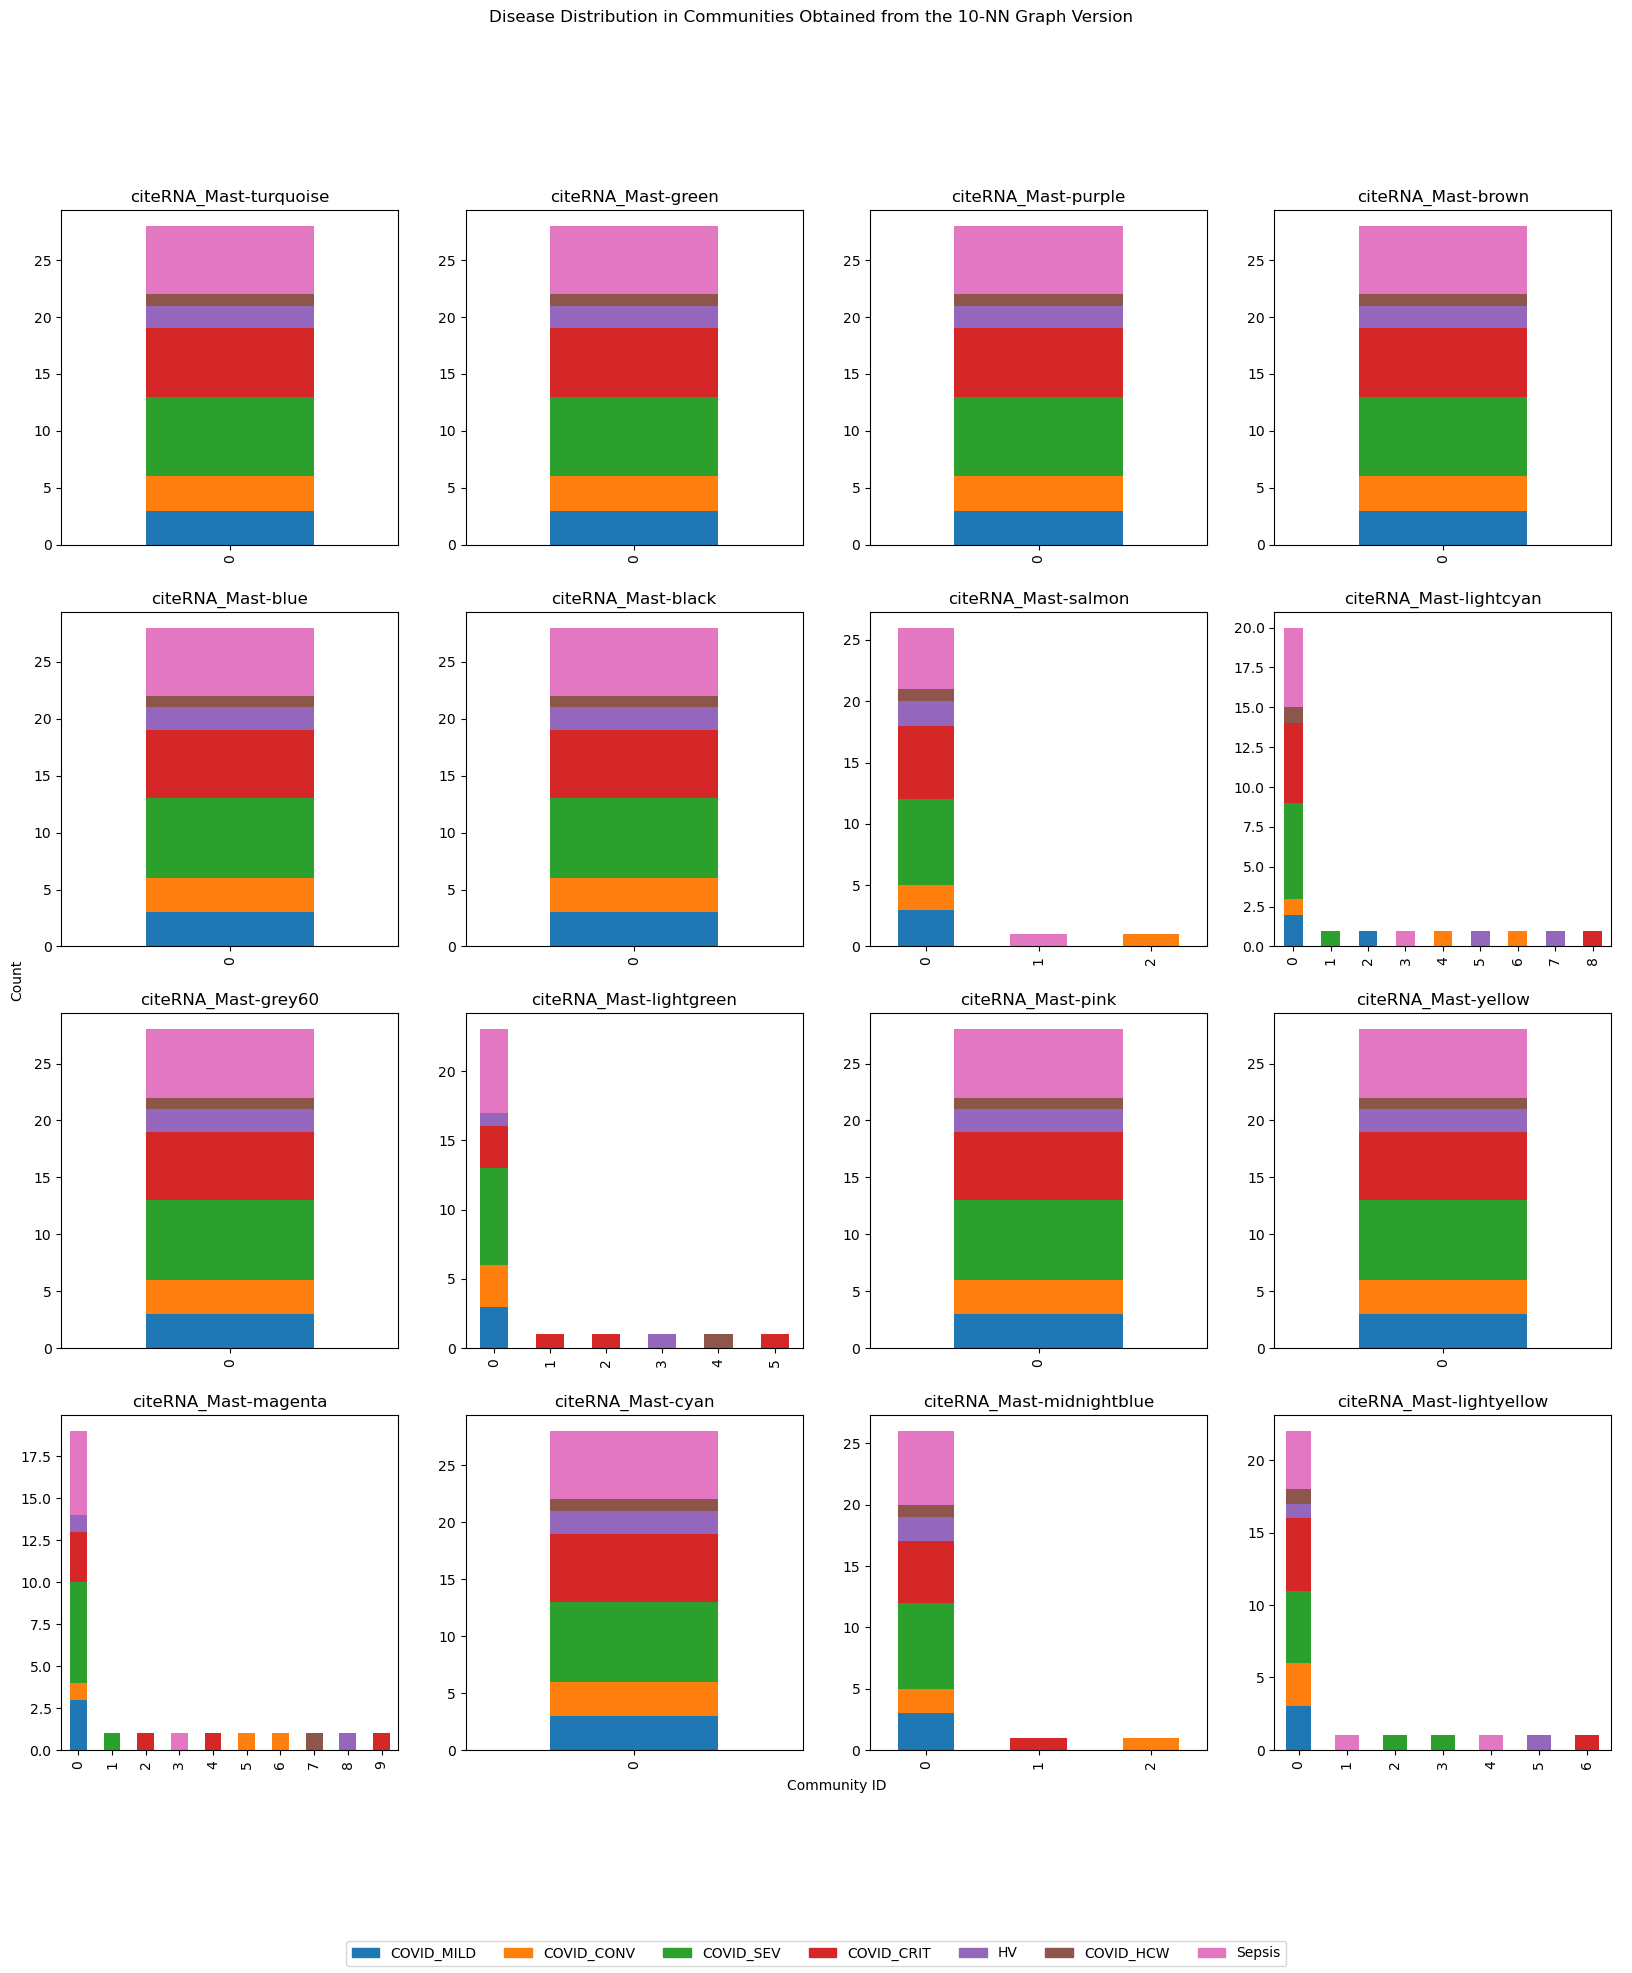

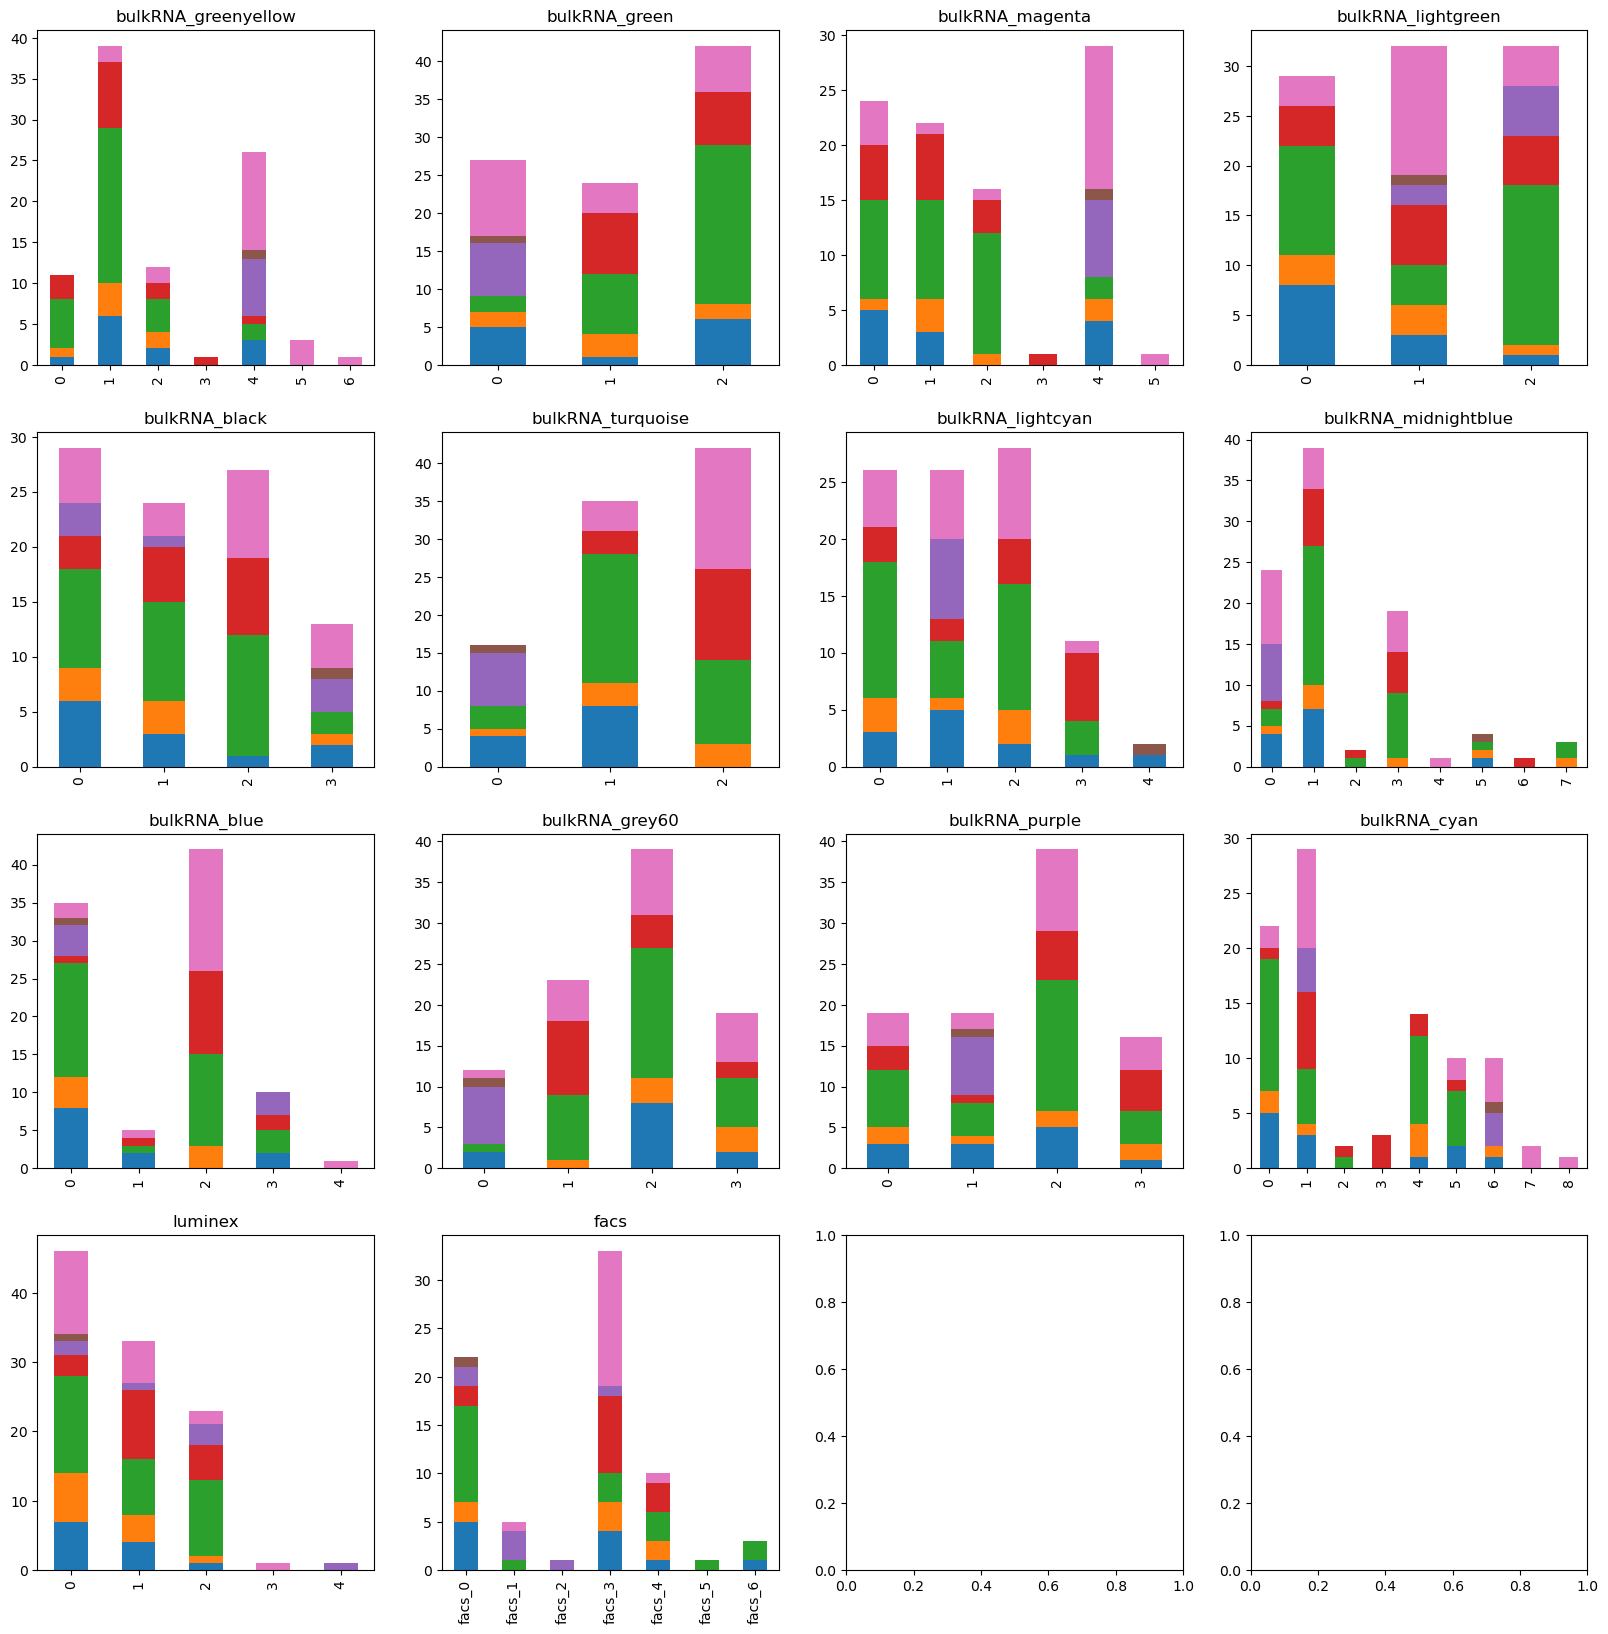

In [63]:
# Distribution visualization
from matplotlib.patches import Patch
for i, network_name in enumerate(all_communities_df.keys()): 
    if i % 16 == 0:
        if i > 0: # finish and save the plot
            name = "5__" + names[0] + "___" + names[4] +  "___" + names[8] +  "___" + names[12] + "___" + names[15]

            # Get colours for current style
            colours = plt.rcParams['axes.prop_cycle'].by_key()['color']
            # Set up handles (the bits that are drawn in the legend) and labels
            handles = []
            group_labels = list(all_diseases)
            for group_idx in range(len(group_labels)):
                # Create a simple patch that is the correct colour
                colour = colours[group_idx]
                handles.append(Patch(edgecolor=colour, facecolor=colour, fill=True))
            # Acutally create our figure legend, using the above handles and labels
            loc='lower center'
            ncol=len(group_labels)
            fig.legend(handles=handles, labels=group_labels, loc=loc, ncol=ncol)

            # create shared x and y labeling
            fig.add_subplot(111, frameon=False)
            # hide tick and tick label of the big axes
            plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
            plt.grid(False)
            plt.xlabel("Community ID")
            plt.ylabel("Count")
            fig.suptitle("Disease Distribution in Communities Obtained from the 10-NN Graph Version")
            fig.savefig(os.path.join(plots, name)) # save the old plot

        fig, ax = plt.subplots(4,4, figsize=(20,20)) 
        names = []
        row = 0
        col = 0
    
    names.append(network_name)
    network = all_communities_df[network_name]
    network.plot(kind='bar', stacked=True, ax=ax[row,col], legend = False )
    ax[row, col].set_title(network_name)

    col+=1
    if col == 4:
        col = 0
        row+=1

In [64]:
all_networks_scores = {}
all_networks_diseases_explained = {key: [] for key in all_communities_df.keys()}

for network_name in all_communities_df.keys():
    network = all_communities_df[network_name]
    count = 0
    for i in range(len(network.index)):
        threshhold = round(sum(network.iloc[i]) / 2, 0) - 1 # the representer has to capture at least 50% of the patients in that community
        if any(network.iloc[i] > threshhold):
            count+=1
            j = np.where(network.iloc[i] > threshhold)[0]
            disease = network.columns[j] # the community representative
            all_networks_diseases_explained[network_name].append(disease)
    count = count / len(network.index) * 100
    all_networks_scores[network_name] = count

all_networks_scores = {k: v for k, v in sorted(all_networks_scores.items(), key=lambda item: item[1])} # sort according to values 

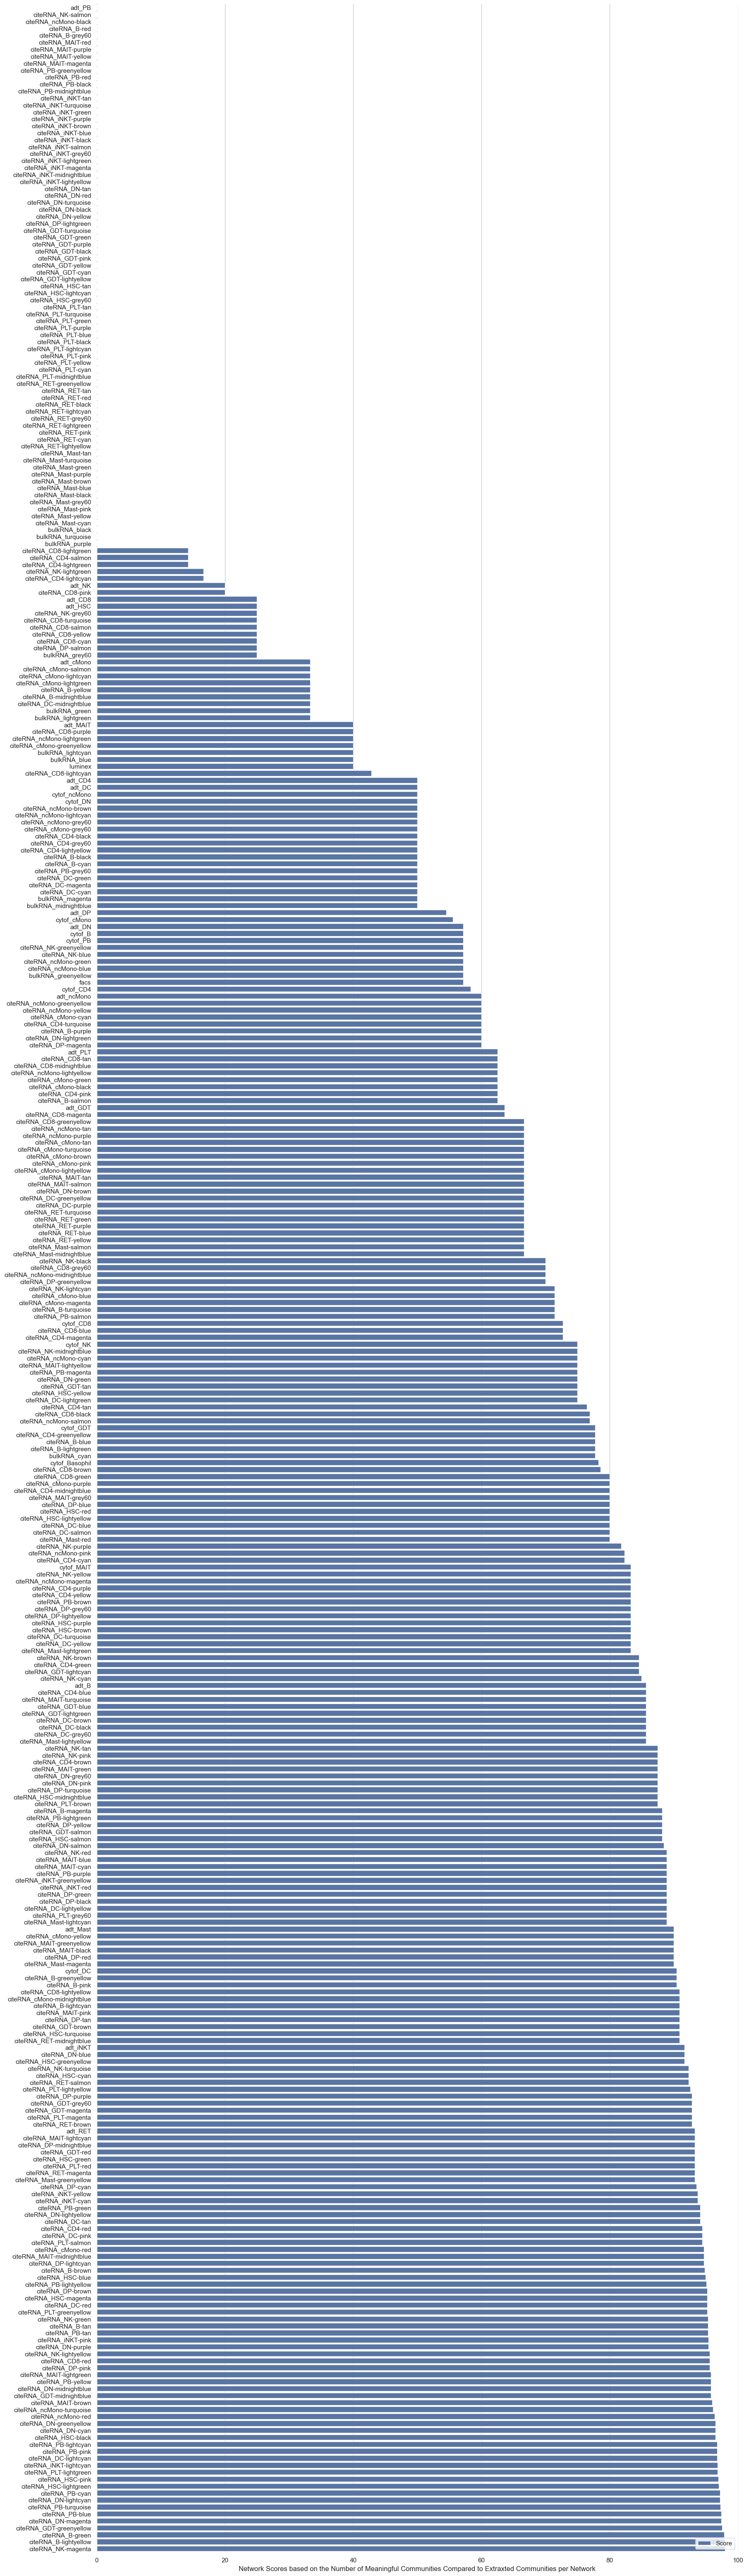

In [65]:
# Score visualization
data = pd.DataFrame({"prct_representative_communities":list(all_networks_scores.values()), "networks" :list(all_networks_scores.keys()) })

sb.set_theme(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(20, 80))

sb.barplot(data, y = "networks", x = "prct_representative_communities", label="Score", color="b")

# Add a legend and informative axis label
ax.legend(ncol=1, loc="lower right", frameon=True)
ax.set(xlim=(0, 100), ylabel="",
       xlabel="Network Scores based on the Number of Meaningful Communities Compared to Extraxted Communities per Network")
sb.despine(left=True, bottom=True)

In [66]:
all_networks = {"luminex": g_10_luminex, "facs": g_10_facs }
modalities = {"adt": g_10_adt, "citeRNA": g_10_citeRNA, "bulkRNA": g_10_bulkRNA, "cytof": g_10_cytof}

for modality_name in modalities.keys():
    modality = modalities[modality_name]
    for key in modality.keys():
        network = modality[key]
        all_networks[modality_name + "_" + key] = network

In [67]:
all_communities_edge_info = {network:{disease: 0 for disease in set(patient_disease_map.values())} for network in all_networks}
all_communities_edge_df = {}

for network_name in all_networks.keys():
    network = all_networks[network_name]
    diseases_df = []
    for disease in set(patient_disease_map.values()):
        inter = 0
        intra = 0
        for edge in network.es:
            if not edge["same_disease"]:
                if edge["disease_1"] == disease or edge["disease_2"] == disease:
                    inter += 1
            else:
                if edge["disease_1"] == disease :
                    intra += 1
        all_communities_edge_info[network_name][disease] = {"inter": inter, "intra": intra, "intra_vs._all": 0 if (inter == 0 and intra == 0) else intra/ (inter+intra), "ratio": 0 if inter == 0 else intra/ inter }
        diseases_df.append(all_communities_edge_info[network_name][disease]["intra_vs._all"])
    all_communities_edge_df[network_name] = diseases_df

edge_inf_df = pd.DataFrame(all_communities_edge_df, index = list(set(patient_disease_map.values())))

edge_inf_df.to_excel("intra_disease_edges_vs._all_edges_of_a_certain disease.xlsx")

## Summary

### KNN Boxplots

In [68]:
communities = {"10":[], "5":[], "2":[]}
mean_degree = {"10":[], "5":[], "2":[]}
mean_degree_percent = {"10":[], "5":[], "2":[]}
num_edges = {"10":[], "5":[], "2":[]}
density = {"10":[], "5":[], "2":[]}

In [69]:
for key in adt_g.keys():
    graphs = adt_g[key]
    for graph in graphs.keys():
        g = graphs[graph]
        com = g.community_edge_betweenness()
        com = com.as_clustering()
        num_communities = len(com)
        communities[key].append(num_communities)
        mean_degree[key].append(np.mean(g.degree()))
        mean_degree_percent[key].append(np.mean(g.degree()) * 100 / ((g.vcount()) ** 2))
        num_edges[key].append(g.ecount())
        density[key].append(g.density())

In [70]:
for key in cytof_g.keys():
    graphs = cytof_g[key]
    for graph in graphs.keys():
        g = graphs[graph]
        com = g.community_edge_betweenness()
        com = com.as_clustering()
        num_communities = len(com)
        communities[key].append(num_communities)
        mean_degree[key].append(np.mean(g.degree()))
        mean_degree_percent[key].append(np.mean(g.degree()) * 100 / ((g.vcount()) ** 2))
        num_edges[key].append(g.ecount())
        density[key].append(g.density())

In [71]:
for key in citeRNA_g.keys():
    graphs = citeRNA_g[key]
    for graph in graphs.keys():
        g = graphs[graph]
        com = g.community_edge_betweenness()
        com = com.as_clustering()
        num_communities = len(com)
        communities[key].append(num_communities)
        mean_degree[key].append(np.mean(g.degree()))
        mean_degree_percent[key].append(np.mean(g.degree()) * 100 / ((g.vcount()) ** 2))
        num_edges[key].append(g.ecount())
        density[key].append(g.density())

In [72]:
for key in bulkRNA_g.keys():
    graphs = bulkRNA_g[key]
    for graph in graphs.keys():
        g = graphs[graph]
        com = g.community_edge_betweenness()
        com = com.as_clustering()
        num_communities = len(com)
        communities[key].append(num_communities)
        mean_degree[key].append(np.mean(g.degree()))
        mean_degree_percent[key].append(np.mean(g.degree()) * 100 / ((g.vcount()) ** 2))
        num_edges[key].append(g.ecount())
        density[key].append(g.density())

In [73]:
for key in luminex_g.keys():
    g = luminex_g[key]
    com = g.community_edge_betweenness()
    com = com.as_clustering()
    num_communities = len(com)
    communities[key].append(num_communities)
    mean_degree[key].append(np.mean(g.degree()))
    mean_degree_percent[key].append(np.mean(g.degree()) * 100 / ((g.vcount()) ** 2))
    num_edges[key].append(g.ecount())
    density[key].append(g.density())

In [74]:
for key in facs_g.keys():
    g = facs_g[key]
    com = g.community_edge_betweenness()
    com = com.as_clustering()
    num_communities = len(com)
    communities[key].append(num_communities)
    mean_degree[key].append(np.mean(g.degree()))
    mean_degree_percent[key].append(np.mean(g.degree()) * 100 / ((g.vcount()) ** 2))
    num_edges[key].append(g.ecount())
    density[key].append(g.density())

Text(0, 0.5, 'KNN')

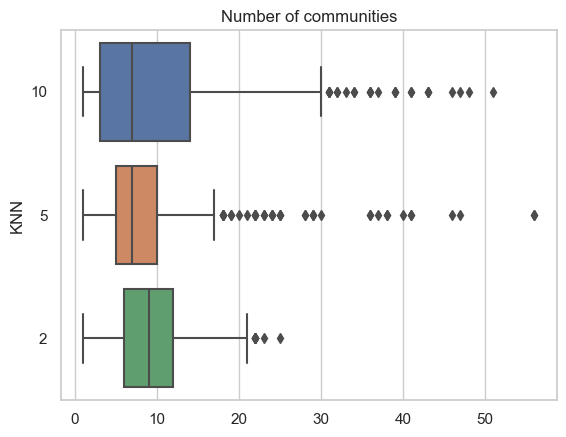

In [75]:
x = pd.DataFrame(communities)
ax = sb.boxplot(data=x, orient="h")
plt.title("Number of communities")
plt.ylabel("KNN")

Text(0, 0.5, 'KNN')

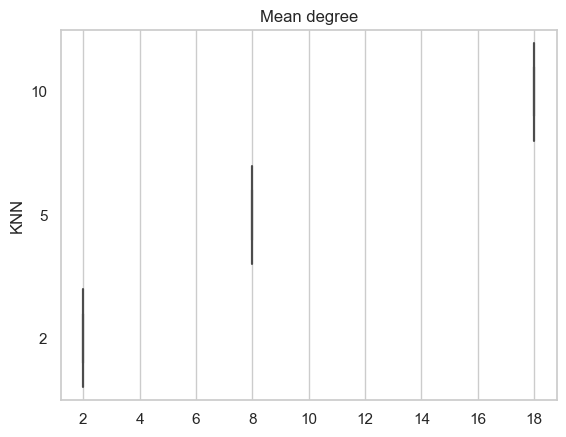

In [76]:
x = pd.DataFrame(mean_degree)
ax = sb.boxplot(data=x, orient="h")
plt.title("Mean degree")
plt.ylabel("KNN")

Text(0, 0.5, 'KNN')

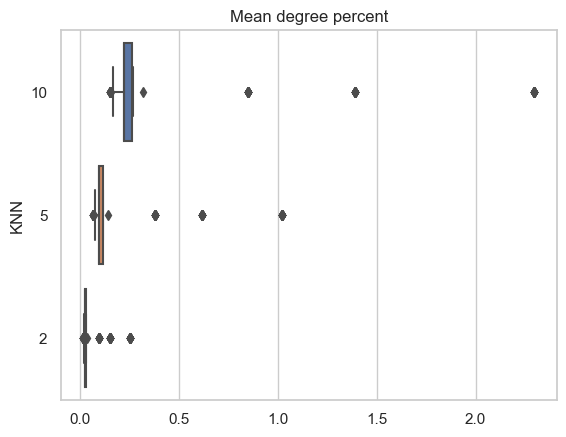

In [77]:
x = pd.DataFrame(mean_degree_percent)
ax = sb.boxplot(data=x, orient="h")
plt.title("Mean degree percent")
plt.ylabel("KNN")

Text(0, 0.5, 'KNN')

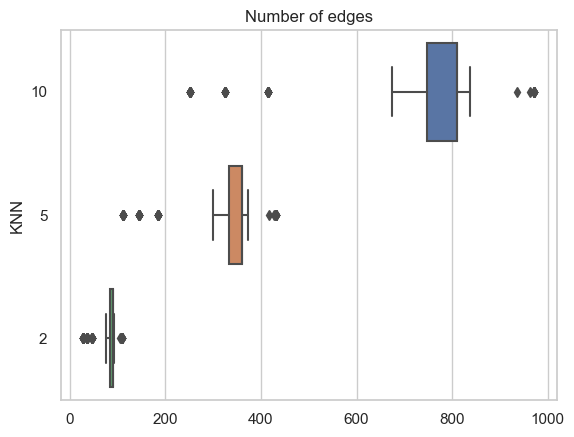

In [78]:
x = pd.DataFrame(num_edges)
ax = sb.boxplot(data=x, orient="h")
plt.title("Number of edges")
plt.ylabel("KNN")


Text(0, 0.5, 'KNN')

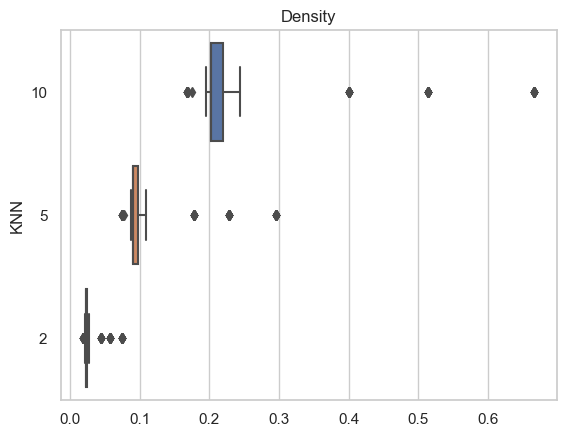

In [79]:
x = pd.DataFrame(density)
ax = sb.boxplot(data=x, orient="h")
plt.title("Density")
plt.ylabel("KNN")

## Saving Data
The data is a graph built upon 5NN or 10NN with the following node properties:
- id of the node which is an integer number. This is used to index the node: e.g. network.vs[id]
- PID: sample id (not the patient id)
- Diseases
- community: an integer (not sure what this is) 
- community color: indicator for the community. Nodes with the same color are in the same community.

The edge properties are:
- edge id for indexing e.g. network.es[id]
- color: the community color 
- disease_color: if None
- status: if the edge is between two patients of the same disease or if the diseases differ
- Disease1, Disease2

Additionally, for every network, we record the number of communities.

In [80]:
modalities = {"adt": g_5_adt, "cytof": g_5_cytof, "citeRNA":g_5_citeRNA, "bulkRNA": g_5_bulkRNA}

for modality_name, modality in modalities.items():
    for network_name, network in modality.items():
        id = name_to_id[modality_name + "_" + network_name]
        id_to_5NN[id] = network

modalities = {"luminex": g_5_luminex, "facs": g_5_facs}

for modality_name, modality in modalities.items():
    id = name_to_id[modality_name]
    id_to_5NN[id] = modality


modalities = {"adt": g_10_adt, "cytof": g_10_cytof, "citeRNA":g_10_citeRNA, "bulkRNA": g_10_bulkRNA}

for modality_name, modality in modalities.items():
    for network_name, network in modality.items():
        id = name_to_id[modality_name + "_" + network_name]
        id_to_10NN[id] = network

modalities = {"luminex": g_10_luminex, "facs": g_10_facs}

for modality_name, modality in modalities.items():
    id = name_to_id[modality_name]
    id_to_10NN[id] = modality

In [81]:
with open(os.path.join(core_P, 'id_to_10NN.pickle'), 'wb') as f:
    pickle.dump(id_to_10NN, f)

with open(os.path.join(core_P, 'id_to_5NN.pickle'), 'wb') as f:
    pickle.dump(id_to_5NN, f)

with open(os.path.join(core_P, 'id_to_num_com_10NN.pickle'), 'wb') as f:
    pickle.dump(id_to_num_com_10NN, f)

with open(os.path.join(core_P, 'id_to_num_com_5NN.pickle'), 'wb') as f:
    pickle.dump(id_to_num_com_5NN, f)

In [82]:
with open(os.path.join(core_P, 'id_to_10pct_10KNN.pickle'), 'wb') as f:
    pickle.dump(id_to_10pct_10KNN, f)

with open(os.path.join(core_P, 'id_to_50pct_10KNN.pickle'), 'wb') as f:
    pickle.dump(id_to_50pct_10KNN, f)

with open(os.path.join(core_P, 'id_to_80pct_10KNN.pickle'), 'wb') as f:
    pickle.dump(id_to_80pct_10KNN, f)

with open(os.path.join(core_P, 'id_to_10pct_per_node_10KNN.pickle'), 'wb') as f:
    pickle.dump(id_to_10pct_per_node_10KNN, f)

with open(os.path.join(core_P, 'id_to_50pct_per_node_10KNN.pickle'), 'wb') as f:
    pickle.dump(id_to_50pct_per_node_10KNN, f)

with open(os.path.join(core_P, 'id_to_10pct_10KNN_num_com.pickle'), 'wb') as f:
    pickle.dump(id_to_10pct_10KNN_num_com, f)

with open(os.path.join(core_P, 'id_to_50pct_10KNN_num_com.pickle'), 'wb') as f:
    pickle.dump(id_to_50pct_10KNN_num_com, f)

with open(os.path.join(core_P, 'id_to_80pct_10KNN_num_com.pickle'), 'wb') as f:
    pickle.dump(id_to_80pct_10KNN_num_com, f)

with open(os.path.join(core_P, 'id_to_10pct_per_node_10KNN_num_com.pickle'), 'wb') as f:
    pickle.dump(id_to_10pct_per_node_10KNN_num_com, f)

with open(os.path.join(core_P, 'id_to_50pct_per_node_10KNN_num_com.pickle'), 'wb') as f:
    pickle.dump(id_to_50pct_per_node_10KNN_num_com, f)